<a href="https://colab.research.google.com/github/M339KUMAR/ColabDemoFiles/blob/main/InfySB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INFOSYS SPRINGBOARD INTRO TO ML

#1.SIMPLE LINEAR REGRESSION

In [ ]:

# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Reading the data from input csv file into a Pandas DataFrame
#computers = pd.read_csv("datasets/computers.csv")
computers = pd.read_csv("/content/sample_data/computers.csv")
# Printing the first 5 rows
computers.head()

Units  Minutes
0      1       23
1      2       29
2      3       49
3      4       64
4      4       74

Text(0, 0.5, 'Minutes')

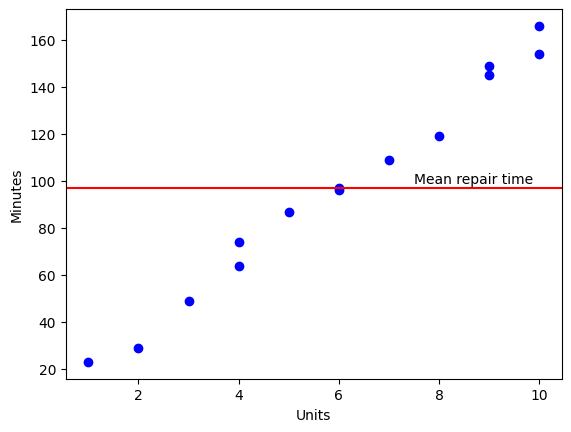

In [ ]:

# Calculating the mean.
mean_value = computers['Minutes'].mean()
# Plotting the actual time taken for various values of number of faulty units.
plt.scatter(computers['Units'],computers['Minutes'],color='blue', marker='o')
# Plotting the mean
plt.axhline(y=mean_value,c="r")
# Adding annotation, xlabel and ylabel.
plt.annotate("Mean repair time",xy = (7.5,mean_value+2))
plt.xlabel("Units")
plt.ylabel("Minutes")

#Association between variables

Text(0, 0.5, 'Minutes')

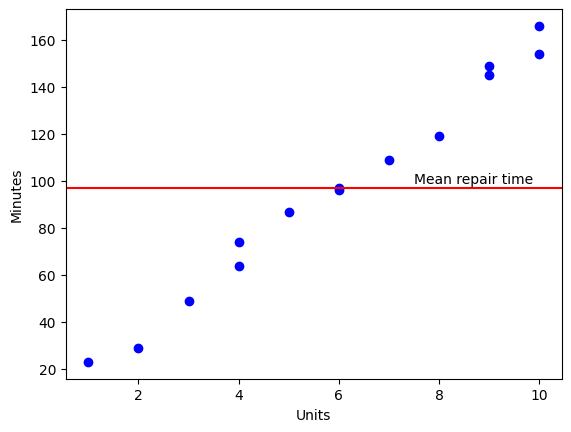

In [ ]:
# Plotting the actual time taken for various values of number of faulty units.
plt.scatter(computers['Units'],computers['Minutes'],color='blue', marker='o')
# Plotting the mean
plt.axhline(y=mean_value,c="r")
# Adding annotation, xlabel and ylabel.
plt.annotate("Mean repair time",xy = (7.5,mean_value+2))
plt.xlabel("Units")
plt.ylabel("Minutes")

#Creating Regression Models:

In [ ]:
minutes_model0 = computers['Minutes'].mean()
minutes_model1 = 10 + 12*computers['Units']
minutes_model2 = 6 + 18*computers['Units']

computers['min_model0']=computers['Minutes'].mean()
computers['min_model1']=10 + 12*computers['Units']
computers['min_model2']= 6 + 18*computers['Units']

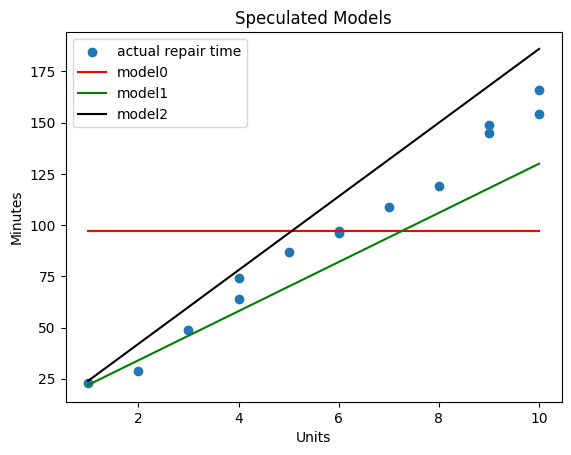

In [ ]:
fig,ax = plt.subplots()
# Plotting the actual 'Minutes'
ax.scatter(x="Units",y="Minutes",data=computers,label='actual repair time')
# Plotting the Model0 predictions
ax.plot(computers['Units'],computers['min_model0'],color="red",label='model0')
# Plotting the Model1 predictions
ax.plot(computers['Units'],computers['min_model1'],color="green",label='model1')
# Plotting the Model2 predictions
ax.plot(computers['Units'],computers['min_model2'],color="black",label='model2')
# Adding xlabel, ylabel, title and legend
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")
ax.legend()

#Analyzing the Speculated Models:

In [ ]:

# Validating Model0: Estimated time = mean('Minutes')
# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model0, error in prediction by Model0.
model0_obs = pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":computers['min_model0'],
              "Error":(computers['min_model0'] - computers['Minutes'])})
model0_obs # Printing the DataFrame

Units  Actual time  Predicted time      Error
0       1           23       97.214286  74.214286
1       2           29       97.214286  68.214286
2       3           49       97.214286  48.214286
3       4           64       97.214286  33.214286
4       4           74       97.214286  23.214286
5       5           87       97.214286  10.214286
6       6           96       97.214286   1.214286
7       6           97       97.214286   0.214286
8       7          109       97.214286 -11.785714
9       8          119       97.214286 -21.785714
10      9          149       97.214286 -51.785714
11      9          145       97.214286 -47.785714
12     10          154       97.214286 -56.785714
13     10          166       97.214286 -68.785714

#Analyzing Model 0

In [ ]:

# Sum of errors
print(sum(model0_obs['Error']))

1.4210854715202004e-14


In [ ]:

# Sum of squared errors
sum(model0_obs['Error']**2)

27768.357142857145

#Analyzing Model 1

In [ ]:

# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model1, error in prediction by Model1.
# Model1: Estimated time = 10 + 12*(#Units) minutes
model1_obs = pd.DataFrame({"Units":computers.Units,
              "Actual time":computers.Minutes,
              "Predicted time":computers.min_model1,
              "Error":(computers.min_model1 - computers.Minutes)})
model1_obs

Units  Actual time  Predicted time  Error
0       1           23              22     -1
1       2           29              34      5
2       3           49              46     -3
3       4           64              58     -6
4       4           74              58    -16
5       5           87              70    -17
6       6           96              82    -14
7       6           97              82    -15
8       7          109              94    -15
9       8          119             106    -13
10      9          149             118    -31
11      9          145             118    -27
12     10          154             130    -24
13     10          166             130    -36

In [ ]:

# SSE for Model1
sum(model1_obs.Error**2)

4993

#Analyzing Model 2

In [ ]:

# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model2, error in prediction by Model2.
# Model2: Estimated time = 6 + 18*(#Units) minutes
model2_obs = pd.DataFrame({"Units":computers.Units,
              "Actual time":computers.Minutes,
              "Predicted time":computers.min_model2,
              "Error":(computers.min_model2 - computers.Minutes)})
model2_obs

Units  Actual time  Predicted time  Error
0       1           23              24      1
1       2           29              42     13
2       3           49              60     11
3       4           64              78     14
4       4           74              78      4
5       5           87              96      9
6       6           96             114     18
7       6           97             114     17
8       7          109             132     23
9       8          119             150     31
10      9          149             168     19
11      9          145             168     23
12     10          154             186     32
13     10          166             186     20

In [ ]:

# SSE for Model2
sum(model2_obs.Error**2)

5001

#Finding the Best Fit Model Manually

In [ ]:

x = computers.Units
y = computers.Minutes
xiyi = x*y
n = len(computers)
xmean = computers.Units.mean()
ymean = computers.Minutes.mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept : ',c,' coefficient : ',m)

intercept :  4.161654135338296  coefficient :  15.508771929824569


In [ ]:

# Estimating time using the intercept and the coefficient of the best fit model
min_best_fit_model = c + m*computers.Units
# Adding the predicted values to the dataset
computers['min_best_fit_model'] = min_best_fit_model
# Printing the values predicted by the best fit model
computers[["Units","Minutes","min_best_fit_model"]]

Units  Minutes  min_best_fit_model
0       1       23           19.670426
1       2       29           35.179198
2       3       49           50.687970
3       4       64           66.196742
4       4       74           66.196742
5       5       87           81.705514
6       6       96           97.214286
7       6       97           97.214286
8       7      109          112.723058
9       8      119          128.231830
10      9      149          143.740602
11      9      145          143.740602
12     10      154          159.249373
13     10      166          159.249373

Text(0.5, 1.0, 'Best fit model line')

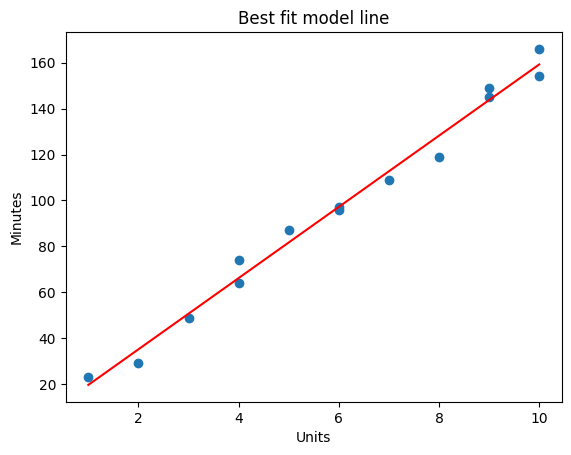

In [ ]:

fig,ax = plt.subplots()
# Plotting the actual target values
ax.scatter(x="Units",y="Minutes",data=computers)
# Plotting the target values predicted by the best fit model
ax.plot(computers.Units,computers.min_best_fit_model,color="red")
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Best fit model line")

#Sum of Squared Errors for the Best Fit Model:

In [ ]:

# Computing the individual errors for the best fit model
best_fit_model_obs = pd.DataFrame({"Units":computers.Units,
              "Actual time":computers.Minutes,
              "Predicted time":computers.min_best_fit_model,
              "Error":computers.min_best_fit_model - computers.Minutes})
best_fit_model_obs

Units  Actual time  Predicted time     Error
0       1           23       19.670426 -3.329574
1       2           29       35.179198  6.179198
2       3           49       50.687970  1.687970
3       4           64       66.196742  2.196742
4       4           74       66.196742 -7.803258
5       5           87       81.705514 -5.294486
6       6           96       97.214286  1.214286
7       6           97       97.214286  0.214286
8       7          109      112.723058  3.723058
9       8          119      128.231830  9.231830
10      9          149      143.740602 -5.259398
11      9          145      143.740602 -1.259398
12     10          154      159.249373  5.249373
13     10          166      159.249373 -6.750627

In [ ]:

# Sum of Squared Errors for the best fit model
sum(best_fit_model_obs.Error**2)

348.848370927318

#Best Fit Model using sklearn.linear_model.LinearRegression

In [ ]:
# Setting the 'Units' column as the input data or predictor column
X = computers[['Units']]
# Setting the 'Minutes' column as the output data or target column
y=computers['Minutes']
# Importing the required class
from sklearn.linear_model import LinearRegression
# Creating a linear regression model
model = LinearRegression()
# Fitting the model to the data i.e. building the model
model.fit(X, y)
# Fetching intercept and coefficient
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 4.161654135338296
Coefficients: [15.50877193]


In [ ]:
Train_acc=model.score(X, y)
print("Training Accuracy",Train_acc)

Training Accuracy 0.9874371980620736


#Computing the Coefficient of Determination

In [ ]:
#SUM OF SQUARES TOTAL
SST = sum((computers.Minutes.mean() - computers.Minutes)**2)
SST
# 27768.357142857145

In [ ]:
#SUM OF SQUARES ERROR
SSE = sum(best_fit_model_obs.Error**2)
SSE
# 348.848370927318

348.848370927318

In [ ]:

#SUM OF SQUARES REGRESSION
SSR = SST - SSE
SSR
# 27419.508771929828

27419.508771929828

In [ ]:
#COEFFIECIENT OF DETERMINATION
Rsq = SSR/SST
Rsq
# 0.9874371980620736

0.9874371980620736

In [ ]:
#COEFGICIENT OF DETERMINATION USING SKLEARN
Rsq1 = model.score(computers[["Units"]],y)
Rsq1
# 0.9874371980620736

0.9874371980620736

#BOSTON HOUSING DATASET

#Exercise:
Use the Boston dataset (Click here to download the Boston dataset) and perform the following activities:
1.    Consider the column, ‘RM’, as predictor, and ‘MEDV’ as the target variable
2.    Visualize the association between the predictor and the target using scatter plot.
3.    Split the data into train and test datasets, in the ratio of 67:33.
4.    Build a Linear Regression model using training dataset, to predict the target variable.
5.    Observe the coefficient and intercept values for the model.
6.    Evaluate the model using mean squared error values and R-squared values on the training and the testing datasets.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
boston_house=pd.read_csv("/content/sample_data/boston_housing.csv")
boston_house

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [ ]:
boston_house.describe().T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
MEDV      25.000000   50.0000

In [ ]:
boston_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
boston_house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

##### From the above Summary of Dataset, Both Features of Boston Housing Dataset: [RM & MEDV] are of float64 DataType, with zero Null Values of 506 Observations in the Given Dataset.

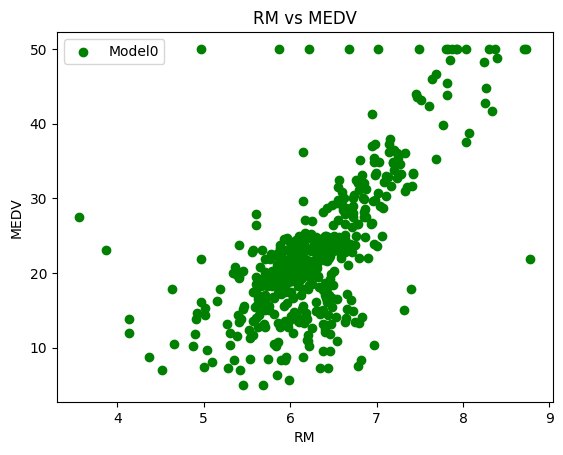

In [ ]:
#SCATTER PLOT OF THE OBSERVATION
plt.scatter(boston_house['RM'],boston_house['MEDV'], c='g', label='Model0')
#plt.plot(boston_house['RM'], boston_house['MEDV'], data=boston_house, c='b', label='model0')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title( 'RM vs MEDV')
plt.legend()
plt.show()

In [ ]:
boston1=boston_house[['RM','MEDV']]
boston1

RM  MEDV
0    6.575  24.0
1    6.421  21.6
2    7.185  34.7
3    6.998  33.4
4    7.147  36.2
..     ...   ...
501  6.593  22.4
502  6.120  20.6
503  6.976  23.9
504  6.794  22.0
505  6.030  11.9

[506 rows x 2 columns]

In [ ]:
bostmedv_mean=boston1.MEDV.mean()
print(bostmedv_mean)

22.532806324110677


In [ ]:
boston1['boston1_model1']=0.1+2*boston1.RM
boston1['boston1_model2']=3+7*boston1.RM
boston1['boston1_model3']=-35+9*boston1.RM
#print(boston1_model1)
#print(boston1_model2)

<ipython-input-23-37fb657802e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston1['boston1_model1']=0.1+2*boston1.RM
<ipython-input-23-37fb657802e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston1['boston1_model2']=3+7*boston1.RM
<ipython-input-23-37fb657802e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

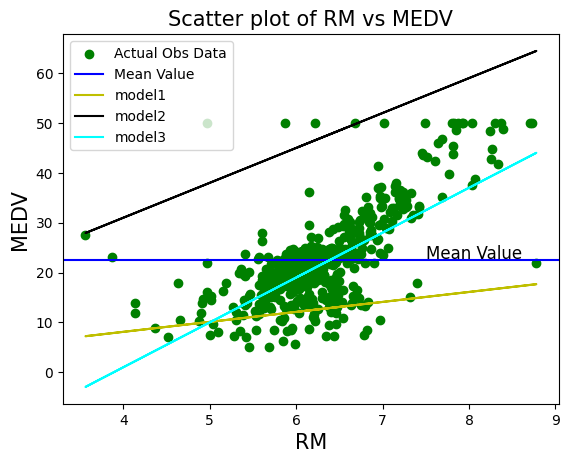

In [ ]:
plt.scatter(boston_house['RM'],boston_house['MEDV'], c='g', label='Actual Obs Data')
plt.axhline(bostmedv_mean, c='b', label='Mean Value')
plt.plot(boston1.RM, boston1.boston1_model1, c='y', label='model1')
plt.plot(boston1.RM, boston1.boston1_model2, c='black', label='model2')
plt.plot(boston1.RM, boston1.boston1_model3, c='cyan', label='model3')
#plt.plot(boston1.RM, boston1.boston1_model4, c='magenta', label='model4')
plt.annotate('Mean Value', (7.5, 22.75), size=12)
plt.xlabel('RM', size=15)
plt.ylabel('MEDV', size=15)
plt.title( 'Scatter plot of RM vs MEDV',size=15)
plt.legend()
plt.show()

#####from above viz.(scatter plot)
we can understand that model3 better fits the data than model1 & model2 which minimises the Least Squares Error.

In [ ]:
X=boston_house.iloc[:,5:6]
y=boston_house.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, y_train, y_test= train_test_split(X, y, test_size=0.33)#, random_state=1)
print(X_Train.shape)
print(X_Test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 1)
(167, 1)
(339,)
(167,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model=LinearRegression()
model.fit(X_Train, y_train)
Train_acc=model.score(X_Train, y_train)
Test_acc=model.score(X_Test, y_test)
print('Training Accuracy:',Train_acc)
print('Testing Accuracy:',Test_acc)

Training Accuracy: 0.49396016806320675
Testing Accuracy: 0.4659855904546619


In [ ]:
pred_tst=model.predict(X_Test)
#Test_acc=model.score(X_Test, pred_tr)
#print('Testing Accuracy:',Test_acc)

In [ ]:
#INTETCEPT & COEFFICIENT OF
#REGRESSION MODEL BUILD ON THE DATA ARE:
print("INTERCEPT: ",model.intercept_)
print("COEFFICIENT: ",model.coef_)

INTERCEPT:  -34.96276356011245
COEFFICIENT:  [9.14196984]


In [ ]:
boston1['boston1_model4']=-38+9.6*boston1.RM

<ipython-input-31-d4fca4f77663>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston1['boston1_model4']=-38+9.6*boston1.RM


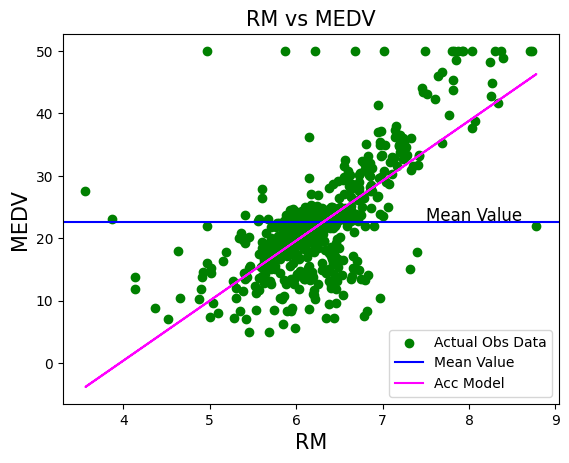

In [ ]:
plt.scatter(boston_house['RM'],boston_house['MEDV'], c='g', label='Actual Obs Data')
plt.axhline(bostmedv_mean, c='b', label='Mean Value')
plt.plot(boston1.RM, boston1.boston1_model4, c='magenta', label='Acc Model')
plt.annotate('Mean Value', (7.5, 22.75), size=12)
plt.xlabel('RM', size=15)
plt.ylabel('MEDV', size=15)
plt.title( 'RM vs MEDV',size=15)
plt.legend()
plt.show()

In [ ]:
#TESTING
MSE=mean_squared_error(y_test, pred_tst)
print("Mean Squared Error (MSE):=",round(MSE,2))

Mean Squared Error (MSE):= 51.17


In [ ]:
#TESTING
R_squared=r2_score(y_test, pred_tst)
print("Coeff of Determination R²:=",round(R_squared,4))

Coeff of Determination R²:= 0.466


#MULTIPLE LINEAR REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# read the data from input csv file
delivery = pd.read_csv("/content/sample_data/delivery.csv")
# view sample data
delivery.head()

n.prod  distance  delTime
0       7       560    16.68
1       3       220    11.50
2       3       340    12.03
3       4        80    14.88
4       6       150    13.75

In [ ]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n.prod    25 non-null     int64  
 1   distance  25 non-null     int64  
 2   delTime   25 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 732.0 bytes


###Visualizing the delivery dataset

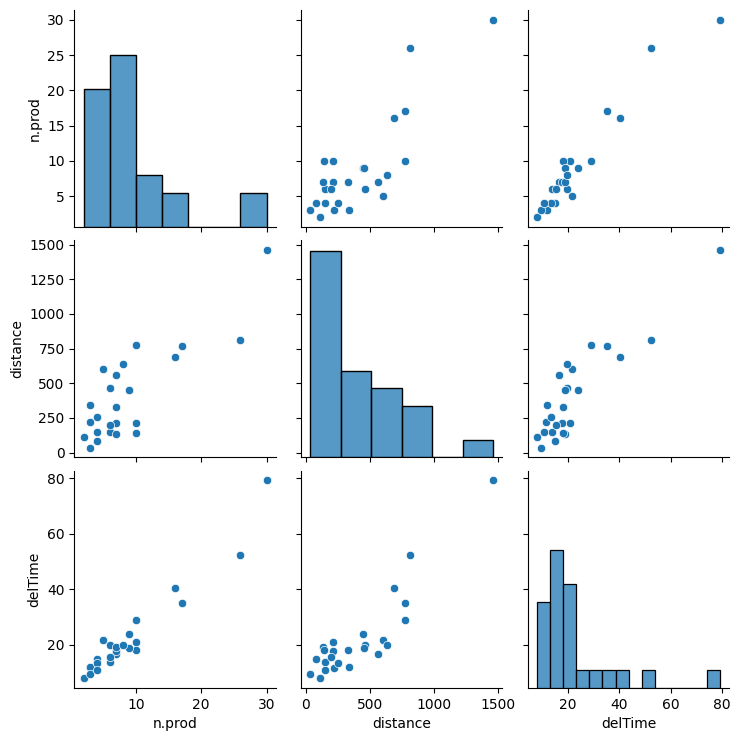

In [ ]:
# Visualizing data
import seaborn as sns
sns.pairplot(delivery)

######Building Multiple Linear Regression model

In [ ]:
# importing the required module to build the model
from sklearn.linear_model import LinearRegression
# Instantiating the algorithm for building the model
model = LinearRegression()
# selecting the predictors and targets
X = delivery[["n.prod","distance"]]
y = delivery["delTime"]
# building the model using fit() method
model.fit(X,y)
print("Intercept:",model.intercept_ ,"\nCoefficients:",model.coef_)
# Sample output for the above code
# Intercept: 2.3412311451922
# Coefficients: [1.61590721 0.01438483]

Intercept: 2.3412311451922108 
Coefficients: [1.61590721 0.01438483]


####The Best Model for Delivery Dataset can be written as ::

Expected delTime = 2.3412 +(1.6159*n.prod) + (0.0144*distance) + ε

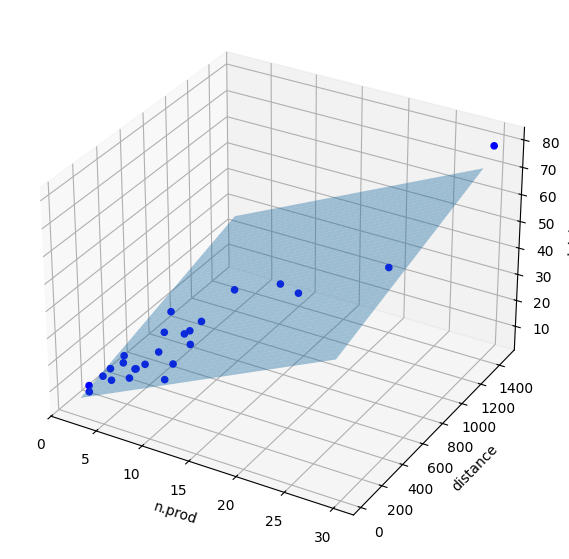

In [ ]:

#Setting up the plot area
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')

#projection = '3d' is used to have 3D axes
#3d scatterplot of the delivery dataset
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"], zs=delivery["delTime"],
           c='blue',
           alpha=1,
           marker='o')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")

#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery["n.prod"].min(), delivery["n.prod"].max(), 1)
y_surf = np.arange(delivery["distance"].min(), delivery["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})

#Predicting the output of model for every point in the mesh
out = model.predict(X_mesh)

#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                alpha = 0.4) # apha => transparency of the surface

###MultiCollinearity & VIF

Variance Inflation Factor
In addition to correlation, there is another measure called variance inflation factor(VIF) to determine if the predictor variables are independent of each other.

The range of VIF values start from 1. As a common practice, VIF values can be interpreted as follows -


1 => No correlation between variables

1 to 5 => Slightly correlated

Greater than 5 => Highly correlated

In [ ]:
# finding the correlation
np.corrcoef(delivery["n.prod"],delivery["distance"])
# correlation value derived - 0.824215

array([[1.      , 0.824215],
       [0.824215, 1.      ]])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculating the VIF for each attributes
vif = pd.Series([variance_inflation_factor(X.values,idx)
           for idx in range(X.shape[1])],
          index=X.columns)
print(vif)

n.prod      7.848245
distance    7.848245
dtype: float64


In [ ]:
# score() method for regression model,
#returns the 'coef of determination'
#(r^2) value for the model
model.score(X,y)
# sample model score as output
#0.9595937494832257

0.9595937494832257

###Adjusted R-squared
To establish a best fit linear regression model with minimum error the least squares method is used. For a linear regression model, every additional predictor variable tends to minimize the error of the model. As a result, the R2 value will never decrease for any number of additional predictor variables that is included in the model.

In [ ]:
# Model with a single predictor - n.prod
model1 = LinearRegression()
features = ["n.prod"]
target = ["delTime"]
model1.fit(delivery[features],delivery[target])
print(model1.score(delivery[features],delivery[target]))

#sample model1 score
#0.9304813135986855

# Model with multiple predictors - n.prod,distance
model2 = LinearRegression()
features = ["n.prod","distance"]
target = ["delTime"]
model2.fit(delivery[features],delivery[target])
print(model2.score(delivery[features],delivery[target]))

#sample model2 score
#0.9595937494832257

0.9304813135986856
0.9595937494832257


In [ ]:
#computation of adjusted R-squared
X = delivery[features]
y = delivery[target]
adjusted_rscore = 1 - (1-model2.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_rscore)
#sample adjusted R-Squared
#0.9559204539817008

0.9559204539817008


####Let us now understand the end-to-end Machine Learning process of Regression analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
house_data=pd.read_csv('/content/sample_data/kc_house_data.csv')
house_data.head(1).T

0
id                  7129300520
date           20141013T000000
price                 221900.0
bedrooms                     3
bathrooms                  1.0
sqft_living               1180
sqft_lot                  5650
floors                     1.0
waterfront                   0
view                         0
condition                    3
grade                        7
sqft_above                1180
sqft_basement                0
yr_built                  1955
yr_renovated                 0
zipcode                  98178
lat                    47.5112
long                  -122.257
sqft_living15             1340
sqft_lot15                5650

In [ ]:

#Determine the size of the data
print(house_data.shape)
#output
#(21613, 21)

(21613, 21)


In [ ]:
#Determine the columns in the data
print(house_data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
#View information about the data in each columns
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Feature Engineering
In the following code, following tasks to be performed:
Selecting features to work on. Creating two new features - year and month from the date.
Encoding the categorical features
Normalizing the continuous numerical features

####Feature Selection

In [ ]:
house_data_df = house_data[["price","date", "bedrooms",
                                  "bathrooms", "sqft_living", "floors",
                                  "waterfront", "view", "condition", "grade","zipcode"]]

In [ ]:
# Extracting year and month from date
house_data_df.loc[:,"year"] = house_data["date"].str[0:4]
house_data_df.loc[:,"month"] = house_data["date"].str[4:6]
#removing date after this extraction
house_data_df = house_data_df.drop(columns=["date"])

<ipython-input-7-8040f7bc30dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data_df.loc[:,"year"] = house_data["date"].str[0:4]
<ipython-input-7-8040f7bc30dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data_df.loc[:,"month"] = house_data["date"].str[4:6]


####Feature Encoding

In [ ]:
# encoding categorical values
cat_features = ["waterfront", "view", "condition", "grade", "year", "month", "zipcode"]
house_data_df = pd.get_dummies(house_data_df,columns=cat_features)
print(house_data_df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront_0', 'waterfront_1', 'view_0', 'view_1', 'view_2',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=113)


####Feature Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
# finding the mean and std deviation of numerical columns
scaler = StandardScaler().fit(house_data_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']])
# scaling columns to a common range
house_data_normalized = scaler.transform(house_data_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']])# Scaled data
#note that output is a 2-Dimensional array of normalized data
house_data_normalized

array([[-0.86671733, -0.39873715, -1.44746357, -0.97983502, -0.915427  ],
       [-0.00568792, -0.39873715,  0.1756067 ,  0.53363434,  0.93650577],
       [-0.98084935, -1.47395936, -1.44746357, -1.42625404, -0.915427  ],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, -1.15404732,  0.93650577],
       [-0.38158814, -0.39873715,  0.50022075, -0.52252773,  0.93650577],
       [-0.58588173, -1.47395936, -1.77207762, -1.15404732,  0.93650577]])

In [ ]:
#updating the numerical(normalized) data into the dataframe
house_data_df_normalized=pd.DataFrame(house_data_normalized,columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors'])
house_data_df_normalized=house_data_df_normalized.join(house_data_df[house_data_df.columns.drop(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors'])])

In [ ]:
Y = house_data_df_normalized['price']
X = house_data_df_normalized[house_data_df_normalized.columns.drop('price')]
print(X.shape)

(21613, 112)


####Splitting into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=100)
X_train.shape , X_test.shape
#output
#((17290, 112), (4323, 112))

((17290, 112), (4323, 112))

####Build a model and evaluate its performance using R-squared

In [ ]:
#importing required module to build the model
from sklearn.linear_model import LinearRegression

#building and training the model
model = LinearRegression()
model.fit(X_train,Y_train)

#Evaluating the model on the train and test data for R-Squared score
train_score=model.score(X_train,Y_train)
test_score=model.score(X_test,Y_test)

print('Train Score (R-Squared): ',train_score)
print('Test Score (R-Squared)',test_score)

# sample output
# Train Score (R-Squared):  0.8336987270194174
# Test Score (R-Squared) 0.8313082620280754

Train Score (R-Squared):  0.8336992006394245
Test Score (R-Squared) 0.8313119542430129


####Evaluating the model performance using RMSE

In [ ]:

from sklearn.metrics import mean_squared_error
#root mean square error (RMSE) calculation for train data

train_predictions = model.predict(X_train)
train_RMSE=mean_squared_error(Y_train,train_predictions)**0.5

#root mean square error (RMSE) calculation for test data
test_predictions = model.predict(X_test)
test_RMSE=mean_squared_error(Y_test,test_predictions)**0.5
print('Train RMSE : ',train_RMSE)
print('Test RMSE : ',test_RMSE)

# output
# Train RMSE :  0.4078007927303328
# Test RMSE :  0.4107102720475509

Train RMSE :  0.40780021202896966
Test RMSE :  0.41070577734343144


#EXERCISE FOR MLR:
Use the Boston dataset (Click here to download the Boston dataset) and perform the following activities:
1.    Consider the columns, ‘RM’, ‘DIS’, ‘TAX’, ‘INDUS’ as predictors, and ‘MEDV’ as the target variable
2.    Calculate the Variance Inflation Factor for each of the selected predictors. Based on the VIF factor, finalize the list of predictors.
3.    For every predictor identified, visualize its association with the target column using scatter plot.
4.    Split the data into train and test datasets, in the ratio of 67:33.
5.    Build a Linear Regression model, to predict the target variable using the selected predictors.
6.    Observe the coefficients and intercept values for the model.
7.    Evaluate the model using mean squared error values, R-squared values, and adjusted R-Squared values, on the train and the test data.

###2. Logistic Regression on CHD data:

In [ ]:

# Importing the required library
import pandas as pd
import numpy as np
# Importing the dataset
chd = pd.read_csv("/content/sample_data/chd_data.csv")
# Printing the first 5 rows
chd.head()

age  chd
0   20    0
1   23    0
2   24    0
3   25    1
4   25    0

#####The variable chd = 0 indicates the absence of coronary heart disease, whereas chd=1 indicates the presence of coronary heart disease.

Text(0.5, 1.0, 'Age vs. Coronary Heart Disease')

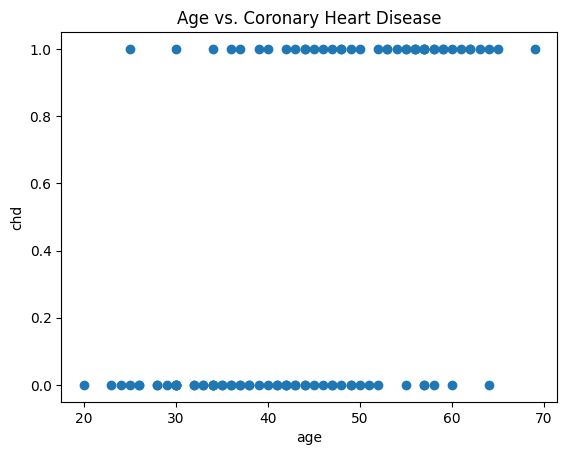

In [ ]:
# Importing the required library
import matplotlib.pyplot as plt
%matplotlib inline
# Plotting the 'chd' values against 'age' values
plt.scatter("age","chd",data=chd)
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Age vs. Coronary Heart Disease")

In [ ]:
# Importing the required class
from sklearn.model_selection import train_test_split

# Specifying the columns as predictor and target variable
predictors = ["age"]
target = "chd"
X = chd[predictors] # X contains the predictor values or input data
y = chd[target] # y contains the target labels

# Spliting the data in training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Checking the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (70, 1)
Shape of y_train: (70,)
Shape of X_test: (30, 1)
Shape of y_test: (30,)


In [ ]:
# Importing the required class
from sklearn.linear_model import LogisticRegression

# Creating the object of the class LogisticRegression
model = LogisticRegression(random_state=0)

# Training the model using the training data
model.fit(X_train,y_train)

# Getting the intercept and the coefficients of the model
print("Intercept:",model.intercept_,"\nCoefficients:", model.coef_)

Intercept: [-5.6511192] 
Coefficients: [[0.11144141]]


In [ ]:
# Creating a sample data
test=np.array([29]).reshape(1,-1)

# Predicting the probabilities for each of the class labels
print("Predicted probability for class '0' and '1' respectively:", model.predict_proba(test))

# Predicting the final class label or target value
print("\nPredicted target i.e. 'chd' value:",model.predict(test))
print("\n")

Predicted probability for class '0' and '1' respectively: [[0.91828861 0.08171139]]

Predicted target i.e. 'chd' value: [0]




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("Accuracy score of the model on training data:", model.score(X_train, y_train))
print("Accuracy score of the model on test data:", model.score(X_test, y_test))

Accuracy score of the model on training data: 0.7428571428571429
Accuracy score of the model on test data: 0.7333333333333333


##Logistic Regression on Credit Risk data:

In [ ]:

# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# Importing the dataset
credit_data = pd.read_csv("/content/sample_data/credit_risk.csv")

In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [ ]:
#Understanding the values
#the 'class' column
#(our target column in this analysis) can take
credit_data['class'].unique()

array(['good', 'bad'], dtype=object)

In [ ]:

# Selecting predictors as all columns except the 'class' column
X = credit_data.columns.drop("class")

# Setting the target as the 'class' column
y = credit_data['class']

In [ ]:

# Encoding all the features/predictor variables using the get_dummies method()
credit_data_encoded = pd.get_dummies(credit_data[X])

# Checking the shape of the input data
credit_data_encoded.shape

(1000, 61)

In [ ]:
credit_data_encoded.columns

Index(['credit_usage', 'current_balance', 'location', 'residence_since',
       'cc_age', 'existing_credits', 'num_dependents', 'over_draft_0<=X<200',
       'over_draft_<0', 'over_draft_>=200', 'over_draft_no checking',
       'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'credit_history_no credits/all paid', 'purpose_business',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'Average_Credit_Balance_100<=X<500',
       'Average_Credit_Balance_500<=X<1000', 'Average_Credit_Balance_<100',
       'Average_Credit_Balance_>=1000',
       'Average_Credit_Balance_no known savings', 'employment_1<=X<4',
       'employment_4<=X<7', 'employment_<1', 'employment_>=7',
       'employment_unemployed', 'p

In [ ]:
credit_data_encoded.columns.value_counts()

credit_usage              1
current_balance           1
location                  1
residence_since           1
cc_age                    1
                         ..
job_unskilled resident    1
own_telephone_none        1
own_telephone_yes         1
foreign_worker_no         1
foreign_worker_yes        1
Name: count, Length: 61, dtype: int64

#####Splitting Credit Risk data into Training and testing data

In [ ]:

# Importing the required module
from sklearn.model_selection import train_test_split

#splitting data into train and test datasets in 85:15 ratio
X_train,X_test,y_train,y_test = train_test_split(credit_data_encoded, y,test_size=0.15,random_state=100)

# Checking the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (850, 61)
Shape of y_train: (850,)
Shape of X_test: (150, 61)
Shape of y_test: (150,)


##Building the model

In [ ]:
# Importing the required class.
from sklearn.linear_model import LogisticRegression

# Instantiating the required algorithm for model building.
model = LogisticRegression()

# Building the model based on the training data.
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:

# Getting the accuracy on training data
train_accuracy = model.score(X_train,y_train)
print("Train accuracy = ", train_accuracy)

# Getting the accuracy on test data
test_accuracy = model.score(X_test,y_test)
print("Test accuracy = ", test_accuracy)

Train accuracy =  0.7752941176470588
Test accuracy =  0.74


####Measuring Model Performance using Confusion Matrix

In [ ]:
# Predicting targets based on the model built
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Importing the required function
from sklearn.metrics import confusion_matrix

# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_train,train_predictions)

# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)

bad  good
bad   125   132
good   59   534

In [ ]:

# Calculating train accuracy from confusion matrix
train_correct_predictions = train_conf_matrix[0][0]+train_conf_matrix[1][1]
train_total_predictions = train_conf_matrix.sum()
train_accuracy = train_correct_predictions/train_total_predictions
print(train_accuracy)

0.7752941176470588


In [ ]:
# Confusion matrix for the test data
test_conf_matrix = confusion_matrix(y_test,test_predictions)
pd.DataFrame(test_conf_matrix,columns=model.classes_,index=model.classes_)

bad  good
bad    19    24
good   15    92

In [ ]:
# Calculating test accuracy from confusion matrix
test_correct_predictions = test_conf_matrix[0][0]+test_conf_matrix[1][1]
total_predictions = test_conf_matrix.sum()
test_accuracy = test_correct_predictions/total_predictions
print(test_accuracy)

0.74


###Precision, Recall, and F1-score:

In [ ]:
# Importing the required function
from sklearn.metrics import classification_report

# Generating the report and printing the same
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

         bad       0.56      0.44      0.49        43
        good       0.79      0.86      0.83       107

    accuracy                           0.74       150
   macro avg       0.68      0.65      0.66       150
weighted avg       0.73      0.74      0.73       150



###LOGISTIC REGRESSION EXERCISE

Exercise 1:Bank Marketing Dataset

1.Consider duration, age, and
campaign columns as predictors and the
column “y”(states whether the client
will subscribe a term deposit or not)
as target  variable.

2.Use 70% of the data as training data set and 30% of data as testing data set.

3.Build a logistic regression model.  

4.Determine the classification accuracy
rate of the model on both train and test set.

======================================
Exercise 2:BankNote Authenc'tion Dataset


1.Consider 'variance', 'skewness', 'curtosis', 'entropy' columns as predictors and the column 'class' as the target  variable

2.Build a logistic regression model.

3.Calculate the classification accuracy,
precision and recall for the model.

#=======================
#         3. DECISION TREE
#=======================

###Decision tree on credit risk data set

In [ ]:

#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# Reading data from input csv file
credit_data = pd.read_csv("/content/sample_data/credit_risk.csv")

# Uncomment the following line to view the sample data
credit_data.head()

over_draft  credit_usage                  credit_history  \
0           <0             6  critical/other existing credit   
1     0<=X<200            48                   existing paid   
2  no checking            12  critical/other existing credit   
3           <0            42                   existing paid   
4           <0            24              delayed previously   

               purpose  current_balance Average_Credit_Balance employment  \
0             radio/tv             1169       no known savings        >=7   
1             radio/tv             5951                   <100     1<=X<4   
2            education             2096                   <100     4<=X<7   
3  furniture/equipment             7882                   <100     4<=X<7   
4              new car             4870                   <100     1<=X<4   

   location     personal_status other_parties  ...  property_magnitude cc_age  \
0         4         male single          none  ...         real estate     67   
1         2  female div/dep/mar          none  ...         real estate     22   
2         2         male single          none  ...         real estate     49   
3         2         male single     guarantor  ...      life insurance     45   
4         3         male single          none  ...   no known property     53   

   other_payment_plans   housing existing_credits                 job  \
0                 none       own                2             skilled   
1                 none       own                1             skilled   
2                 none       own                1  unskilled resident   
3                 none  for free                1             skilled   
4                 none  for free                2             skilled   

  num_dependents  own_telephone foreign_worker class  
0              1            yes            yes  good  
1              1           none            yes   bad  
2              2           none            yes  good  
3              2           none            yes  good  
4              2           none            yes   bad  

[5 rows x 21 columns]

In [ ]:
# Understanding the various attributes
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [ ]:
# Selecting the predictor attributes
X = credit_data.columns.drop("class")

# Selecting  the target
y = credit_data['class']

In [ ]:
# Encoding all the predictor variables to convert the categorical values to numerical values.
credit_data_encoded = pd.get_dummies(credit_data[X])
print("Total number of predictors after encoding = ", len(credit_data_encoded.columns))

# Printing the list of columns after encoding to understand the encoding process
credit_data_encoded.columns

Total number of predictors after encoding =  61


Index(['credit_usage', 'current_balance', 'location', 'residence_since',
       'cc_age', 'existing_credits', 'num_dependents', 'over_draft_0<=X<200',
       'over_draft_<0', 'over_draft_>=200', 'over_draft_no checking',
       'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'credit_history_no credits/all paid', 'purpose_business',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'Average_Credit_Balance_100<=X<500',
       'Average_Credit_Balance_500<=X<1000', 'Average_Credit_Balance_<100',
       'Average_Credit_Balance_>=1000',
       'Average_Credit_Balance_no known savings', 'employment_1<=X<4',
       'employment_4<=X<7', 'employment_<1', 'employment_>=7',
       'employment_unemployed', 'p

In [ ]:

# Import the required function
from sklearn.model_selection import train_test_split

#splitting data into train and test datasets
X_train,X_test,y_train,y_test = train_test_split(credit_data_encoded, y,test_size=0.15,random_state=100)

# Printing the shape of the resulting datasets
print("Shape of X_train and y_train are:", X_train.shape, "and", y_train.shape, " respectively")
print("Shape of X_test and y_test are:", X_test.shape, "and", y_test.shape, " respectively")

Shape of X_train and y_train are: (850, 61) and (850,)  respectively
Shape of X_test and y_test are: (150, 61) and (150,)  respectively


In [ ]:
# Importing required class
from sklearn.tree import DecisionTreeClassifier

# Creating an object of the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state = 1)

# Training model on the training data
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Predicting target values using the model built on training data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

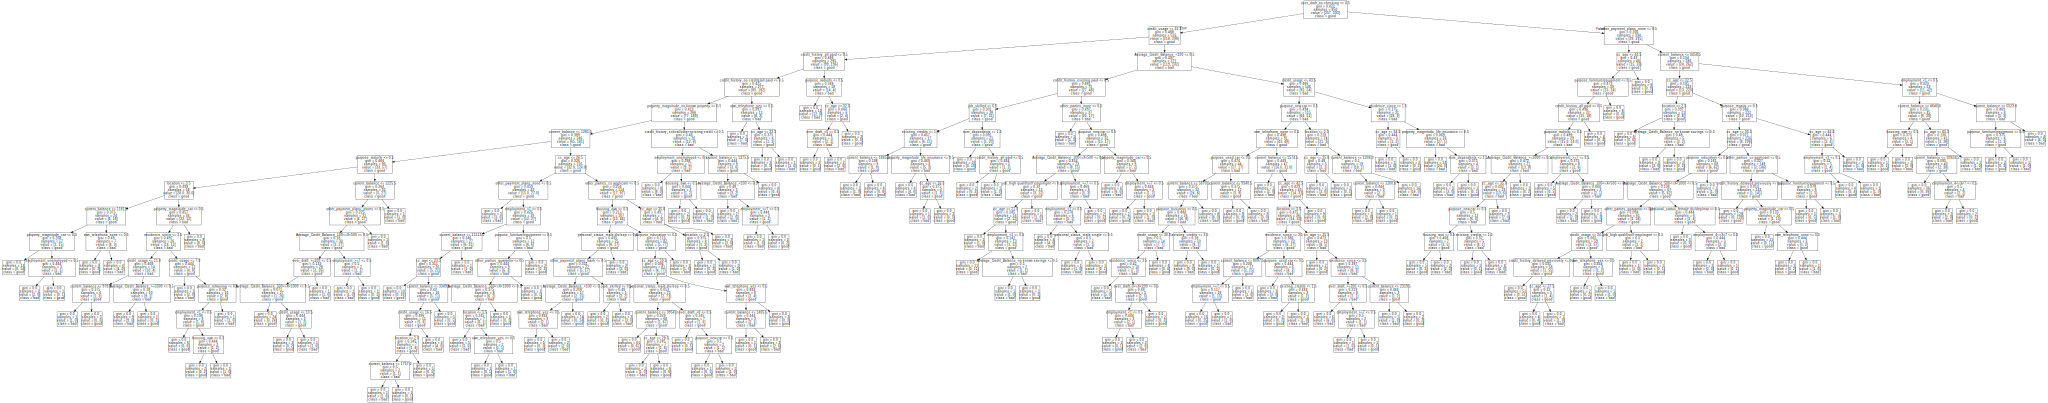

In [ ]:

# Importing the required libraries (Ensure that they are already installed.)
from sklearn.tree import export_graphviz
import graphviz

# Generating the tree
dot_data = export_graphviz(model, out_file=None,
                          feature_names=credit_data_encoded.columns,
                          class_names=model.classes_,
                          )
graph = graphviz.Source(dot_data)
graph

##Evaluating The performance of a model

In [ ]:

# Getting the accuracy on train data
train_accuracy = model.score(X_train,y_train)
print("Accuracy of the model on train data = ",train_accuracy)
# Getting the accuracy on test data
test_accuracy = model.score(X_test,y_test)
print("Accuracy of the model on test data = ",test_accuracy)

Accuracy of the model on train data =  1.0
Accuracy of the model on test data =  0.6533333333333333


In [ ]:
# Model 1:
# Min number of samples required in a set to split = 10
# Min reduction in impurity required for split to be included in the tree = 0.005
model1 = DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)
# Fitting the model to the training data
model1.fit(X_train,y_train)
# Measuring the accuracy of the model
print("train_accuracy = ", model1.score(X_train,y_train))
print("test_accuracy = ", model1.score(X_test,y_test))

train_accuracy =  0.7635294117647059
test_accuracy =  0.7266666666666667


In [ ]:

# Model 2:
# Min number of samples required in a set to split = 20
# Min reduction in impurity required for split to be included in the tree = 0.1
model2 = DecisionTreeClassifier(min_samples_split=20,min_impurity_decrease=0.1)
# Fitting the model to the training data
model2.fit(X_train,y_train)
# Measuring the accuracy of the model
print("Model2 train accuracy = ", model2.score(X_train,y_train))
print("Model2 test accuracy = ", model2.score(X_test,y_test))

Model2 train accuracy =  0.6976470588235294
Model2 test accuracy =  0.7133333333333334


#Exercise
For the Bank Marketing dataset available in UCI Machine Learning Repository, induct a decision tree to predict whether a client will subscribe to a term deposit or not (given in column 'y').

1.Consider the column 'y' as the target variable. From the remaining columns, consider all except 'duration' as predictors.
-----
2.Encode the predictors to convert them to numerical data.
-------
3.Split the data into train and test with a ratio of 80:20.
------
4.Build a model using Decision Tree algorithm, to predict the target.
------
5.Determine the accuracy, precision and recall for every class in the outcome.
------
6.Modify the hyperparameters, and build a new model. Compare the performance of both models.
------

#4. CLASSIFICATION USING KNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

#reading data from input csv file
defaulter = pd.read_csv("/content/sample_data/defaulter.csv")
defaulter

defaulter student    balance    income
0         No     Yes   817.1804  12106.14
1        Yes     Yes  1486.9980  17854.40
2        Yes     Yes  1102.4350  17391.78
3        Yes     Yes  1233.4460  12586.48
4        Yes     Yes  1276.6850  19282.44
5        Yes     Yes  1289.2460  13624.55
6         No     Yes   673.8124  17672.29
7         No      No   870.4124  17685.45
8         No     Yes   903.1768  15810.57
9         No     Yes   879.6270  14898.31
10   unknown     Yes  1000.0000  16900.00

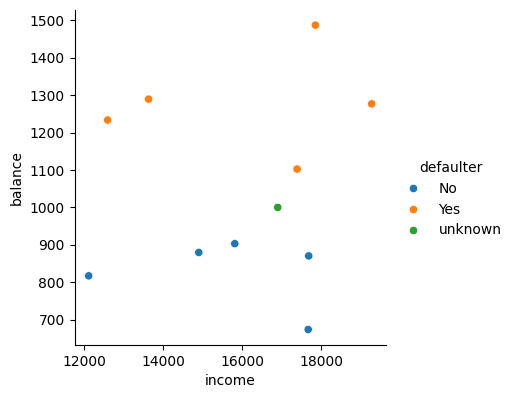

In [ ]:
#visualizing data using seaborn - pariplot
import seaborn as sns
sns.pairplot(defaulter,hue="defaulter",
             x_vars="income",y_vars="balance",height=4)

#Euclidean Distance

In [ ]:

# retrieving first data point from the dataset
x1 = defaulter.loc[0,["balance","income"]]

# retrieving second data point from the dataset
x2 = defaulter.loc[1,["balance","income"]]

# Euclidean distance between first and second data point
np.linalg.norm(x1-x2)

#output
#5787.1537602581275

np.float64(5787.1537602581275)

In [ ]:

# considering 3 random datapoints - t1, t2, t3
t1 = np.array([26,1000])
t2 = np.array([66,1000])
t3 = np.array([36,10000])

# distance between t1 & t3
dist_t3_t1 = np.linalg.norm(t3-t1)

# distance between t2 & t3
dist_t2_t3 = np.linalg.norm(t2-t3)
print("Distance between t2 and t3",dist_t2_t3,
      "\nDistance between t1 and t3",dist_t3_t1)
#output
#Distance between t2 and t3 9000.049999861112
#Distance between t1 and t3 9000.00555555384

Distance between t2 and t3 9000.049999861112 
Distance between t1 and t3 9000.00555555384


###NORMALIZING

In [ ]:
# Using MinMaxScaler of Scikit Learn library for Normalization of all features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(defaulter[["balance","income"]])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]
defaulter

defaulter student    balance    income  norm_balance  norm_income
0         No     Yes   817.1804  12106.14      0.176304     0.000000
1        Yes     Yes  1486.9980  17854.40      1.000000     0.801006
2        Yes     Yes  1102.4350  17391.78      0.527091     0.736541
3        Yes     Yes  1233.4460  12586.48      0.688199     0.066934
4        Yes     Yes  1276.6850  19282.44      0.741371     1.000000
5        Yes     Yes  1289.2460  13624.55      0.756818     0.211587
6         No     Yes   673.8124  17672.29      0.000000     0.775630
7         No      No   870.4124  17685.45      0.241765     0.777463
8         No     Yes   903.1768  15810.57      0.282057     0.516203
9         No     Yes   879.6270  14898.31      0.253097     0.389082
10   unknown     Yes  1000.0000  16900.00      0.401123     0.668013

In [ ]:

#distance between two normalized data points
x1_n = defaulter.loc[0,["norm_balance","norm_income"]]
x2_n = defaulter.loc[1,["norm_balance","norm_income"]]
np.linalg.norm(x1_n-x2_n)

#output
#1.1489497815843785

np.float64(1.1489497815843788)

###Prediction based on 'k' Nearest Neighbors for instance of index number 10

In [ ]:

# Lambda function to calculate Euclidean distance
x11 = defaulter.loc[10,["norm_balance","norm_income"]]
dist_to_X11 = lambda x: np.linalg.norm(x-x11)

# calculating Euclidean Distance
defaulter["dist_toX11"] = defaulter[["norm_balance",
                                               "norm_income"]].apply(dist_to_X11,axis=1)
# sorting the datapoints based on distance to find the 'k' nearest neighbors
defaulter.sort_values("dist_toX11")

defaulter student    balance    income  norm_balance  norm_income  \
10   unknown     Yes  1000.0000  16900.00      0.401123     0.668013   
2        Yes     Yes  1102.4350  17391.78      0.527091     0.736541   
8         No     Yes   903.1768  15810.57      0.282057     0.516203   
7         No      No   870.4124  17685.45      0.241765     0.777463   
9         No     Yes   879.6270  14898.31      0.253097     0.389082   
6         No     Yes   673.8124  17672.29      0.000000     0.775630   
4        Yes     Yes  1276.6850  19282.44      0.741371     1.000000   
5        Yes     Yes  1289.2460  13624.55      0.756818     0.211587   
1        Yes     Yes  1486.9980  17854.40      1.000000     0.801006   
3        Yes     Yes  1233.4460  12586.48      0.688199     0.066934   
0         No     Yes   817.1804  12106.14      0.176304     0.000000   

    dist_toX11  
10    0.000000  
2     0.143401  
8     0.192932  
7     0.193325  
9     0.315775  
6     0.415309  
4     0.475378  
5     0.578657  
1     0.613466  
3     0.666114  
0     0.704830

###Building kNN model using sklearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#####Step 1: Loading The Data

In [ ]:

#reading in data from csv file
defaulter = pd.read_csv("/content/sample_data/defaulter.csv")
defaulter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   defaulter  10000 non-null  object 
 1   student    10000 non-null  object 
 2   balance    10000 non-null  float64
 3   income     10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [ ]:
defaulter.head(5)

defaulter student      balance       income
0        No      No   729.526495  44361.62507
1        No     Yes   817.180407  12106.13470
2        No      No  1073.549164  31767.13895
3        No      No   529.250605  35704.49394
4        No      No   785.655883  38463.49588

#####Step 2: Feature engineering - normalization

In [ ]:

from sklearn.preprocessing import MinMaxScaler
#applying MinMaxScaler to the default dataset

scaler = MinMaxScaler()
features_to_scale = ["balance","income"]
scaled_values = scaler.fit_transform(defaulter[features_to_scale])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]
defaulter.head()

defaulter student      balance       income  norm_balance  norm_income
0        No      No   729.526495  44361.62507      0.274845     0.598905
1        No     Yes   817.180407  12106.13470      0.307868     0.155727
2        No      No  1073.549164  31767.13895      0.404453     0.425862
3        No      No   529.250605  35704.49394      0.199392     0.479959
4        No      No   785.655883  38463.49588      0.295991     0.517867

####Step3:Spliting data train and test data

In [ ]:
from sklearn.model_selection import train_test_split

# selecting the predictors and target
X=defaulter[['norm_balance','norm_income']]
Y=defaulter['defaulter']

# splitting data into train and test data set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

###Step 4: Building the model

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

#kNN with k=3
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
model.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

####Step 5: Evaluate model performance on train and test sets

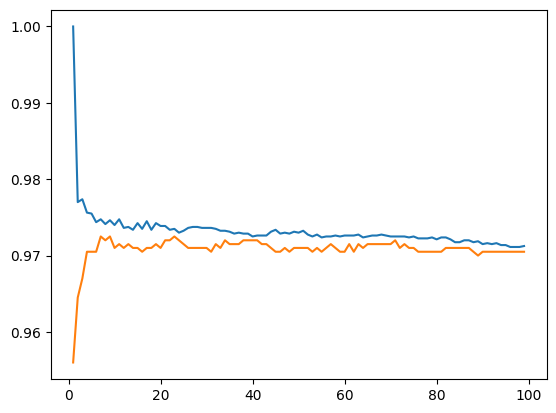

In [ ]:

train_accuracies = []
test_accuracies = []

# building KNN model for values of k from 1 to 100
k_vals = [i for i in range(1,100)]
features = ["norm_balance","norm_income"]
target = "defaulter"

for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(X_train,Y_train)
    train_accuracy_k = model.score(X_train,Y_train)
    test_accuracy_k = model.score(X_test,Y_test)
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)

plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)

#KNN
Exercise:
Perform the following activities using Bank Marketing dataset.

1. Consider the columns - duration, and age as predictors and the column “y”(indicates whether the client will subscribe for a term deposit) as the target variable

2.  Use 60% of the data as training dataset and 40% of data as testing dataset.

3.  Build a kNN classification model.  

4.  Plot the classification accuracies on train and test data for different values of k.

The Bank Marketing data set dataset can be downloaded here.

#5. SUPPORT VECTOR MACHINES

#####Introduction to Support Vector Machine (SVM)

#Building an SVM model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#reading input from csv file
iris_data = pd.read_csv("/content/sample_data/iris.csv")
iris_data.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [ ]:
#creating new column 'v_nv', to distinguish versicolor species from rest
#the below lambda function returns 0 for 'versicolor' species and returns 1 for rest.
v_nv_fn = lambda x: 0 if x=="versicolor" else 1

# new column added into dataframe
iris_data["v_nv"] = iris_data["Species"].apply(v_nv_fn)
iris_data[iris_data['v_nv']==0].head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species  v_nv
50           7.0          3.2           4.7          1.4  versicolor     0
51           6.4          3.2           4.5          1.5  versicolor     0
52           6.9          3.1           4.9          1.5  versicolor     0
53           5.5          2.3           4.0          1.3  versicolor     0
54           6.5          2.8           4.6          1.5  versicolor     0

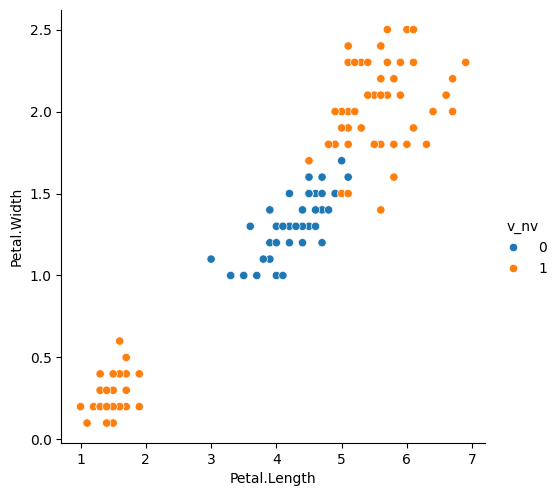

In [ ]:

#visualization using seaborn - pairplot
import seaborn as sns
sns.pairplot(iris_data,
             x_vars = "Petal.Length",y_vars="Petal.Width",
             hue="v_nv",height=5)

###Model Creation

In [ ]:

#Support Vector Classification
from sklearn.svm import SVC

#setting predictors and target
X = iris_data[["Petal.Length","Petal.Width"]]
Y = iris_data["v_nv"]

# model building
model = SVC()
model.fit(X,Y)

SVC()

In [ ]:
model.score(X,Y)
# 0.9533333333333334

0.9533333333333334

####Model Vizualization

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision boundary of SVM on iris data')

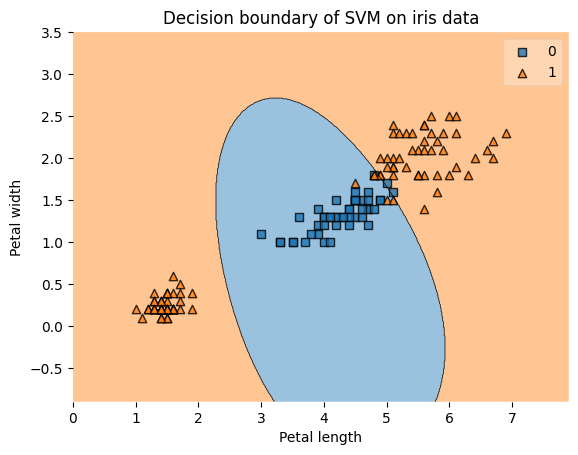

In [ ]:

from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(Y).ravel()
plot_decision_regions(features,target,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Decision boundary of SVM on iris data')

In [ ]:

# encoding the species column
iris_data.loc[iris_data.Species=="setosa","Species"] = 0
iris_data.loc[iris_data.Species=="versicolor","Species"] = 1
iris_data.loc[iris_data.Species=="virginica","Species"] = 2

#data type (dtype) of the column will be converted to 'category'
iris_data.Species = iris_data.Species.astype("category")

#https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
iris_data.head()

####Multiclass Model Building using SVM

In [ ]:

X = iris_data[["Petal.Length","Petal.Width"]]
Y = iris_data["Species"]
model = SVC()
model.fit(X,Y)

SVC()

####VIZUALISATION OF MODEL DECISION BOUNDARY

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Multiclass classification on iris using SVM')

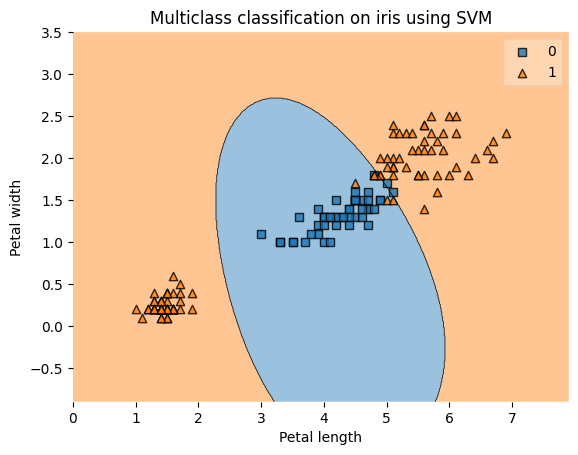

In [ ]:
from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(Y)
plot_decision_regions(features,target,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Multiclass classification on iris using SVM')

#6. CROSS VALIDATION & ENSAMBLE METHODS

####Tuning model hyper parameters using cross-validation

####Implementing cross validation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:

#read data from input csv file
defaulter = pd.read_csv("/content/sample_data/default.csv")

In [ ]:
defaulter.head()

default student      balance       income  norm_balance  norm_income
0      No      No   729.526495  44361.62507      0.274845     0.598905
1      No     Yes   817.180407  12106.13470      0.307868     0.155727
2      No      No  1073.549164  31767.13895      0.404453     0.425862
3      No      No   529.250605  35704.49394      0.199392     0.479959
4      No      No   785.655883  38463.49588      0.295991     0.517867

####Feature Engineering

In [ ]:
#### Normalizing the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_scale = ["balance","income"]
scaled_values = scaler.fit_transform(defaulter[features_to_scale])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]

####Splitting the data into train and test set

In [ ]:

from sklearn.model_selection import train_test_split
X=defaulter[["norm_balance","norm_income"]]
Y=defaulter["default"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

####Finding best value of k for KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn = KNeighborsClassifier()

#create a dictionary of all k neighbor values
param_grid = {'n_neighbors': np.arange(1, 15,2)}

'''using GridSearchCV to perform k-fold validation'''
knn_gscv = GridSearchCV(knn, param_grid, return_train_score=True, verbose=1, scoring='accuracy')

#fit model to data
knn_gscv.fit(X_train,Y_train)

#storing results to dataframe
#print(knn_gscv.cv_results_)
df=pd.DataFrame(knn_gscv.cv_results_)

#filtering out columns
df=df[['param_n_neighbors','mean_train_score','mean_test_score']]
df

Fitting 5 folds for each of 7 candidates, totalling 35 fits


param_n_neighbors  mean_train_score  mean_test_score
0                  1          1.000000         0.955500
1                  3          0.977781         0.967500
2                  5          0.975438         0.970625
3                  7          0.974562         0.971375
4                  9          0.974781         0.972125
5                 11          0.974437         0.972500
6                 13          0.974187         0.972625

####Here we observe that, for param_n_neighbors = 9, you will get good performance on test and train data. So choose 9 as best value for k.

In [ ]:

model = KNeighborsClassifier(n_neighbors = 9, metric="euclidean")
model.fit(X_train,Y_train)

train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print("Train Accuracy:",train_accuracy)
print("Test Accuracy:",test_accuracy)

#output
#0.971 0.9685

Train Accuracy: 0.974625
Test Accuracy: 0.9725


##7.Ensemble methods

In [ ]:
%%html
<style>
div.warn {
    color: #956C99;
    background-color: #A4EAF7;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class=warn>
<b>BAGGING & BOOSTING</b>
</div>

####Random forest is a special type of bagging algorithm which uses decision trees as base models. It creates random subsets of the training dataset to create a collection of trees. While building a tree, it also randomly samples the feature variables at each split.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:

#reading input data from csv file
spam_data = pd.read_csv("/content/sample_data/spambase.csv")
spam_data.head(5).T

0         1         2        3        4
word_freq_make                0.000     0.210     0.060    0.000    0.000
word_freq_address             0.640     0.280     0.000    0.000    0.000
word_freq_all                 0.640     0.500     0.710    0.000    0.000
word_freq_3d                  0.000     0.000     0.000    0.000    0.000
word_req_our                  0.320     0.140     1.230    0.630    0.630
word_freq_over                0.000     0.280     0.190    0.000    0.000
word_freq_remove              0.000     0.210     0.190    0.310    0.310
word_freq_internet            0.000     0.070     0.120    0.630    0.630
word_freq_order               0.000     0.000     0.640    0.310    0.310
word_freq_mail                0.000     0.940     0.250    0.630    0.630
word_freq_receive             0.000     0.210     0.380    0.310    0.310
word_freq_will                0.640     0.790     0.450    0.310    0.310
word_freq_people              0.000     0.650     0.120    0.310    0.310
word_freq_report              0.000     0.210     0.000    0.000    0.000
word_freq_addresses           0.000     0.140     1.750    0.000    0.000
word_freq_free                0.320     0.140     0.060    0.310    0.310
word_freq_business            0.000     0.070     0.060    0.000    0.000
word_freq_email               1.290     0.280     1.030    0.000    0.000
word_freq_you                 1.930     3.470     1.360    3.180    3.180
word_freq_credit              0.000     0.000     0.320    0.000    0.000
word_freq_your                0.960     1.590     0.510    0.310    0.310
word_freq_font                0.000     0.000     0.000    0.000    0.000
word_freq_000                 0.000     0.430     1.160    0.000    0.000
word_freq_money               0.000     0.430     0.060    0.000    0.000
word_freq_hp                  0.000     0.000     0.000    0.000    0.000
word_freq_hpl                 0.000     0.000     0.000    0.000    0.000
word_freq_george              0.000     0.000     0.000    0.000    0.000
word_freq_650                 0.000     0.000     0.000    0.000    0.000
word_freq_lab                 0.000     0.000     0.000    0.000    0.000
word_freq_labs                0.000     0.000     0.000    0.000    0.000
word_freq_telnet              0.000     0.000     0.000    0.000    0.000
word_freq_857                 0.000     0.000     0.000    0.000    0.000
word_freq_data                0.000     0.000     0.000    0.000    0.000
word_freq_415                 0.000     0.000     0.000    0.000    0.000
word_freq_85                  0.000     0.000     0.000    0.000    0.000
word_freq_technology          0.000     0.000     0.000    0.000    0.000
word_freq_1999                0.000     0.070     0.000    0.000    0.000
word_freq_parts               0.000     0.000     0.000    0.000    0.000
word_freq_pm                  0.000     0.000     0.000    0.000    0.000
word_freq_direct              0.000     0.000     0.060    0.000    0.000
word_freq_cs                  0.000     0.000     0.000    0.000    0.000
word_freq_meeting             0.000     0.000     0.000    0.000    0.000
word_freq_original            0.000     0.000     0.120    0.000    0.000
word_freq_project             0.000     0.000     0.000    0.000    0.000
word_freq_re                  0.000     0.000     0.060    0.000    0.000
word_freq_edu                 0.000     0.000     0.060    0.000    0.000
word_freq_table               0.000     0.000     0.000    0.000    0.000
word_freq_conference          0.000     0.000     0.000    0.000    0.000
char_freq_;                   0.000     0.000     0.010    0.000    0.000
char_freq_(                   0.000     0.132     0.143    0.137    0.135
char_freq_[                   0.000     0.000     0.000    0.000    0.000
char_freq_!                   0.778     0.372     0.276    0.137    0.135
char_freq_$                   0.000     0.180     0.184    0.000    0.000
char_freq_#                   0.000   

In [ ]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_req_our                4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

####Splitting the data into train and test set

In [ ]:

from sklearn.model_selection import train_test_split
features = spam_data.columns.drop('spam')
target = "spam"
X=spam_data[features]
Y=spam_data[target]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3680, 57) (3680,)
(921, 57) (921,)


####Model Building

In [ ]:

from sklearn.ensemble import RandomForestClassifier
# building model with RandomforestClassifier with 10 underlying Decision tree models/ estimators
model = RandomForestClassifier(n_estimators=10,
                               min_samples_split=20,
                               min_impurity_decrease=0.05)
model.fit(X_train,Y_train)

# Evaluate the model performance
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)

print(train_accuracy)
print(test_accuracy)
#output
#0.8633152173913043
#0.8577633007600435

0.8282608695652174
0.8414766558089034


####Reviewing the feature imporatance

In [ ]:

feature_imps = pd.DataFrame(np.array([features,
                                      model.feature_importances_]).T,
                            columns=["feature","importance"])
Feat_imp=feature_imps.sort_values(by="importance",ascending=False)
Feat_imp

feature importance
52                 char_freq_$   0.466671
51                 char_freq_!   0.169342
23             word_freq_money   0.111111
4                 word_req_our   0.064825
54  capital_run_length_average   0.063807
10           word_freq_receive   0.047304
24                word_freq_hp   0.046286
6             word_freq_remove   0.030655
0               word_freq_make        0.0
37             word_freq_parts        0.0
39            word_freq_direct        0.0
38                word_freq_pm        0.0
35        word_freq_technology        0.0
36              word_freq_1999        0.0
41           word_freq_meeting        0.0
34                word_freq_85        0.0
33               word_freq_415        0.0
40                word_freq_cs        0.0
45               word_freq_edu        0.0
42          word_freq_original        0.0
43           word_freq_project        0.0
44                word_freq_re        0.0
31               word_freq_857        0.0
46             word_freq_table        0.0
47        word_freq_conference        0.0
48                 char_freq_;        0.0
49                 char_freq_(        0.0
50                 char_freq_[        0.0
53                 char_freq_#        0.0
55  capital_run_length_longest        0.0
32              word_freq_data        0.0
28               word_freq_lab        0.0
30            word_freq_telnet        0.0
15              word_freq_free        0.0
2                word_freq_all        0.0
3                 word_freq_3d        0.0
5               word_freq_over        0.0
7           word_freq_internet        0.0
8              word_freq_order        0.0
9               word_freq_mail        0.0
11              word_freq_will        0.0
12            word_freq_people        0.0
13            word_freq_report        0.0
14         word_freq_addresses        0.0
16          word_freq_business        0.0
29              word_freq_labs        0.0
17             word_freq_email        0.0
18               word_freq_you        0.0
19            word_freq_credit        0.0
20              word_freq_your        0.0
21              word_freq_font        0.0
22               word_freq_000        0.0
25               word_freq_hpl        0.0
26            word_freq_george        0.0
27               word_freq_650        0.0
1            word_freq_address        0.0
56    capital_run_length_total        0.0

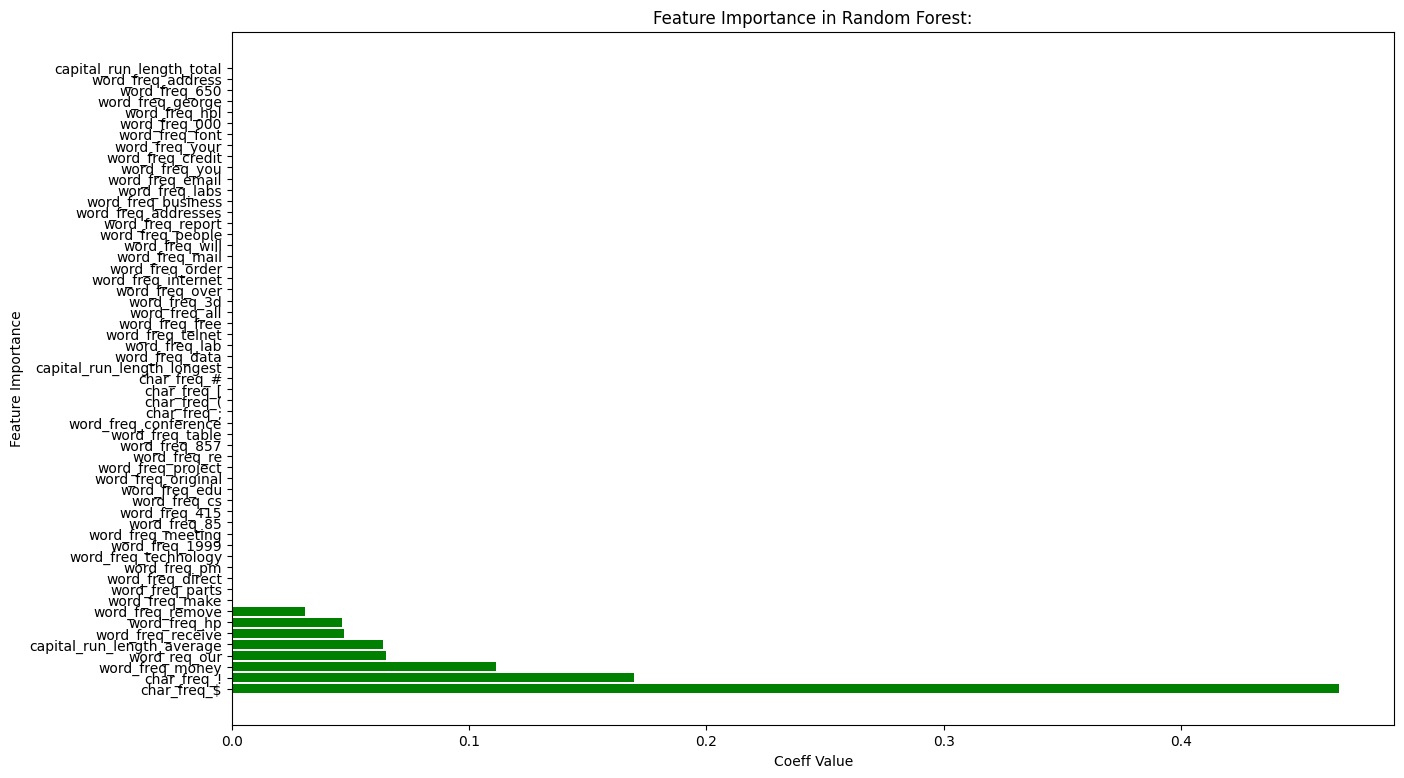

In [ ]:
plt.figure(figsize=(15,9))
plt.barh(Feat_imp['feature'],
         Feat_imp['importance'],
         color='green')
plt.xlabel('Coeff Value')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest:')
#plt.gca().invert_yaxis()
plt.show()

####The above plot shows top9 features that are most important, arranged in the order of importance.

###BOOSTING

####Boosting is another ensemble learning technique where the models are built sequentially

###This is done by assigning the same weight to each training sample at the beginning. The samples which get incorrectly labelled by a model are given more weight while building the subsequent model. Output of a boosted model is the weighted sum of the predictions made by the individual models

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#building AdaBoostClassifier with 10 models, also called as estimators.
model = AdaBoostClassifier(n_estimators=10)
model.fit(X_train,Y_train)

# Evaluating the model performance
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)

#output
#0.9195652173913044 0.9272529858849077

0.9067934782608695 0.9131378935939196


In [ ]:

feature_imps = pd.DataFrame(np.array([features,
                                      model.feature_importances_]).T,
                            columns=["feature","importance"])
feature_imps.sort_values(by="importance",ascending=False)

feature importance
52                 char_freq_$   0.181293
51                 char_freq_!   0.154507
24                word_freq_hp   0.123299
6             word_freq_remove   0.119936
15              word_freq_free   0.109165
36              word_freq_1999   0.101538
26            word_freq_george    0.09101
55  capital_run_length_longest   0.078189
45               word_freq_edu   0.041064
34                word_freq_85        0.0
41           word_freq_meeting        0.0
35        word_freq_technology        0.0
33               word_freq_415        0.0
37             word_freq_parts        0.0
38                word_freq_pm        0.0
39            word_freq_direct        0.0
40                word_freq_cs        0.0
0               word_freq_make        0.0
42          word_freq_original        0.0
43           word_freq_project        0.0
31               word_freq_857        0.0
44                word_freq_re        0.0
46             word_freq_table        0.0
47        word_freq_conference        0.0
48                 char_freq_;        0.0
49                 char_freq_(        0.0
50                 char_freq_[        0.0
53                 char_freq_#        0.0
54  capital_run_length_average        0.0
32              word_freq_data        0.0
28               word_freq_lab        0.0
30            word_freq_telnet        0.0
29              word_freq_labs        0.0
2                word_freq_all        0.0
3                 word_freq_3d        0.0
4                 word_req_our        0.0
5               word_freq_over        0.0
7           word_freq_internet        0.0
8              word_freq_order        0.0
9               word_freq_mail        0.0
10           word_freq_receive        0.0
11              word_freq_will        0.0
12            word_freq_people        0.0
13            word_freq_report        0.0
14         word_freq_addresses        0.0
16          word_freq_business        0.0
17             word_freq_email        0.0
18               word_freq_you        0.0
19            word_freq_credit        0.0
20              word_freq_your        0.0
21              word_freq_font        0.0
22               word_freq_000        0.0
23             word_freq_money        0.0
25               word_freq_hpl        0.0
27               word_freq_650        0.0
1            word_freq_address        0.0
56    capital_run_length_total        0.0

#Exercise
For the Banknote Authentication dataset available in UCI Machine Learning Repository, build models based on Random Forest Classifier and Adaptive Boosting Classifier, to predict whether a banknote will be classified as class 0 (i.e. fake) or class 1 (i.e. genuine) . Compare the performance of the models with the decision  tree model and the logistic regression model built as part of earlier exercises in the course.
Click here to download the data.

#8.Clustering Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

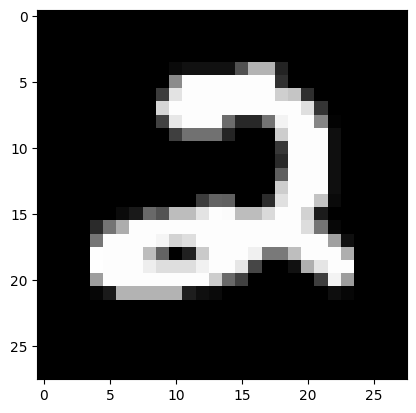

In [ ]:

# Load the data from the file
mnist_data = pd.read_csv("/content/sample_data/mnist_data.csv")
# Plotting the first image in the data
im = np.asarray(mnist_data.iloc[0:1,:]).reshape(28,28)
plt.imshow(im,cmap=plt.cm.gray)

In [ ]:
mnist_data.head(2)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  

[2 rows x 784 columns]

####Now let us employ clustering to group similar-looking data points (digits). The aim of clustering is to group similar records together and make sure that the members of different groups are significantly different from each other.
Clustering can be performed using several algorithms and one of the widely used clustering algorithms is the K-means algorithm. The K-means algorithm works on numerical data and uses Euclidean distance to identify which data points are close to one another.

In [ ]:

from sklearn.cluster import KMeans

# building K-Means model with 10 clusters
model = KMeans(n_clusters=10)
model.fit(mnist_data)

# Take a look at the cluster labels that are generated
# Note that these cluster labels do not indicate the digit in the images
print(np.unique(model.labels_))

#output
#[0 1 2 3 4 5 6 7 8 9]

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
np.unique(model.labels_).shape

(10,)

###Exploring the clusters generated by the model:

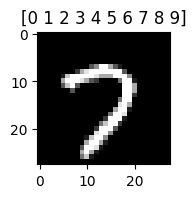

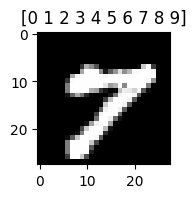

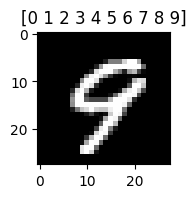

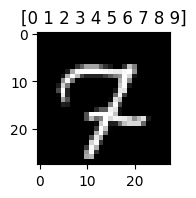

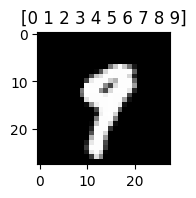

In [ ]:

# Explore images in cluster 1
# cluster1 variable holds the data that has been grouped into the first cluster
cluster1 = mnist_data[model.labels_==2]

# Pick 5 random images from cluster 1
cluster1_imgs = cluster1.iloc[[np.random.randint(0,cluster1.shape[0]) for i in range(0,5)]]

# Plot the images in cluster 1
for i in range(0,cluster1_imgs.shape[0]):
    plt.figure(figsize=(10,10))
    plt.subplot(5,1,i+1)
    img_fig = np.asarray(cluster1_imgs[i:i+1]).reshape(28,28)
    plt.imshow(img_fig,cmap=plt.cm.gray)
    plt.title(np.unique(model.labels_))

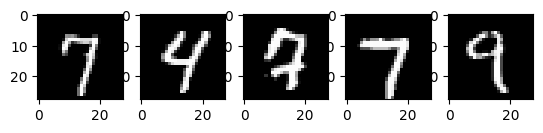

In [ ]:

# Explore images in cluster 2
cluster2 = mnist_data[model.labels_==1]
cluster2_imgs = cluster2.iloc[[np.random.randint(0,cluster2.shape[0]) for i in range(0,5)]]

for i in range(0,cluster2_imgs.shape[0]):
    plt.subplot(1,5,i+1)
    img_fig = np.asarray(cluster2_imgs[i:i+1]).reshape(28,28)
    plt.imshow(img_fig,cmap=plt.cm.gray)

####Real Life Examples of Clustering

###Clustering based on Topics
Documents such as white papers, research papers, reports etc. are published in great quantities and there is a need to cluster and visualize them based on topics.

Information Retrieval Clustering

can be used to group websites or documents based on the contents. Suppose if there is a hit on a website or document then other websites or documents in that cluster are also likely to be relevant.

Anomaly Detection

The aim of anomaly detection is to find objects that are significantly different from the rest. This is useful in detecting fraudulent transactions in finance and banking, intrusion detection, etc.

#9.Neural Networks

#####Even with the advancements of technology and algorithms, there is still no match to the capabilities of the human brain which hasn't been fully understood yet.

#####These cells are connected to one another to form a complex network structure known as “Neural Network”.

#####The study of artificial neural network (ANN) is inspired by attempts to simulate the biological neural system. ANN consists of interconnected artificial neurons or nodes, analogous to human/biological neuron network. Just like a biological neuron receives an input signal, processes it and transmits the output to other neurons, in ANN, a node receives the input, processes it using a function known as activation function and transmits the output to other nodes.

#####ANN

#####Components of ANN



1.Artificial Neurons/Nodes

2.Layers

3.Weights & Biases

4.Activation Function

##Black Box Example -  Diabetic prediction

##
Learning Weights and Biases

Weights and biases are parameters that are learned (or adjusted) to produce the desired outputs from the given inputs. Mathematical techniques like stochastic Gradient Descent, Adam etc. are used to search for the optimal set of weights that will make the model accurate in its prediction.

#
Activation Function

An activation function (also known as transfer function) is a non-linear mathematical function which converts input values to an output. It helps neural networks find non-linear relations in data.

#Commonly used Activation functions:

*Sigmoid

*Tanh

*ReLU

*Softmax

##The process of Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Train data contains digit data and the correct labels
# Test data contains just the digit data and no labels
mnist_train = pd.read_csv("/content/sample_data/train.csv")
mnist_test = pd.read_csv("/content/sample_data/test.csv")

In [ ]:
mnist_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
mnist_train.head(2)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  

[2 rows x 785 columns]

In [ ]:
mnist_test.head(2)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  

[2 rows x 784 columns]

Text(0.5, 1.0, 'First digit in test data ')

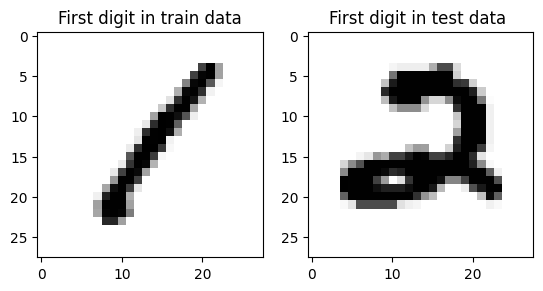

In [ ]:

# Train data contains digit data and the correct labels
# Test data contains just the digit data and no labels
#mnist_train = pd.read_csv("datasets/mnist/train.csv")
#mnist_test = pd.read_csv("datasets/mnist/test.csv")

# Let's visualize the image represented by the first rows of the train data and the test data
train_data_digit1 = np.asarray(mnist_train.iloc[0:1,1:]).reshape(28,28)
test_data_digit1 = np.asarray(mnist_test.iloc[0:1,]).reshape(28,28)

plt.subplot(1,2,1)
plt.imshow(train_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in train data")
plt.subplot(1,2,2)
plt.imshow(test_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in test data ")

###Feature Engineering

In [ ]:

"""Let us now assign the label column value to a new variable Y_train
and the remaining column values to X_train"""
X_train = mnist_train.iloc[:,1:]
Y_train = mnist_train.iloc[:,0:1]

###Building an Artificial Neural Network

#####Change the processor to GPU or TPU for quick processing

In [ ]:

from sklearn.neural_network import MLPClassifier

# Let us now create a neural network model to learn from train data
# We shall build a single hidden layer with 50 nodes.
nn_model = MLPClassifier(hidden_layer_sizes=(50))

# The fit method initiates the learning process.
#When its execution completes, the model is learnt
nn_model.fit(X_train,mnist_train.iloc[:,0])

# Now that we have a model,
#lets get it to predict the value of
#the first digit in the test data
print(nn_model.predict(mnist_test.iloc[0:1,]))

# output
# [2]

[2]


In [ ]:
predicted_digit=nn_model.predict(mnist_test)#.iloc[0:1,])

##Evaluate model performance

In [ ]:

#lfrom sklearn.metrics import classification_report
# report based on tain data
print(classification_report(Y_train,predicted_digit))

In [ ]:

import tensorflow as tf

print("TensorFlow version:", tf.__version__)
gpu_device_name = tf.test.gpu_device_name()

if gpu_device_name:
   print("GPU device name:", gpu_device_name)
else:
   print("No GPU found.")

TensorFlow version: 2.18.0
No GPU found.


#CAPSTONE PROJECT

##PYTHON FOR DATA SCIENCE

####Problem Statement-1

In [ ]:
# Input
lst = [5, 10, 0, 200]
# Expected Output:
# [10, 15, 5, 205]
lst

[5, 10, 0, 200]

In [ ]:


lst = [5, 10, 0, 200]
import numpy as np
arr = np.array(lst)
print(arr + 5)
# Output:
# [10, 15, 5, 205]

[ 10  15   5 205]


####Problem Statement-2

In [ ]:

# Input
lst = [1, 2, 3, 'text', True, 3+2j]
# Expected output:
# A pure homogeneous vector, all 6 elements converted into a single datatype.
lst

[1, 2, 3, 'text', True, (3+2j)]

In [ ]:


lst = [1, 2, 3, 'text', True, 3+2j]
import numpy as np
arr = np.array(lst)
print(type(arr[0]),type(arr[4]), type(arr[5]))
# Output:
# <class 'numpy.str_'> <class 'numpy.str_'> <class 'numpy.str_'>

<class 'numpy.str_'> <class 'numpy.str_'> <class 'numpy.str_'>


####Problem Statement-3

In [ ]:
import sys
 # Input
lst = [56, 45, 12, 6]
# Expected output:
# 16
sys.getsizeof(lst)

88

In [ ]:

lst = [56, 45, 12, 6]
import numpy as np
arr = np.array(lst)
print(arr.nbytes)
# Output:
# 16

32


#####NumPy object creation

In [ ]:


arr = np.array([2,5,6,8], dtype = 'int32')
print(arr)
# [2 5 6 8]
print(type(arr))
# class 'numpy.ndarray'
print(np.result_type(arr))
# int32

[2 5 6 8]
<class 'numpy.ndarray'>
int32


#####arange & linspace

In [ ]:


''' Creation of an array with step size 1.33 between 0 - 10 '''
print(np.arange(0, 10, 1.33, dtype = np.float64))
# [ 0.    1.33  2.66  3.99  5.32  6.65  7.98  9.31]
# arange() gives uncertain number of values based on steps
# Hence, we use linspace, which asks for total number of values
''' Creation of an array with total 5 values between 0 - 160 '''
print(np.linspace(0, 160, 5, dtype = np.float64))
# [   0.   40.   80.  120.  160.]

[0.   1.33 2.66 3.99 5.32 6.65 7.98 9.31]
[  0.  40.  80. 120. 160.]


Matrix Creation

Method I: Use NumPy array to form a matrix
Method II: Use NumPy's inbuilt matrix function
Method III: Use miscellaneous functions such as ones(), zeroes(), etc.

In [ ]:

''' Method I: Using array and reshape to convert array into matrix '''
print(np.array([5,6,8,45,12,52]).reshape(2,3))
# [[ 5  6  8]
#  [45 12 52]]
''' Method II: Using matrix function '''
print(np.matrix([[1,2],
                [3,4]]))
# [[1 2]
#  [3 4]]
''' Method III: Using misc. functions '''
print(np.eye(3)) # Identity matrix
# [[ 1.  0.  0.]
#  [ 0.  1.  0.]
#  [ 0.  0.  1.]]
print( np.zeros( (4,3) ) )
# [[ 0.  0.  0.]
#  [ 0.  0.  0.]
#  [ 0.  0.  0.]
#  [ 0.  0.  0.]]
print(np.ones( (3,3), dtype = np.float64 ))
# [[ 1.  1.  1.]
#  [ 1.  1.  1.]
#  [ 1.  1.  1.]]

[[ 5  6  8]
 [45 12 52]]
[[1 2]
 [3 4]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


#####Exercise    
-
Problem Statement:

In [ ]:
#import sys
arr1=np.array([25, 56, 12, 85, 34, 75 ])
arr2=np.array([42, 3, 86, 32, 856, 46])
print(arr1,'\n', type(arr1), '\n', sys.getsizeof(arr1))
print(arr1,'\n', type(arr1), '\n', sys.getsizeof(arr1))

[25 56 12 85 34 75] 
 <class 'numpy.ndarray'> 
 160
[25 56 12 85 34 75] 
 <class 'numpy.ndarray'> 
 160


In [ ]:
#Create a new NumPy array Narr
#with the shape equal to arr1
#filled with random values.

Narr = np.random.rand(6)
#Narr=np.array(Narr)
print(Narr,'\n', type(Narr))

[0.12868408 0.13552465 0.7552487  0.44073087 0.38805698 0.65006384] 
 <class 'numpy.ndarray'>


#####Permanently change the dtype of arr1 to complex.

In [ ]:
arr1=arr1.astype('complex')
arr2=arr2.astype('complex')

In [ ]:
arr1=arr1.reshape(2,3)
arr2=arr2.reshape(2,3)

In [ ]:
(arr1**2-arr2**2)/(arr1-arr2)

array([[ 67.-0.j,  59.+0.j,  98.-0.j],
       [117.+0.j, 890.-0.j, 121.+0.j]])

In [ ]:
#ANSWERS
#Hint: Use np.random.rand()

#Hint: Use astype().
#Answer:
#[ 25.+0.j 56.+0.j 12.+0.j 85.+0.j 34.+0.j 75.+0.j]

#Hint: Use a2 - b2 property.
#Answer:
#[[ #67.+0.j 59.+0.j 98.+0.j]
#[ 117.+0.j #890.+0.j 121.+0.j]]

####Vectorized operations

In [ ]:


S_X = np.array([[2, 5, 6, 5],
               [4, 8, 6, 5]])
print(S_X)
# [[2 5 6 5]
#  [4 8 6 5]]
S_Y = np.array([[6, 7, 5, 9],
               [7, 5, 6, 4]])
print(S_Y)
# [[6 7 5 9]
#  [7 5 6 4]]

[[2 5 6 5]
 [4 8 6 5]]
[[6 7 5 9]
 [7 5 6 4]]


In [ ]:

#Quarterly difference between each state's literacy rate per year
print(S_Y - S_X)
# [[ 4  2 -1  4]
#  [ 3 -3  0 -1]]

[[ 4  2 -1  4]
 [ 3 -3  0 -1]]


In [ ]:
#Quarters having a literacy rate less than 2.
''' Method 1 '''
print(S_X < 2)
# [[False False False False]
#  [False False False False]]
''' Method 2 '''
print()
twos_mat = np.ones((2, 4)) * 2
print(np.less(S_Y, twos_mat))
# [[False False False False]
#  [False False False False]]

[[False False False False]
 [False False False False]]

[[False False False False]
 [False False False False]]


#####Find out the cumulative sum of literacy rates by the end of every quarter each year. Find out the quarters for which this sum is greater or equal to 8.

In [ ]:
S_Xcs=np.cumsum(S_X)
S_Xcs

array([ 2,  7, 13, 18, 22, 30, 36, 41])

In [ ]:
print(S_Xcs>=8)

[False False  True  True  True  True  True  True]


In [ ]:
S_Ycs=np.cumsum(S_Y)
S_Ycs

array([ 6, 13, 18, 27, 34, 39, 45, 49])

In [ ]:
print(S_Ycs>=8)

[False  True  True  True  True  True  True  True]


######Mean of each year's literacy rate of    State X and mean of each quarterly's literacy rate State Y.

In [ ]:
mean_X=np.mean(S_X)
mean_Y=np.mean(S_Y)
print(mean_X)
print(mean_Y)

5.125
6.125


###Exercise Problem Statement

###Solve the following:

1.Create a 4 x 4 matrix and add values 4,5,6 above the parent diagonal.   
___
2.Given a Numpy array arr = np.arange(11), negate all the elements between 6 and 10.      
___
3.Given a matrix mat and an array arr, for each row of the matrix if elements of Column 1 are equal to the corresponding element of the array, then print the corresponding value of Column 2 of the matrix.

In [ ]:
mat44=np.matrix([[1,4,0,0],[0,1,5,0],[0,0,1,6],[0,0,0,1]])
mat44

matrix([[1, 4, 0, 0],
        [0, 1, 5, 0],
        [0, 0, 1, 6],
        [0, 0, 0, 1]])

In [ ]:

#2.Given a Numpy array arr = np.arange(11),
#negate all the elements between 6 and 10.

Numarr=np.arange(11)

for i in range(len(Numarr)):
    if (Numarr[i]>6) & (Numarr[i]<10):
       Numarr[i]=-Numarr[i]


print(Numarr)

[ 0  1  2  3  4  5  6 -7 -8 -9 10]


In [ ]:

#3.Given a matrix mat and an array arr, for each row of the matrix if elements of Column 1 are equal to the corresponding element of the array, then print the corresponding value of Column 2 of the matrix.

import numpy as np
mat = np.array([['abc','A'],['def','B'],['ghi','C'],['jkl','D']])
arr = np.array(['abc','dfe','ghi','kjl'])

lst1=[]
for i in range(len(arr)):
    #print('*'*i)
    if mat[i][0]==arr[i]:
       lst1.append(mat[i][1])
       #mat[i][0]
       #print(mat[i][1], end=',')
print(lst1)

[np.str_('A'), np.str_('C')]


#####Given a matrix mat, sort it by the second column.

In [ ]:
import numpy as np
mat = np.array([[1,21,3],
                [5,4,2],
                [56,12,4]])
print(mat)
print('*'*15)
column_to_sort=1
sort_indices= np.argsort(mat[:,column_to_sort])
print(sort_indices)
sorted_mat= mat[sort_indices]
print('*'*15)
print(sorted_mat)
print('*'*15)
print(np.sort(mat))

[[ 1 21  3]
 [ 5  4  2]
 [56 12  4]]
***************
[1 2 0]
***************
[[ 5  4  2]
 [56 12  4]
 [ 1 21  3]]
***************
[[ 1  3 21]
 [ 2  4  5]
 [ 4 12 56]]


#####Given an array arr, find the top 4 maximum values. np.argpartition, np.sort, np.argsort

In [ ]:

import numpy as np
arr = np.array([90, 14, 24, 13, 13, 590, 0, 45, 16, 50])
index_arr1=np.argpartition(arr,6)
#index_arr2=np.argpartition(arr,3)
print(index_arr1)
#print(index_arr2)
print(arr)
print(arr[index_arr1])
n=len(index_arr1)
print('*'*35)
for i in arr[index_arr1[n-4:n]]:
    print(i)

[6 3 4 1 8 2 7 9 0 5]
[ 90  14  24  13  13 590   0  45  16  50]
[  0  13  13  14  16  24  45  50  90 590]
***********************************
45
50
90
590


#####Find the nearest number from the given number in an array.

In [ ]:

arr = np.array([10,55,22,3,6,44,9,54])
value=50
#nearest_to = 50

array = np.asarray(arr)
idx = (np.abs(arr - value)).argmin()
print(array[idx])

# Example usage
#arr = np.array([3, 12, 34, 51, 62, 88, 90])
#val = 48

54


##tril_indices()
##mask_indices()
##diag_indices()

#Poblem
N1 to the upper half elements of mat

N2 to the main diagonal elements of mat

N3 to the lower half elements of mat

##Answer/Hint:
[[30 15 19]

[32 40 16]

[38 33 50]]

 Hint: Use tril_indices(), mask_indices(), diag_indices()

##tril_indices(n, k=0, m=None)
#####This function returns the indices for the lower triangle of an (n, m) array.
n: The number of rows in the array.

k: The diagonal offset. k = 0 is the main diagonal, k > 0 is above, and k < 0 is below.

m: The number of columns in the array. If None, defaults to n (square array).

In [ ]:
import numpy as np
mat = np.array([[10,5,9],
                [2,20,6],
                [8,3,30]]).reshape(3,3)
display(mat)
print(mat)

array([[10,  5,  9],
       [ 2, 20,  6],
       [ 8,  3, 30]])

[[10  5  9]
 [ 2 20  6]
 [ 8  3 30]]


#diag_indices(n, ndim=2)

This function returns the indices for the main diagonal of an (n, n) array.

*   n: The size of the array.
*   ndim: (Optional) The number of dimensions. Default is 2.

In [ ]:
import numpy as np

#row_indices, col_indices = np.tril_indices(3)
ui = np.triu_indices(3, k=1)
li = np.tril_indices(3, k=-1)
di = np.diag_indices(3)#<----Diagonal Indices of a Matrix
print("Upper Triangular Indices of a 3by3 Matrix:", '\n', ui)
print()
print("Lower Triangular Indices of a 3by3 Matrix", '\n',   li)
print()
print("Diagonal Indices of a 3by3 Matrix",'\n',  di)
print()


#Max element from the First row of a matrix
r1 =  (lambda i:mat[0])
first_row=r1(mat)
N1=max(first_row)
print("Maximum element First row N1:=",N1)

#Max element from the Second row of a matrix
r2 =  (lambda i:mat[1])
second_row=r2(mat)
N2=max(second_row)
print("Maximum element Second row N2:=",N2)

#Max element from the Third row of a matrix
r3 =  (lambda i:mat[2])
third_row=r3(mat)
N3=max(third_row)
print("Maximum element Third row N3:=",N3)

#mat[ui]=mat[ui]+N1
#a = np.arange(9).reshape(3, 3)
#a[np.tril_indices(3)] = 0

#print(mat[row_indices][col_indices]
#print(mat[ui].reshape(3,3))

Upper Triangular Indices of a 3by3 Matrix: 
 (array([0, 0, 1]), array([1, 2, 2]))

Lower Triangular Indices of a 3by3 Matrix 
 (array([1, 2, 2]), array([0, 0, 1]))

Diagonal Indices of a 3by3 Matrix 
 (array([0, 1, 2]), array([0, 1, 2]))

Maximum element First row N1:= 10
Maximum element Second row N2:= 20
Maximum element Third row N3:= 30


#mask_indices(n, mask_func, k=0)
This function returns the indices of an (n, n) array based on a masking function.

*   n: The size of the square array.
*   mask_func: A function that takes an array and an optional k argument and returns a boolean array (e.g., np.triu, np.tril).
*   k: (Optional) An argument passed to the mask_func.

In [ ]:
mat_ui=np.mask_indices(3, np.triu, k=1)
print(mat_ui)

mat_di=np.diag_indices(3)
print(mat_di)

mat_li=np.mask_indices(3, np.tril, k=-1)
print(mat_li)

(array([0, 0, 1]), array([1, 2, 2]))
(array([0, 1, 2]), array([0, 1, 2]))
(array([1, 2, 2]), array([0, 0, 1]))


In [ ]:
mat[mat_ui]

array([5, 9, 6])

In [ ]:
mat[mat_ui]=mat[mat_ui]+N1
mat[mat_ui]

array([15, 19, 16])

In [ ]:
mat[mat_di]

array([10, 20, 30])

In [ ]:
mat[mat_di]=mat[mat_di]+N2
mat[mat_di]

array([30, 40, 50])

In [ ]:
mat[mat_li]

array([2, 8, 3])

In [ ]:
mat[mat_li]=mat[mat_li]+N3
mat[mat_li]

array([32, 38, 33])

In [ ]:
mat

array([[30, 15, 19],
       [32, 40, 16],
       [38, 33, 50]])

####Numpy Quiz

In [ ]:
mat1 = np.matrix([[111, 1322],
                  [785, 554]])

#print(mat1.sum(axis = 01).shape)
print(mat1.sum(axis = 1).shape)

(2, 1)


In [ ]:
import numpy as np
arr = np.arange(9, dtype = "float").reshape(3,3)
print(arr)
ind1 = np.array([[1,2],[0,1]])
print(ind1)
ind2 = np.array([[0,2],[1,2]])
print(ind2)
print(arr[ind1, ind2].sum())

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[1 2]
 [0 1]]
[[0 2]
 [1 2]]
17.0


##Image as NumPy matrix

####1.Retrieve common attributes like shape, number of dimension(s), size, etc.

In [ ]:

import os.path
from skimage.io import imread
from skimage import data_dir
img = imread(os.path.join(data_dir, '/content/sample_data/checker_bilevel.png'))

In [ ]:
data_dir
img.shape

(10, 10)

In [ ]:


''' Image stored as numpy object (2D Matrix) '''
# <class 'numpy.ndarray'>
print(type(img))

''' Number of image dimensions '''
# 2
print(img.ndim)

''' Shape of the image (rows, columns) '''
# (10, 10)
print(img.shape)

''' Number of total elements in the image '''
# 100
print(img.size)

''' Size of per element (in bytes) '''
# 1
print(img.itemsize)

''' Size of complete image (in bytes) '''
# 100
print(img.nbytes)

<class 'numpy.ndarray'>
2
(10, 10)
100
1
100


####2.Deploy frequent methods like transpose, reshape, sort and compression.

In [ ]:


''' assuming you have read the image in variable img '''
# Transpose
img_t = img.T

# Reshape
img_reshape = img.reshape(5, 20)

# Sort
img_srt = img.copy()
img_srt.sort(axis = 0)

# Compression
img_cmp = img.copy()
img_cmp = img_cmp.compress([True,False,True,0,1,1,1,0,0,1],axis = 0)

print(img_cmp.shape)

(6, 10)


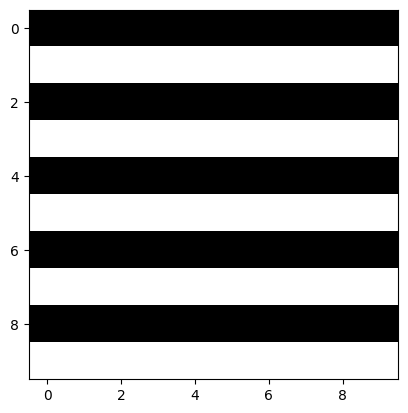

In [ ]:

import matplotlib.pyplot as plt

plt.imshow(img, cmap = 'Greys')

# Pass above used image names
# in place of 'img' to visualize

####Indexing--Slicing-- and--Selection

#####Cut an image slice (the rocket) out of the original image (the astronaut).

On the Red component of the rocket, all values falling in the range of [100, 150] must be equated to 0.

Fix the new rocket image back to its place in the original image.

In [ ]:
'''/content/sample_data/astronaut.png'''

'/content/sample_data/astronaut.png'

In [ ]:

import os.path
from skimage.io import imread
from skimage import data_dir
img = imread(os.path.join(data_dir, '/content/sample_data/astronaut.png'))

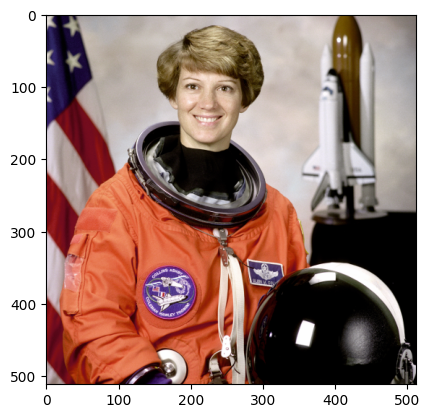

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)

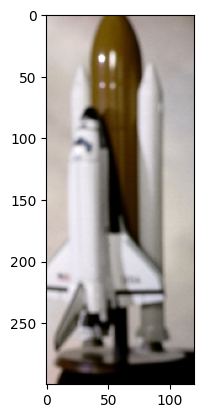

In [ ]:

img_slice = img.copy()
img_slice = img_slice[0:300,360:480]
plt.figure()
plt.imshow(img_slice)

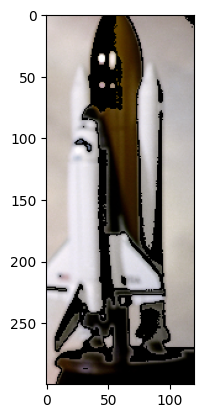

In [ ]:

img_slice[np.greater_equal(img_slice[:,:,0],100) & np.less_equal(img_slice[:,:,0],150)] = 0
plt.figure()
plt.imshow(img_slice)

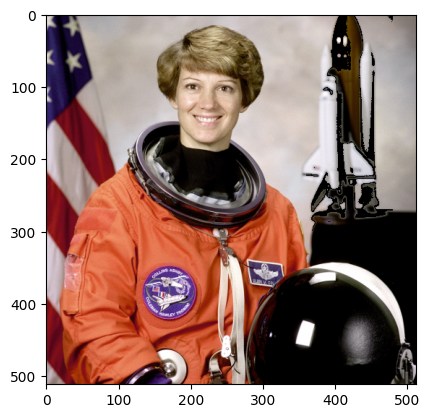

In [ ]:

img[0:300,360:480,:] = img_slice
plt.imshow(img)

##Exercise--Problem Statement:
Open the Phantom image available inbuilt under scikit-image module (or Click here to download the image) and do the following:--
Upload the image into python environment and show the image.
--
Perform black and white thresholding with decision boundary set at 0.15. Store the new image in a variable new_img and show it.
--
Use the numpy array manipulating function fliplr() to get the mirror image.
---
Compress the flipped image along both the axes by 50% in sequence.

###Hints/Answers:

2. Hint: Values less than or equal to .15 are set to 0 and others equal to 1.
4. Use the np.compress() method of numpy library along x-axis and then y-axis.

In [ ]:
import os.path
from skimage import data_dir
from skimage.io import imread
import numpy as np

In [ ]:
'''/content/sample_data/phantom.png'''

img=imread(os.path.join(data_dir, '/content/sample_data/phantom.png'))
img.shape

(400, 400, 3)

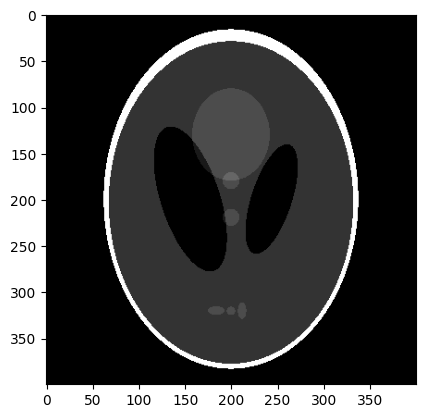

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

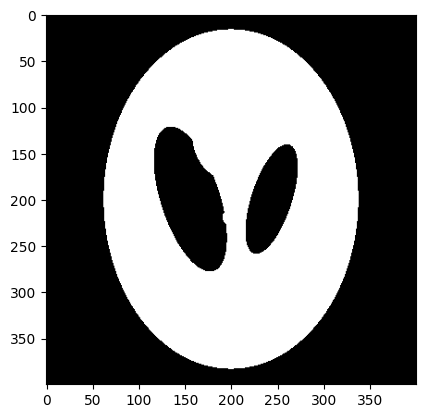

In [ ]:
new_img=img.copy()

threshold_value=0.15

mask = np.less_equal(new_img, threshold_value)

# Apply mask
new_img = np.where(mask, 0, 255)
#.astype(np.uint8)


# Display or save the image
plt.imshow(new_img, cmap='Greys')

In [ ]:
!python --version

Python 3.11.12


####Matplotlib is a python 2D plotting library providing features like plots, histograms, power spectra, bar charts, error charts, scatter plots, etc

In [ ]:

import pandas as pd
df = pd.read_csv('/content/sample_data/pokemon_alopez247.csv')

In [ ]:
!pip install scipy

In [ ]:

#from scipy.stats import itemfreq
# Retrieve a list of group types against the
# number of pokemon(s) belonging to that group
#type_1 = itemfreq(df.iloc[:,2])
type_1=np.unique(df.iloc[:,2])
print(type_1)
# Total number of distinct groups
type_1_grps = len(type_1)
print(type_1_grps)
# Names of group
type_1_names = type_1[0]
print(type_1_names)
# Pokemon count particular to each group
type_1_count = type_1[1]
print(type_1_count)

['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Steel'
 'Water']
18
Bug
Dark


In [ ]:
values, counts = np.unique(df['Type_1'], return_counts=True)
result = np.column_stack((values, counts))
print("Item frequency:\n", result)

Item frequency:
 [['Bug' 63]
 ['Dark' 28]
 ['Dragon' 24]
 ['Electric' 36]
 ['Fairy' 17]
 ['Fighting' 25]
 ['Fire' 47]
 ['Flying' 3]
 ['Ghost' 23]
 ['Grass' 66]
 ['Ground' 30]
 ['Ice' 23]
 ['Normal' 93]
 ['Poison' 28]
 ['Psychic' 47]
 ['Rock' 41]
 ['Steel' 22]
 ['Water' 105]]


In [ ]:
df

Number        Name   Type_1  Type_2  Total   HP  Attack  Defense  Sp_Atk  \
0         1   Bulbasaur    Grass  Poison    318   45      49       49      65   
1         2     Ivysaur    Grass  Poison    405   60      62       63      80   
2         3    Venusaur    Grass  Poison    525   80      82       83     100   
3         4  Charmander     Fire     NaN    309   39      52       43      60   
4         5  Charmeleon     Fire     NaN    405   58      64       58      80   
..      ...         ...      ...     ...    ...  ...     ...      ...     ...   
716     717     Yveltal     Dark  Flying    680  126     131       95     131   
717     718     Zygarde   Dragon  Ground    600  108     100      121      81   
718     719     Diancie     Rock   Fairy    600   50     100      150     100   
719     720       Hoopa  Psychic   Ghost    600   80     110       60     150   
720     721   Volcanion     Fire   Water    600   80     110      120     130   

     Sp_Def  ...   Color  hasGender  Pr_Male   Egg_Group_1  Egg_Group_2  \
0        65  ...   Green       True    0.875       Monster        Grass   
1        80  ...   Green       True    0.875       Monster        Grass   
2       100  ...   Green       True    0.875       Monster        Grass   
3        50  ...     Red       True    0.875       Monster       Dragon   
4        65  ...     Red       True    0.875       Monster       Dragon   
..      ...  ...     ...        ...      ...           ...          ...   
716      98  ...     Red      False      NaN  Undiscovered          NaN   
717      95  ...   Green      False      NaN  Undiscovered          NaN   
718     150  ...    Pink      False      NaN  Undiscovered          NaN   
719     130  ...  Purple      False      NaN  Undiscovered          NaN   
720      90  ...   Brown      False      NaN  Undiscovered          NaN   

     hasMegaEvolution Height_m Weight_kg  Catch_Rate       Body_Style  
0               False     0.71       6.9          45        quadruped  
1               False     0.99      13.0          45        quadruped  
2                True     2.01     100.0          45        quadruped  
3               False     0.61       8.5          45   bipedal_tailed  
4               False     1.09      19.0          45   bipedal_tailed  
..                ...      ...       ...         ...              ...  
716             False     5.79     203.0          45        two_wings  
717             False     5.00     305.0           3  serpentine_body  
718              True     0.71       8.8           3        head_arms  
719             False     0.51       9.0           3        head_only  
720             False     1.70     195.0           3        quadruped  

[721 rows x 23 columns]

In [ ]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=721, step=1)

#####Multiple Bar Plot

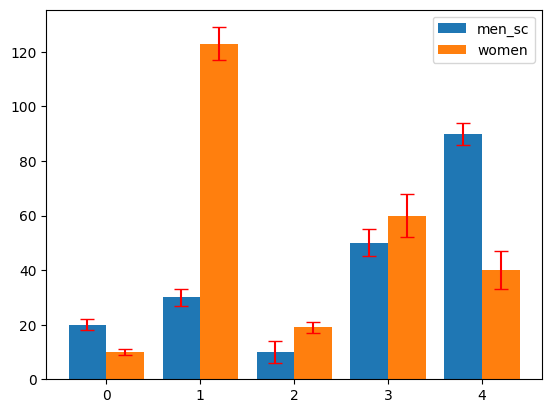

In [ ]:

n_grps = np.arange(5)
bar_width = 0.4
men_sc = [20, 30, 10, 50, 90]
err_men_sc = [2, 3, 4, 5, 4]
women = [10, 123, 19, 60, 40]
err_women_sc = [1, 6, 2, 8, 7]

error_kw = {'ecolor': 'red', 'capsize': 5}
plt.bar(n_grps-bar_width/2, men_sc, bar_width, yerr=err_men_sc, error_kw=error_kw, label='men_sc')
plt.bar(n_grps+bar_width/2, women, bar_width, yerr=err_women_sc, error_kw=error_kw, label='women')
#plt.bar(n_grps+(2*bar_width)/2, women, bar_width, yerr=err_women_sc, error_kw=error_kw, label='women')
plt.legend(loc='best')
plt.show()

####Advanced Bar Plot

(0.0, 130.0)

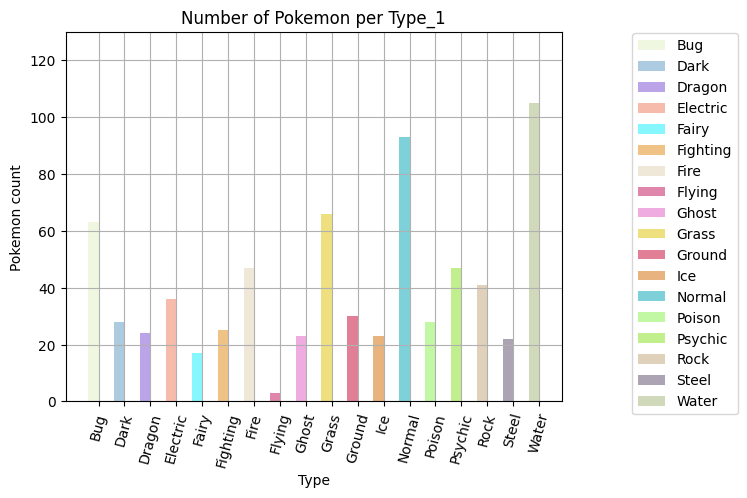

In [ ]:

'''
Advanced bar graph

Previously, we have seen how
to plot a simple bar graph with
some given groups. Now,
let us improve our graph by
adding some details like labels,
legend, and colors.

Adding distinct colors
'''


import random
import numpy as np
# Creating 18 random colors range (0 - 1)
clrs = np.linspace( 0, 1, 18 )
random.shuffle(clrs)
# Creating final list of 18 random colors
colors = []
for i in range(0, 72, 4):
    idx = np.arange( 0, 18, 1 )
    random.shuffle(idx)
    r = clrs[idx[0]]
    g = clrs[idx[1]]
    b = clrs[idx[2]]
    a = clrs[idx[3]]
    colors.append([r, g, b, a])


bar_graph = plt.bar(type_1_grps,
                    counts,
                    bar_width,
                    alpha = 0.5,   # tranparency factor
                    color = colors)   # color factor


plt.legend(bar_graph,
           type_1,                    # List of group names
           bbox_to_anchor=(1.128, 1.015))   # Position of legend


plt.xticks(type_1_grps + bar_width/2, values, rotation=75)
plt.xlabel('Type')
plt.ylabel('Pokemon count')
plt.title('Number of Pokemon per Type_1')
plt.grid()
plt.ylim(0,130)

###Pie chart

##### We can clearly observe the major groups from Type_1 feature with more number of belonging Pokemons. Now, let us compare the Attack, Defence, Speed and HP of top 4 major groups for our next analysis. These characteristics define following traits:

Attack: Aggressiveness,         
Defence: Safeguarding,        
Speed: Swiftness,       
HP: Number of hits a Pokemon can receive before it faints

In [ ]:

df_pie = df[['Type_1', 'Attack', 'Defense', 'Speed', 'HP']].copy()
print(df_pie.head())

  Type_1  Attack  Defense  Speed  HP
0  Grass      49       49     45  45
1  Grass      62       63     60  60
2  Grass      82       83     80  80
3   Fire      52       43     65  39
4   Fire      64       58     80  58


In [ ]:
from scipy.stats import itemfreq
frequent_grp = itemfreq(df_pie.iloc[:,0])
frequent_grp = np.array(sorted(frequent_grp, key=lambda x: x[1]))[::-1][0:4,:]
print(frequent_grp)

'from scipy.stats import itemfreq\nfrequent_grp = itemfreq(df_pie.iloc[:,0])\nfrequent_grp = np.array(sorted(frequent_grp, key=lambda x: x[1]))[::-1][0:4,:]\nprint(frequent_grp)'

In [ ]:
values, counts = np.unique(df['Type_1'], return_counts=True)
result = np.column_stack((values, counts))
print("Item frequency:\n", result)

Item frequency:
 [['Bug' 63]
 ['Dark' 28]
 ['Dragon' 24]
 ['Electric' 36]
 ['Fairy' 17]
 ['Fighting' 25]
 ['Fire' 47]
 ['Flying' 3]
 ['Ghost' 23]
 ['Grass' 66]
 ['Ground' 30]
 ['Ice' 23]
 ['Normal' 93]
 ['Poison' 28]
 ['Psychic' 47]
 ['Rock' 41]
 ['Steel' 22]
 ['Water' 105]]


In [ ]:
values, counts = np.unique(df_pie.iloc[:,0], return_counts=True)
result = np.column_stack((values, counts))
result=np.array(sorted(result, key=lambda x: x[1]))[::-1][0:4,:]
print("Item frequency:\n", result)

Item frequency:
 [['Water' 105]
 ['Normal' 93]
 ['Grass' 66]
 ['Bug' 63]]


In [ ]:


df_pie = df_pie.loc[df_pie.loc[:,'Type_1'].str.contains(r'(Water|Normal|Grass|Bug)')]
print(df_pie)

     Type_1  Attack  Defense  Speed   HP
0     Grass      49       49     45   45
1     Grass      62       63     60   60
2     Grass      82       83     80   80
6     Water      48       65     43   44
7     Water      63       80     58   59
..      ...     ...      ...    ...  ...
671   Grass      65       48     52   66
672   Grass     100       62     68  123
675  Normal      80       60    102   75
691   Water      53       62     44   50
692   Water      73       88     59   71

[327 rows x 5 columns]


<ipython-input-107-26a1e174c37d>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_pie = df_pie.loc[df_pie.loc[:,'Type_1'].str.contains(r'(Water|Normal|Grass|Bug)')]


In [ ]:


# Names of the group
type_1_names = values#frequent_grp[:,0]
print(type_1_names)
# Mean of samples for each feature corresponding to all 4 group
df_grp = df_pie.groupby('Type_1').mean()
print(df_grp)

['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Steel'
 'Water']
           Attack    Defense      Speed         HP
Type_1                                            
Bug     65.222222  67.698413  60.063492  55.952381
Grass   70.909091  69.363636  59.893939  66.196970
Normal  71.731183  57.795699  69.655914  76.526882
Water   71.047619  70.485714  65.009524  70.866667


Item frequency:
 [['Water' 105]
 ['Normal' 93]
 ['Grass' 66]
 ['Bug' 63]]
     Type_1  Attack  Defense  Speed   HP
0     Grass      49       49     45   45
1     Grass      62       63     60   60
2     Grass      82       83     80   80
6     Water      48       65     43   44
7     Water      63       80     58   59
..      ...     ...      ...    ...  ...
671   Grass      65       48     52   66
672   Grass     100       62     68  123
675  Normal      80       60    102   75
691   Water      53       62     44   50
692   Water      73       88     59   71

[327 rows x 5 columns]
['Bug' 'Grass' 'Normal' 'Water']
           Attack    Defense      Speed         HP
Type_1                                            
Bug     65.222222  67.698413  60.063492  55.952381
Grass   70.909091  69.363636  59.893939  66.196970
Normal  71.731183  57.795699  69.655914  76.526882
Water   71.047619  70.485714  65.009524  70.866667


<ipython-input-114-36c8ffb2bf9a>:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_pie = df_pie.loc[df_pie.loc[:,'Type_1'].str.contains(r'(Water|Normal|Grass|Bug)')]


Text(0.5, 0.98, 'Comparing major features of 4 most frequent Pokemon Group')

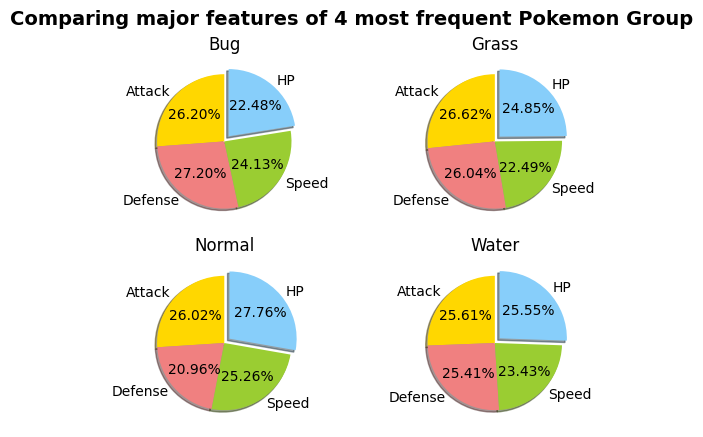

In [ ]:


values, counts = np.unique(df_pie.iloc[:,0], return_counts=True)
result = np.column_stack((values, counts))
result=np.array(sorted(result, key=lambda x: x[1]))[::-1][0:4,:]
print("Item frequency:\n", result)

df_pie = df_pie.loc[df_pie.loc[:,'Type_1'].str.contains(r'(Water|Normal|Grass|Bug)')]
print(df_pie)

type_1_names = values#frequent_grp[:,0]
print(type_1_names)
# Mean of samples for each feature corresponding to all 4 group
df_grp = df_pie.groupby('Type_1').mean()
print(df_grp)


names = df_grp.columns
colors = ['gold', 'lightcoral',
              'yellowgreen', 'lightskyblue']
explode = (0, 0, 0, 0.1)  # takes out only the 4th slice
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2)
ax = [ax1, ax2, ax3, ax4]
for i in range(0,4):
    percent = df_grp.iloc[i,:]
    ax[i].pie(percent, explode = explode,
            labels = names, colors = colors,
            autopct='%.2f%%',   # display value
            shadow=True,
            startangle=90)
    ax[i].set_aspect('equal')
    ax[i].set_title(type_1_names[i])
plt.suptitle('Comparing major features of 4 most frequent Pokemon Group',
             fontsize = 14,
             fontweight = 'bold')

#####From the chart, we can state the following about the given groups of Pokemon:
Fastest group: Grass Type

Aggressive group: Normal Type

Defensive group: Water Type

Strongest Group: Grass Type

###Tryout--Problem Statement:
Learn to make animated graphs using Matplotlib Animation module. (Compile and execute in Spyder)

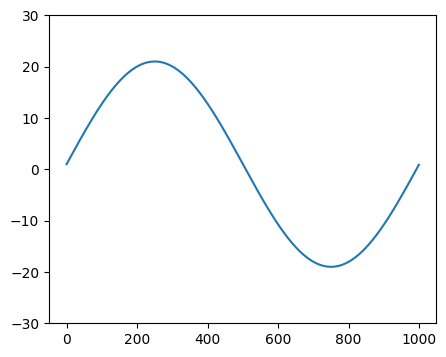

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

n = 30
x = np.arange(0,1,0.001)
y = np.ones( (1000,n) )
for i in range(0,n):
    y[:,i] = np.sin(2 * np.pi * x) * i+1

def func(arg):
     plt.cla()   #Clear axis
     plt.plot(y[:,20])
     plt.ylim(-30,30)
fig = plt.figure(figsize=(5,4))

to_save = animation.FuncAnimation(fig, func, frames=30)

####Scatter plot

0    318
1    405
2    525
3    309
Name: Total, dtype: int64
0    45
1    45
2    45
3    45
Name: Catch_Rate, dtype: int64


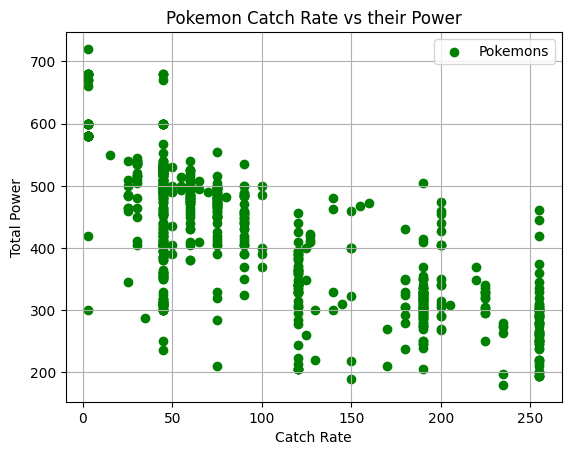

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/pokemon_alopez247.csv')
tot_power = df.iloc[:,4]
print(tot_power.head(4))
catch_rate = df.iloc[:,21]
print(catch_rate.head(4))
fig, ax = plt.subplots()
p = ax.scatter(catch_rate, tot_power, c = 'g')
ax.grid()
ax.set_xlabel('Catch Rate')
ax.set_ylabel('Total Power')
ax.set_title('Pokemon Catch Rate vs their Power')
plt.legend([p],['Pokemons'])

In [ ]:


import matplotlib.patches as patches
import matplotlib.transforms as transforms
trans = transforms.blended_transform_factory(
    ax.transData,ax.transAxes)
rect = patches.Rectangle((44,0), width=2, height=5,
                         transform=trans, color='red',
                         alpha=0.4)
ax.add_patch(rect)

In [ ]:


catch_rate_45 = df[df.loc[:,'Catch_Rate'] == 45]
pow_330 = catch_rate_45[catch_rate_45.loc[:,'Total'] <= 330]
print("Number of such Pokemons:", len(pow_330))
# Top 10 adamant Pokets
print(pow_330.loc[:,'Name'].head(10))

Number of such Pokemons: 29
0       Bulbasaur
3      Charmander
6        Squirtle
132         Eevee
146       Dratini
151     Chikorita
154     Cyndaquil
157      Totodile
224      Delibird
234      Smeargle
Name: Name, dtype: object


###Excercise--Problem Statement:
Construct a 3D scatter plot for variables x, y and z with some random values as shown below. Choose colors as desired.

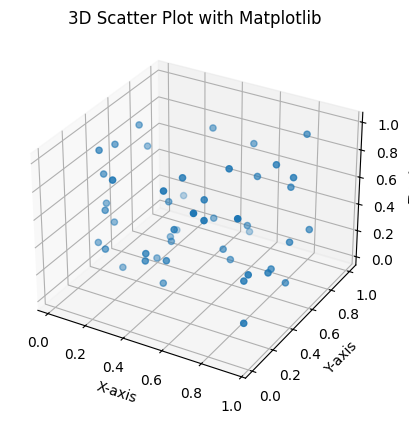

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x, y, z = np.random.rand(3,50)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # Create a 3D subplot
ax.scatter(x, y, z) # Plot the scatter points
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D Scatter Plot with Matplotlib')
plt.show()

###Tryout--Problem Statement:
Fetch your code from last exercise (3D scatter plotting) and append the below code to observe rotating plots.

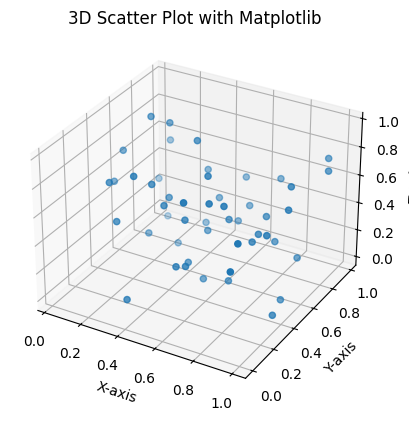

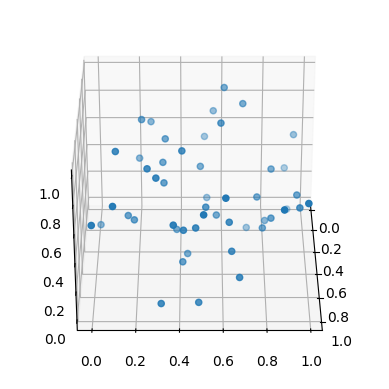

<Figure size 640x480 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

x, y, z = np.random.rand(3,50)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # Create a 3D subplot
ax.scatter(x, y, z) # Plot the scatter points
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D Scatter Plot with Matplotlib')
plt.show()## rotate the axes and update
#from mpl_toolkits.mplot3d import axes3d
# consiering you saved your Axes under variable ax

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for angle in range(0, 360):
    ax.scatter(x, y, z) #
    ax.view_init(30, angle)
    plt.pause(.001)

plt.draw()
#plt.show()

###Line chart
From the last section we have observed that top 3 adamant Pokemons with Power less than or equal to 330 and Catch_Rate equals 45 are:

--Bulbasaur

--Charmander

--Squirtle

'Analysis of above chart states that almost all three Pokemon are equal in given features except two distinct observations:\nSquirtle is much better in terms of defense.\nCharmander has much more swiftness in its body but less Special Defense.\n'

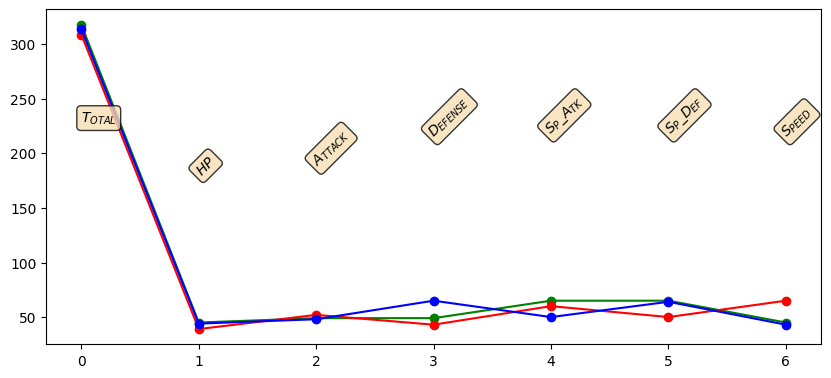

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/pokemon_alopez247.csv')
bulbasaur = list(df.iloc[0,4:11])
charmander = list(df.iloc[3,4:11])
squirtle = list(df.iloc[6,4:11])
pokets = [bulbasaur, charmander, squirtle]
# Converting height from meters to inches
# Weight remains in kg
bul_hw = [df.iloc[0,19]*3.281, df.iloc[0,20]]
char_hw = [df.iloc[3,19]*3.281, df.iloc[3,20]]
squ_hw =  [df.iloc[6,19]*3.281, df.iloc[6,20]]
hw = [bul_hw, char_hw, squ_hw]


fig = plt.figure(figsize=(10,20))
# Line plot
ax1 = plt.subplot2grid((4,3), (0,0), colspan=3)
ax1.plot(bulbasaur,'g-',bulbasaur,'go')
ax1.plot(charmander,'r-',charmander,'ro')
ax1.plot(squirtle,'b-',squirtle,'bo')
ax1.set_xlim(-0.3,6.3)


text_x_coord = [0.045, .19, 0.34, 0.49, 0.64, 0.795, 0.945]
text_y_coord = [0.7, 0.57, 0.65, 0.75, 0.75, 0.75, 0.72]
rot = [0, 45, 45, 45, 45, 45, 45]
txt = [r'$T_{OTAL}$', r'$HP$', r'$A_{TTACK}$', r'$D_{EFENSE}$',
       r'$S_{P}\_A_{TK}$',r'$S_{P}\_D_{EF}$',r'$S_{PEED}$']
for i in range(0, 7):
    ax1.text(text_x_coord[i], text_y_coord[i], txt[i],
             transform = ax1.transAxes,  # makes width and height in percentage
             va = 'top',
             rotation = rot[i],
             bbox = dict(
                     boxstyle = 'round',
                     facecolor = 'wheat',
                     alpha = 0.78))  # alpha -> transparency

'''Analysis of above chart states that almost all three Pokemon are equal in given features except two distinct observations:
Squirtle is much better in terms of defense.
Charmander has much more swiftness in its body but less Special Defense.
'''

###Box Plot

Text(1.2, 60, 'Median')

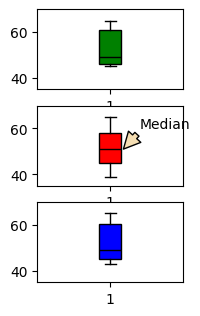

In [ ]:

# continuing from previous code
ax2 = plt.subplot2grid((4,3), (1,0), colspan=1)
ax3 = plt.subplot2grid((4,3), (2,0), colspan=1)
ax4 = plt.subplot2grid((4,3), (3,0), colspan=1)
ax = [ax2, ax3, ax4]
colors = ['g', 'r', 'b']
for i in range(0, 3):
    bp = ax[i].boxplot(pokets[i][1:],patch_artist=True)
    # Adding colors to edges
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
            plt.setp(bp[element], color='k')
    # Adding color inside the box
    for patch in bp['boxes']:
        patch.set(facecolor=colors[i])
    ax[i].set_ylim(35,70)

ax3.annotate('Median', xy=(1.09, 51),
              xytext=(1.2, 60),
            arrowprops=dict(facecolor='wheat',
                            shrink=0.001),)

####Analysis of all three box plots reveals that Median value of all three Pokemon lies in almost similar range to each other. Hence, on an average, all three of them are equal in strength/weakness.

####Excercise--Problem Statement:
Given values for x and y, arrive at the following plot shown below:

###Integrated plots
So far, we have used all the starting seven features to illustrate comparison among the traits of all three Pokemon. Next, we take the last two features namely Weight and Height and plot a bar graph as shown:

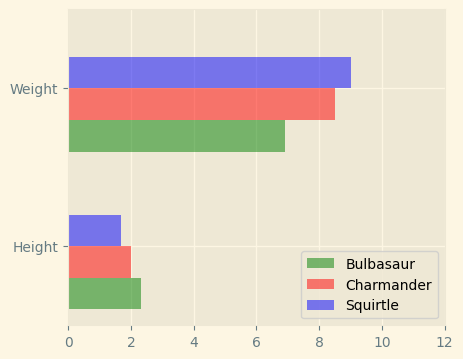

In [ ]:


# continuing from previous code
ax5 = plt.subplot2grid((4,3), (1,1), colspan=2, rowspan = 3)
bar_width = 0.2
wdt = 0
names = ['Bulbasaur','Charmander','Squirtle']

#fig=plt.figure(figsize=(50,20))

for i in range(0, 3):
    p=ax5.barh(np.arange(2) + wdt, hw[i],bar_width,
             alpha = 0.5,
             color = colors[i],
             label = names[i])
    wdt += bar_width
ax5.legend(loc = 'lower right')
ax5.set_xlim(0,12)
ax5.set_ylim(-0.2,1.8)
plt.yticks(np.arange(2) + (bar_width)*1.5,
           ('Height', 'Weight'))

plt.tight_layout()
plt.show()
#print(plt.style.available)
plt.style.use('Solarize_Light2')

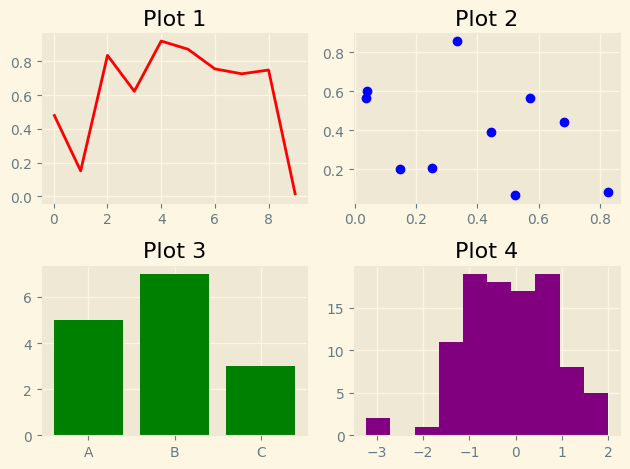

In [ ]:

    import matplotlib.pyplot as plt
    import numpy as np

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2)

    # Plot on the first subplot (top-left)
    axs[0, 0].plot(np.random.rand(10), color='red')
    axs[0, 0].set_title('Plot 1')

    # Plot on the second subplot (top-right)
    axs[0, 1].scatter(np.random.rand(10), np.random.rand(10), color='blue')
    axs[0, 1].set_title('Plot 2')

    # Plot on the third subplot (bottom-left)
    axs[1, 0].bar(['A', 'B', 'C'], [5, 7, 3], color='green')
    axs[1, 0].set_title('Plot 3')

    # Plot on the fourth subplot (bottom-right)
    axs[1, 1].hist(np.random.randn(100), bins=10, color='purple')
    axs[1, 1].set_title('Plot 4')

    plt.tight_layout() # Adjust subplot parameters for a tight layout
    plt.show()

##SCIKIT LEARN

###Linear Regression

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)       # (506, 13)
print(boston.feature_names)  # Column names
print(boston.DESCR)        # brief desc.
df = pd.DataFrame(boston.data)
print(df.head(5))

df.columns = boston.feature_names
print(df.head(5))

df['PRICE'] = boston.target
print(df.head(5))

X = df.drop('PRICE', axis = 1)

## (use sklearn.model_selection in case sklearn.cross_validation results into error)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, df.PRICE, test_size = 0.33, # Test data (33%)
        random_state = 42) # assign random_state to any value, to get same samples on each fresh run

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
pred_test = lm.predict(X_test)

plt.scatter(y_test,pred_test)
plt.plot(np.unique(y_test),
      np.poly1d(np.polyfit(y_test, pred_test, 1))(np.unique(y_test)),
      linewidth = 3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

coeff_df = pd.DataFrame(X_train.columns, lm.coef_)
print(coeff_df)
mse = sklearn.metrics.mean_squared_error(y_test, pred_test)
print(mse)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


##Logistic Regression

####

The Linear regression model is used when a given target attribute is quantitative or continuous in nature. However, to predict a categorical target attribute, we often rely upon the logistic regression which gives us a bounded probability within the range of [0,1].

To study the logistic regression, we take Iris dataset and determines the decision boundary using sepal width and height. To initiate, we load features into variable X and target species into variable Y.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
iris = datasets.load_iris()
X = iris.data[:, :2]  # Sepal Width and Sepal Height
Y = iris.target       # Species -> Setosa, Versicolor, Virginica

####
Next, we build the Logistic Regression model and set the inverse of regularization strength to 100,000 to avoid overfitting, since we have fewer data.

In [ ]:

lm = linear_model.LogisticRegression(C=1e5)
lm.fit(X, Y)

LogisticRegression(C=100000.0)

####
Once the model is fit, we're set to define the decision boundary for each species based on selected features. To do so, we create a mesh grid whose X and Y-axis range is equal to the minimum and maximum range of Sepal Height and Sepal Width.

In [ ]:

# Range of X and Y axis
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# Step size in the mesh
h = .02
# Creating Mesh Grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

####
Next, we predict the decision boundary with the given data and visualize it using colored mesh as shown.

<ipython-input-7-e8611f30d8ef>:7: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  plt.figure(1, figsize=(4, 3))


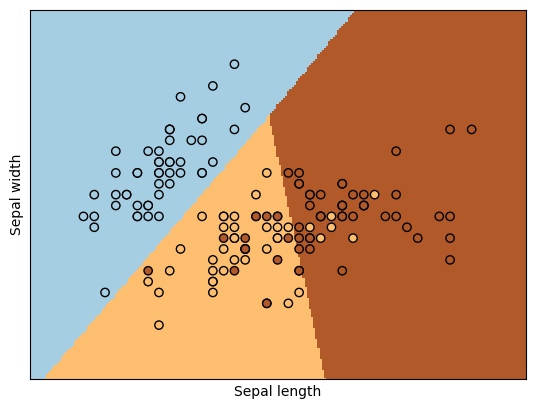

In [ ]:

Z = lm.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Labeling
plt.scatter(X[:, 0], X[:, 1],c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.figure(1, figsize=(4, 3))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(());
plt.yticks(());
plt.show()

####
The colored boundaries classifies the species (in order: Blue: Setosa, Orange: Versicolor and Brown: Virginica) based on given sepal features. For more clarification, we can integrate data points on the plot as shown.

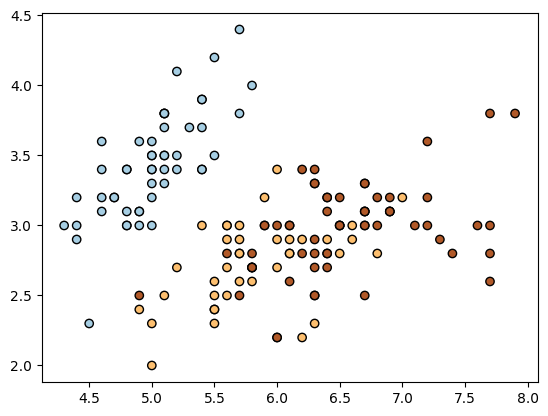

In [ ]:

plt.scatter(X[:, 0], X[:, 1],c=Y, edgecolors='k', cmap=plt.cm.Paired)

##Decision Trees

####
Another form of supervised learning is decision tree. A decision tree is quite apt for classification and regression models. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
To demonstrate the working of a decision tree classifier, we take balance scale dataset (information) whose objective is to classify whether the scale has more load on right, left or centered. The attributes are the left weight, the left distance, the right weight, and the right distance.
Let us load the data into a dataframe and so forth get the training and the testing data. Assuming you have the dataset into an excel file format and stored in the same working directory.

In [ ]:


import pandas as pd
## (use sklearn.model_selection in case sklearn.cross_validation results into error)
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv('/content/sample_data/data3.csv')
X = df.values[:, 1:5]   # Other features
Y = df.values[:,0]  # Target
# Splitting data
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3,
                                                random_state = 42)

####
A decision tree classifier can have two criterion i.e. Gini or Entropy. Let us build both of them to fit the model and achieve some predictions.

In [ ]:

# Gini Impurity
lm_gini = DecisionTreeClassifier(criterion = "gini", random_state = 42,
                              max_depth=3,
                              min_samples_leaf=5) # min. samples req. at leaf node
lm_gini.fit(X_train, y_train)
y_pred = lm_gini.predict(X_test)
# Information Gain
lm_ig = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                              max_depth=3,
                              min_samples_leaf=5)
lm_ig.fit(X_train, y_train)
y_pred_ig = lm_ig.predict(X_test)


print(y_pred)
print(y_pred_ig)


print("Accuracy of Gini Impurity model: ",
      accuracy_score(y_test, y_pred) * 100)
print("Accuracy of Information Gain model: ",
      accuracy_score(y_test, y_pred_ig) * 100)

['L' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'L'
 'R' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R'
 'L' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L'
 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'R'
 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R'
 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'R'
 'R' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'R'
 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R'
 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'R']
['L' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'L'
 'R' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R'
 'L' 'L' 'R' 'L' 

##KMeans Clustering

####
Clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). We discuss a general purpose clustering algorithm available under sklearn namely Kmeans. The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified.
To demonstrate the k-Means method, we take the driver local source dataset in which we estimate the clusters between Speed and Distance features. We load the dataset into a dataframe as shown, assuming you have saved the dataset into .xlsx/.csv format.

In [ ]:


import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/data4.csv', delimiter='\t')
#df.head(5)
f1 = df['Distance_Feature'].values#[0:200]
f2 = df['Speeding_Feature'].values#[0:200]
X = pd.DataFrame({'dist': f1,
                  'speed':f2})


kmeans = KMeans(n_clusters = 2) # don't exceed 4 else increase colormap
k_fit = kmeans.fit(X)
pred = kmeans.predict(X)


centroids = kmeans.cluster_centers_
print(centroids)

[[ 50.04763437   8.82875   ]
 [180.017075    18.29      ]]


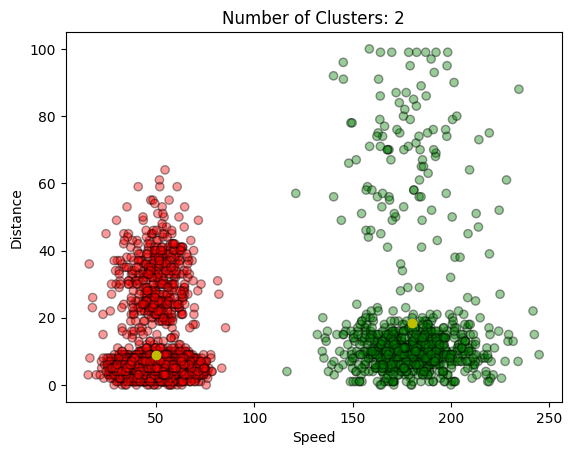

In [ ]:

colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'k'}
colors = list(map(lambda x: colmap[x+1], pred))
plt.scatter(f1, f2, color = colors,
            alpha = 0.4, edgecolor = 'k')
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'y')
plt.xlabel('Speed')
plt.ylabel('Distance')
plt.title('Number of Clusters: 2')
plt.show()

####
KMeans-Excercise


Import the 'iris-modified' dataset to python environment. Perform the following operations:

1. Find 3 clusters in this dataset.
2. Find the size of each cluster.  
3. Visualize the clusters using the matplotlib library.

#Summary

In this course, we have achieved,
Working with numpy array by applying operations on images and also learned ways to deal with linear algebra.
-----
Importing of a real-world dataset using pandas and applied aspects of data cleaning and feature engineering.
------
Visualization using matplotlib and covered well enough ground to transform a type of dataset into a dynamic integrated plot.
------
Implementation of commonly used Machine Learning algorithms using scikit-learn module.
-------

======================================

#TIME SERIES ANALYSIS

-  Scenario 1: Aviation
-  Scenario 2: Stock Market
-  Scenario 3: Real Estate

In [ ]:
# Scenario 1 AVIATION

####A company called Cyrus Aviation needs to decide how many flights they should schedule in order to meet the demands of the varying number of customers they cater to.

####Cyrus Aviation has the following data:
- number of passengers
- month and year of travel

Cyrus Aviation is looking for seasonal patterns in data. It wants to know about the lean periods where it can offer discounts.

####
Cyrus Aviation can use this information to set up marketing strategies and vary flight schedules in such a way that maximizes their revenue. We can derive this information using many statistical analysis methods such as Association Analysis, Time Series Analysis and, Regression Analysis. The choice of method depends largely on the type of data. Let us understand the type of data on which Time Series Analysis can be applied.

In [ ]:
#Scenario 2  STOCK MARKET

####
An investor wants to invest in a stock market by buying some shares of Cyrus Aviation, but he is not sure whether it will give him a significant profit. If he makes a wrong estimate, then he might incur a loss.

The investor is looking for patterns in the company’s performance, these patterns can be used to decide if the stock price will go up.

In [ ]:
#Scenario 3: REAL ESTATE

####
Bob, a real estate builder wants to build houses in a particular area. However, he wants to analyze the demand because higher demand would earn him a profit but lower demand would result in a loss.

Bob is looking for a way to predict the demand, based on which he can decide the number of houses to be built.

##In all these scenarios, analyzing the data will help the organizations in making better decisions regarding the future.

##AirPassengers Dataset

In [ ]:

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# In case if you are working in a notebook
%matplotlib inline

# Reading the data
AirPassengers = pd.read_csv('/content/sample_data/AirPassengers.csv', parse_dates=[0])
#Marking first column to datetype format

# Summary of the data
AirPassengers.describe()

Travel date  Passengers
count                  144  144.000000
mean   1954-12-16 05:00:00  280.298611
min    1949-01-01 00:00:00  104.000000
25%    1951-12-24 06:00:00  180.000000
50%    1954-12-16 12:00:00  265.500000
75%    1957-12-08 18:00:00  360.500000
max    1960-12-01 00:00:00  622.000000
std                    NaN  119.966317

In [ ]:
AirPassengers.head(5)

Travel date  Passengers
0  1949-01-01         112
1  1949-02-01         118
2  1949-03-01         132
3  1949-04-01         129
4  1949-05-01         121

In [ ]:
AirPassengers.columns

Index(['Travel date', 'Passengers'], dtype='object')

In [ ]:
AirPassengers.index

RangeIndex(start=0, stop=144, step=1)

In [ ]:
np.unique(AirPassengers['Passengers'])

array([104, 112, 114, 115, 118, 119, 121, 125, 126, 129, 132, 133, 135,
       136, 140, 141, 145, 146, 148, 149, 150, 158, 162, 163, 166, 170,
       171, 172, 178, 180, 181, 183, 184, 188, 191, 193, 194, 196, 199,
       201, 203, 204, 209, 211, 218, 227, 229, 230, 233, 234, 235, 236,
       237, 242, 243, 259, 264, 267, 269, 270, 271, 272, 274, 277, 278,
       284, 293, 301, 302, 305, 306, 310, 312, 313, 315, 317, 318, 336,
       337, 340, 342, 347, 348, 355, 356, 359, 360, 362, 363, 364, 374,
       390, 391, 396, 404, 405, 406, 407, 413, 417, 419, 420, 422, 432,
       435, 461, 463, 465, 467, 472, 491, 505, 508, 535, 548, 559, 606,
       622])

In [ ]:
AirPassengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Travel date  144 non-null    datetime64[ns]
 1   Passengers   144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


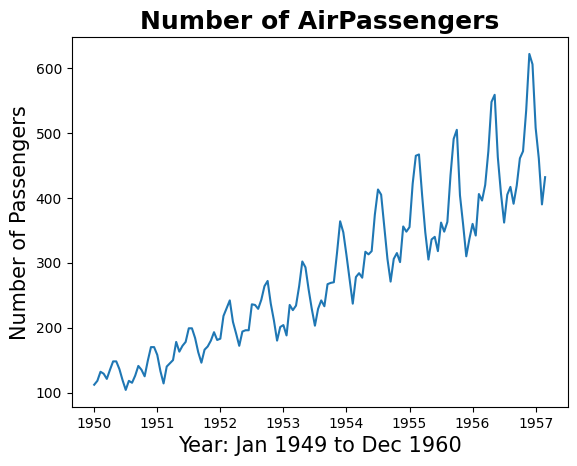

In [ ]:

# Importing necessary libraries
import matplotlib.pyplot as plt

# Feching years
year = AirPassengers['Travel date'].dt.year

# Visualizing the time series by plotting number of passengers versus time
fig, ax = plt.subplots()

ax.plot(AirPassengers.Passengers)
ax.set_title('Number of AirPassengers', weight='bold', fontsize=18)
# Title

ax.set_ylabel('Number of Passengers', fontsize=15)
ax.set_xlabel('Year: Jan 1949 to Dec 1960', fontsize=15)
ax.set_xticklabels(np.unique(year))
fig.show()

####
Therefore, only one attribute is present(No. of passengers), which is being observed at regular time intervals. This type of data is known as Time Series Data.

On the other hand, Cars93 has 27 parameters that are assumed to be observed at the same time, since the time component is missing. This type of data is known as Identically and Independently Distributed data(IID).


####Let's look at how Time Series data differs from IID data.
- In time series, data is dependent on the previous values.
- In time series data, mean and variance might change over a period of time, this is known as heteroscedasticity. If it does not vary, the data is said to have homoscedasticity.

####
Time series data may exhibit conditional heteroscedasticity, where the mean might be constant but its variance is varying.
 - In time series data, one variable is observed at different time intervals, whereas in IID, different variables are assumed to be observed at the same time or in the same time interval

In [ ]:

# Importing necessary library
#import pandas as pd
# Reading dataset without parsing
#AirPassengers = pd.read_csv('AirPassengers.csv')
# Analysing the datatype of columns
AirPassengers.dtypes

Travel date    datetime64[ns]
Passengers              int64
dtype: object

In [ ]:

# Importing necessary library
#import pandas as pd

# Changing the datatype of Travel date
AirPassengers['Travel date'] = pd.to_datetime(AirPassengers['Travel date'])
AirPassengers.dtypes

Travel date    datetime64[ns]
Passengers              int64
dtype: object

In [ ]:
#from copy import deepcopy

AirPass = AirPassengers.copy(deep=True)

In [ ]:
AirPass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Travel date  144 non-null    datetime64[ns]
 1   Passengers   144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:

# Making Travel date as Index and dropping current column to change the frequency
AirPass.index = AirPass['Travel date']

AirPass.drop(['Travel date'], axis=1, inplace=True)
# Changing frequency from daily
#to month end and getting
#the mean passenger for each month


AirPass.resample('M').mean().head()
# Note - M is one of the DateOffset object
# provided by Pandas.

Passengers
Travel date            
1949-01-31        112.0
1949-02-28        118.0
1949-03-31        132.0
1949-04-30        129.0
1949-05-31        121.0

In [ ]:
AirPassengers.head()

Travel date  Passengers
0  1949-01-01         112
1  1949-02-01         118
2  1949-03-01         132
3  1949-04-01         129
4  1949-05-01         121

###Creating a date time range with a particular frequency:

In [ ]:

#importing necessary libraries
import numpy as np

# Generating 10 random values
np.random.seed(42)
val = np.arange(500)
np.random.shuffle(val)
val = val[:10]
val

array([361,  73, 374, 155, 104, 394, 377, 124,  68, 450])

In [ ]:

# importing necessary library
import pandas as pd

#creating dataframe with dummy values
dummy_ = pd.DataFrame(val, index=pd.date_range(start='1/1/1910', end='1/10/1910', freq='D'),
                      # DateOffset 'D' refers to daily
                      columns=['RandomData'])
dummy_

RandomData
1910-01-01         361
1910-01-02          73
1910-01-03         374
1910-01-04         155
1910-01-05         104
1910-01-06         394
1910-01-07         377
1910-01-08         124
1910-01-09          68
1910-01-10         450

###Converting an unsorted date into a sorted date:

In [ ]:

#importing necessary libraries
import numpy as np
import pandas as pd


# Creation of unordered date
np.random.seed(42)
date = pd.date_range(start='1/1/1910', end='1/10/1910', freq='D')


# generating unordered index
idx_ = np.arange(10)
np.random.shuffle(idx_)
unordered_data = pd.DataFrame(val, index=date[idx_], columns=['Random data'])
unordered_data

Random data
1910-01-09          361
1910-01-02           73
1910-01-06          374
1910-01-01          155
1910-01-08          104
1910-01-03          394
1910-01-10          377
1910-01-05          124
1910-01-04           68
1910-01-07          450

In [ ]:
# sorting dataframe based on date index
unordered_data.sort_index(inplace=True)
unordered_data

Random data
1910-01-01          155
1910-01-02           73
1910-01-03          394
1910-01-04           68
1910-01-05          124
1910-01-06          374
1910-01-07          450
1910-01-08          104
1910-01-09          361
1910-01-10          377

####Time series is defined as 'a series of data points listed (or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time.'

####Time series analysis is defined as 'methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.' (Source: Wikipedia)

####Time series data must be a stationary series to perform time series analysis. Let us understand what a stationary series is.
A stationary series exhibits the following characteristics:
- mean is constant
- variance is constant
- co-variance is constant

Performing time series analysis on a non-stationary series will result in inaccurate predictions

##Problem Statement:

Create a time series data on a monthly basis starting from April 2007 to March 2012 considering random numbers as values with seed value as 42.

In [ ]:
np.random.seed(42)
monthrandomval = np.arange(60)
np.random.shuffle(monthrandomval)
monthrandomval

array([ 0,  5, 36, 45, 13, 54, 33, 48, 12, 57, 46, 50, 31,  3, 52, 17,  8,
        6, 40,  4, 43, 19, 34, 58, 25, 56, 15, 27,  9, 30, 26, 16, 24, 55,
       11, 32, 53, 41, 37, 29, 44,  1, 21,  2, 47, 39, 35, 23, 49, 10, 22,
       18, 59, 20,  7, 42, 14, 28, 51, 38])

In [ ]:
monthdf=pd.DataFrame(monthrandomval, index=pd.date_range(start='4/1/2007', end='4/1/2012', freq='M'), columns=['RandomData'])
monthdf.head(13)

RandomData
2007-04-30           0
2007-05-31           5
2007-06-30          36
2007-07-31          45
2007-08-31          13
2007-09-30          54
2007-10-31          33
2007-11-30          48
2007-12-31          12
2008-01-31          57
2008-02-29          46
2008-03-31          50
2008-04-30          31

####Patterns in Time Series Data

####
Analyzing the past data can be done by keeping in mind the following factors:

- Trend: shows a long term increase or decrease in data
-
Seasonal: when the data is affected by seasonal factors
-
Cyclic: data shows fluctuations across any period of time
-
Random: If the above 3 components are missing in a data

###These components are extracted by using the statsmodels package in python, which is explained later in this course.

/tmp/ipython-input-2-2687397271.py:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  AirPassenger = pd.read_csv('/content/sample_data/AirPassengers.csv', index_col='Travel date', date_parser=dateparse)


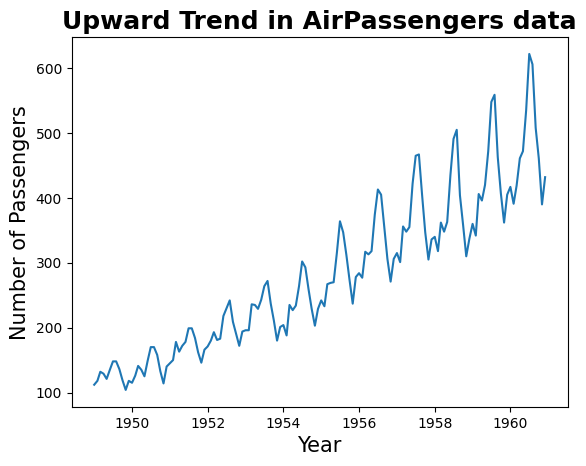

In [ ]:

#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Loading statsmodel method to perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Another way to load a time series data by defining a date format
dateparse = lambda dates: datetime.strptime(dates, "%m/%d/%Y")
#print(dateparse)
AirPassenger = pd.read_csv('/content/sample_data/AirPassengers.csv', index_col='Travel date', date_parser=dateparse)

# Visualizing trend of Airpassengers data
plt.plot(seasonal_decompose(AirPassenger.Passengers, model='multiplicative', period=1).observed)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('Upward Trend in AirPassengers data', weight='bold', fontsize=18)
plt.show()

/tmp/ipython-input-4-3452501741.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  GOOG_stock = pd.read_csv('/content/sample_data/Google_stock.csv', index_col='Date', date_parser=dateparse)


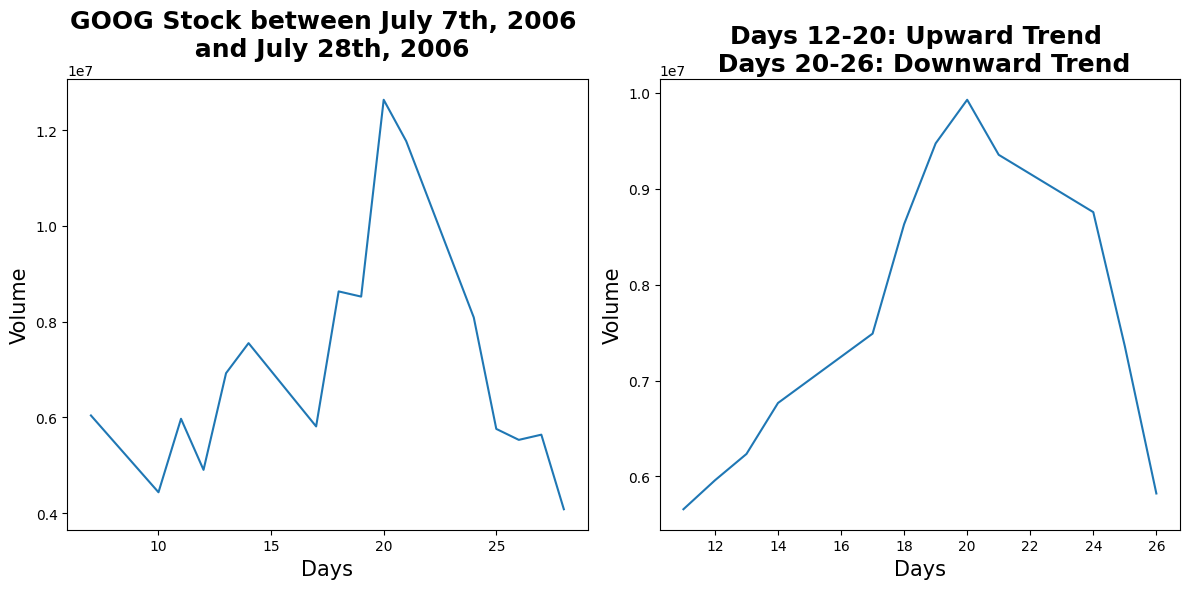

In [ ]:

#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Reading file
dateparse = lambda dates: datetime.strptime(dates, '%m/%d/%Y')
GOOG_stock = pd.read_csv('/content/sample_data/Google_stock.csv', index_col='Date', date_parser=dateparse)

# Visualizing upward and downward trends
plt.figure(figsize=(12, 6))

ax1 = plt.subplot2grid((1, 2), (0,0))
ax1.plot(GOOG_stock.index.day, # Labeling only days
        GOOG_stock.Volume)
ax1.set_xlabel('Days', fontsize=15)
ax1.set_ylabel('Volume', fontsize=15)
ax1.set_title('GOOG Stock between July 7th, 2006 \n and July 28th, 2006', weight='bold', fontsize=18)

ax2 = plt.subplot2grid((1, 2), (0,1))
ax2.plot(GOOG_stock.index.day, seasonal_decompose(GOOG_stock.Volume).trend)
ax2.set_xlabel('Days', fontsize=15)
ax2.set_ylabel('Volume', fontsize=15)
ax2.set_title('Days 12-20: Upward Trend \n Days 20-26: Downward Trend', weight='bold', fontsize=18)

plt.tight_layout()

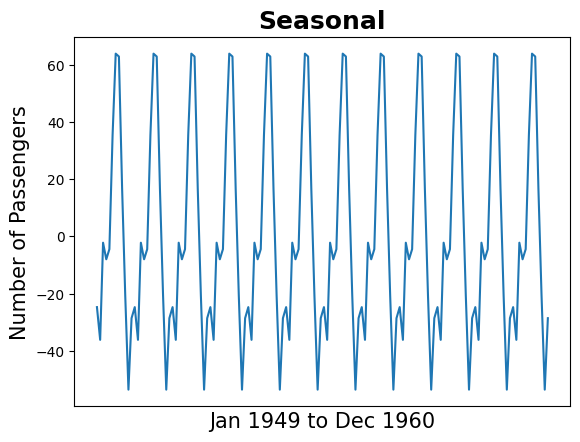

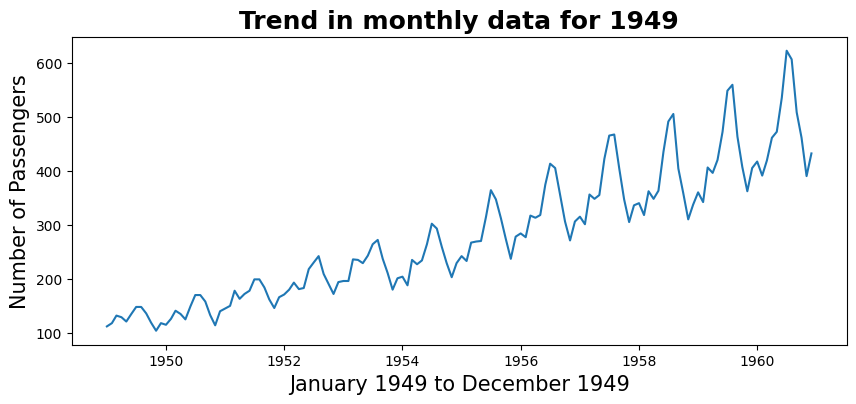

In [ ]:

#importing libraries
import matplotlib.pyplot as plt

# Visualizing seasonality of Airpassengers data
plt.plot(seasonal_decompose(AirPassenger.Passengers, period=12).seasonal)
plt.xticks([])
plt.xlabel('Jan 1949 to Dec 1960', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('Seasonal', weight='bold', fontsize=18)
plt.show()

# Visualizing seasonality of Airpassengers data for year 1949
plt.figure(figsize=(10, 4))
plt.plot(seasonal_decompose(AirPassenger.Passengers, period=1).trend)
plt.xlabel('January 1949 to December 1949', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('Trend in monthly data for 1949', weight='bold', fontsize=18)
plt.show()

####Cyclic variations can be identified over a large period of time. Unlike seasonal variations which occur within a year, a cycle may be spread across any period of time. Also, the end of an ongoing cycle is uncertain.

/tmp/ipython-input-8-2137196693.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  hsales = pd.read_csv('/content/sample_data/hsales.csv', index_col='date', date_parser=dateparse)


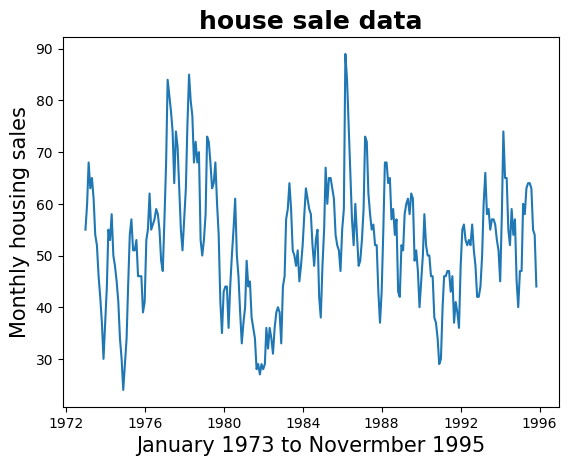

In [ ]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Reading data
dateparse = lambda dates: datetime.strptime(dates, '%m/%d/%Y')
hsales = pd.read_csv('/content/sample_data/hsales.csv', index_col='date', date_parser=dateparse)

# Visualizing house sales data
plt.plot(hsales)
plt.xlabel('January 1973 to Novermber 1995', fontsize=15)
plt.ylabel('Monthly housing sales', fontsize=15)
plt.title('house sale data', weight='bold', fontsize=18)
plt.show()

####
In the figure below, red circles show the change of trend from the downward direction to the upward direction, and green circles show the change of trend from the upward direction to downward along with black boxes which depict an upward trend, and the yellow boxes which depict a downward trend.

Capturing cyclic variations is a challenging process, as it occurs over a vast period of time. For example in this graph, we are not sure when in the future the trend will change its direction from downward to upward or vice-versa.

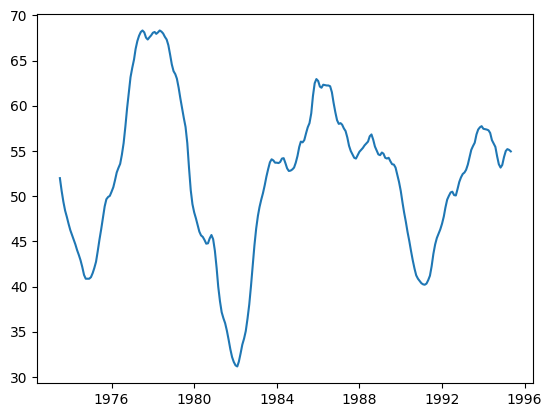

In [ ]:
plt.plot(seasonal_decompose(hsales).trend)

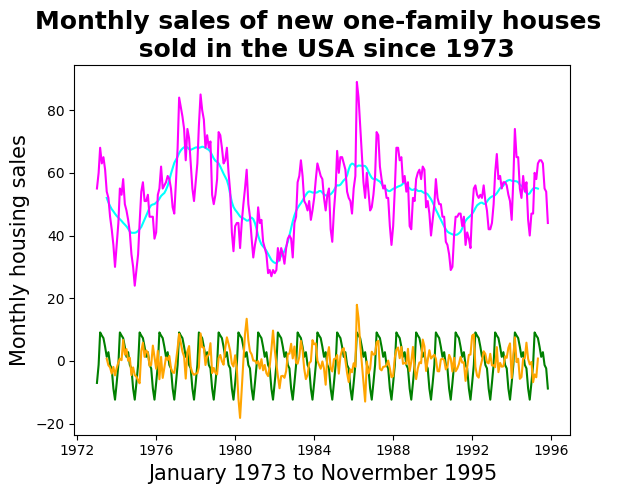

In [ ]:

# Importing libraries
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Visualizing monthly sales of new one-family houses
plt.plot(seasonal_decompose(hsales).trend, color='cyan')
plt.plot(seasonal_decompose(hsales).seasonal, color='green')
plt.plot(seasonal_decompose(hsales).resid, color='orange')
plt.plot(seasonal_decompose(hsales).observed, color='magenta')

plt.xlabel('January 1973 to Novermber 1995', fontsize=15)
plt.ylabel('Monthly housing sales', fontsize=15)
plt.title('Monthly sales of new one-family houses \n sold in the USA since 1973', weight='bold', fontsize=18)
plt.show()

####The data exhibits seasonality within a year but it also has a cyclic behavior of around 7 years.

####
When irregular fluctuations occur in the time series data, they can be categorized under Random factors.

For example, let's consider the hsales dataset

If the three components of a time series graph are missing i.e. trends, seasonality, or cyclic then the time series data is termed as random. Time series data does not need to have all the components.

When the other components are removed from the hsales data, we can observe that the remainder appears to be random. Therefore, we can conclude that the hsales data does not have any definite trend, but it has a seasonality component along with a random component.

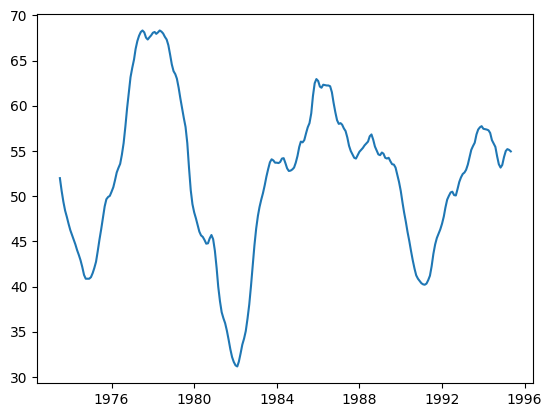

In [ ]:

plt.plot(seasonal_decompose(hsales, model='multiplicative', period=12).trend)

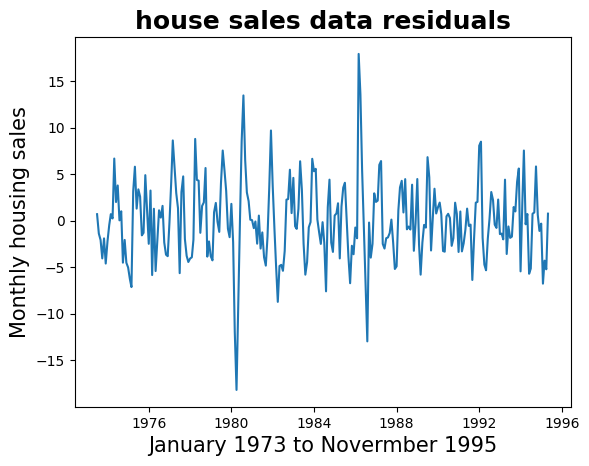

In [ ]:

# Importing libraries
import matplotlib.pyplot as plt

# Visualizing residuals of house sales data
plt.plot(seasonal_decompose(hsales).resid)
plt.xlabel('January 1973 to Novermber 1995', fontsize=15)
plt.ylabel('Monthly housing sales', fontsize=15)
plt.title('house sales data residuals', weight='bold', fontsize=18)
plt.show()

##Conclusion
Trend, seasonal, cyclic, and random components help us understand the behavior of time series data. These components help us build a forecasting model. You will learn these forecasting models in the later part of this course.

##Problem Statement:

Plot the trend, seasonality, and residuals of the number of appliances present against the date feature for the Appliance dataset.

In [ ]:
Appliances= pd.read_csv('/content/sample_data/Appliance.csv')#, index_col='date', date_parser=dateparse)
Appliances.head(5)

date  Appliances
0  1/11/2016 17:00          60
1  1/11/2016 17:10          60
2  1/11/2016 17:20          50
3  1/11/2016 17:30          50
4  1/11/2016 17:40          60

In [ ]:
Appliances.head(5)

date  Appliances
0  1/11/2016 17:00          60
1  1/11/2016 17:10          60
2  1/11/2016 17:20          50
3  1/11/2016 17:30          50
4  1/11/2016 17:40          60

In [ ]:
Appliances.tail(5)

date  Appliances
19730  5/27/2016 17:20         100
19731  5/27/2016 17:30          90
19732  5/27/2016 17:40         270
19733  5/27/2016 17:50         420
19734  5/27/2016 18:00         430

In [ ]:
Appliances.date.values

array(['1/11/2016 17:00', '1/11/2016 17:10', '1/11/2016 17:20', ...,
       '5/27/2016 17:40', '5/27/2016 17:50', '5/27/2016 18:00'],
      dtype=object)

In [ ]:
dateparse = lambda dates: datetime.strptime(dates, '%m/%d/%Y')
Appliances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        19735 non-null  object
 1   Appliances  19735 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 308.5+ KB


In [ ]:
Appliances['date']=pd.to_datetime(Appliances['date'])
Appliances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        19735 non-null  datetime64[ns]
 1   Appliances  19735 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 308.5 KB


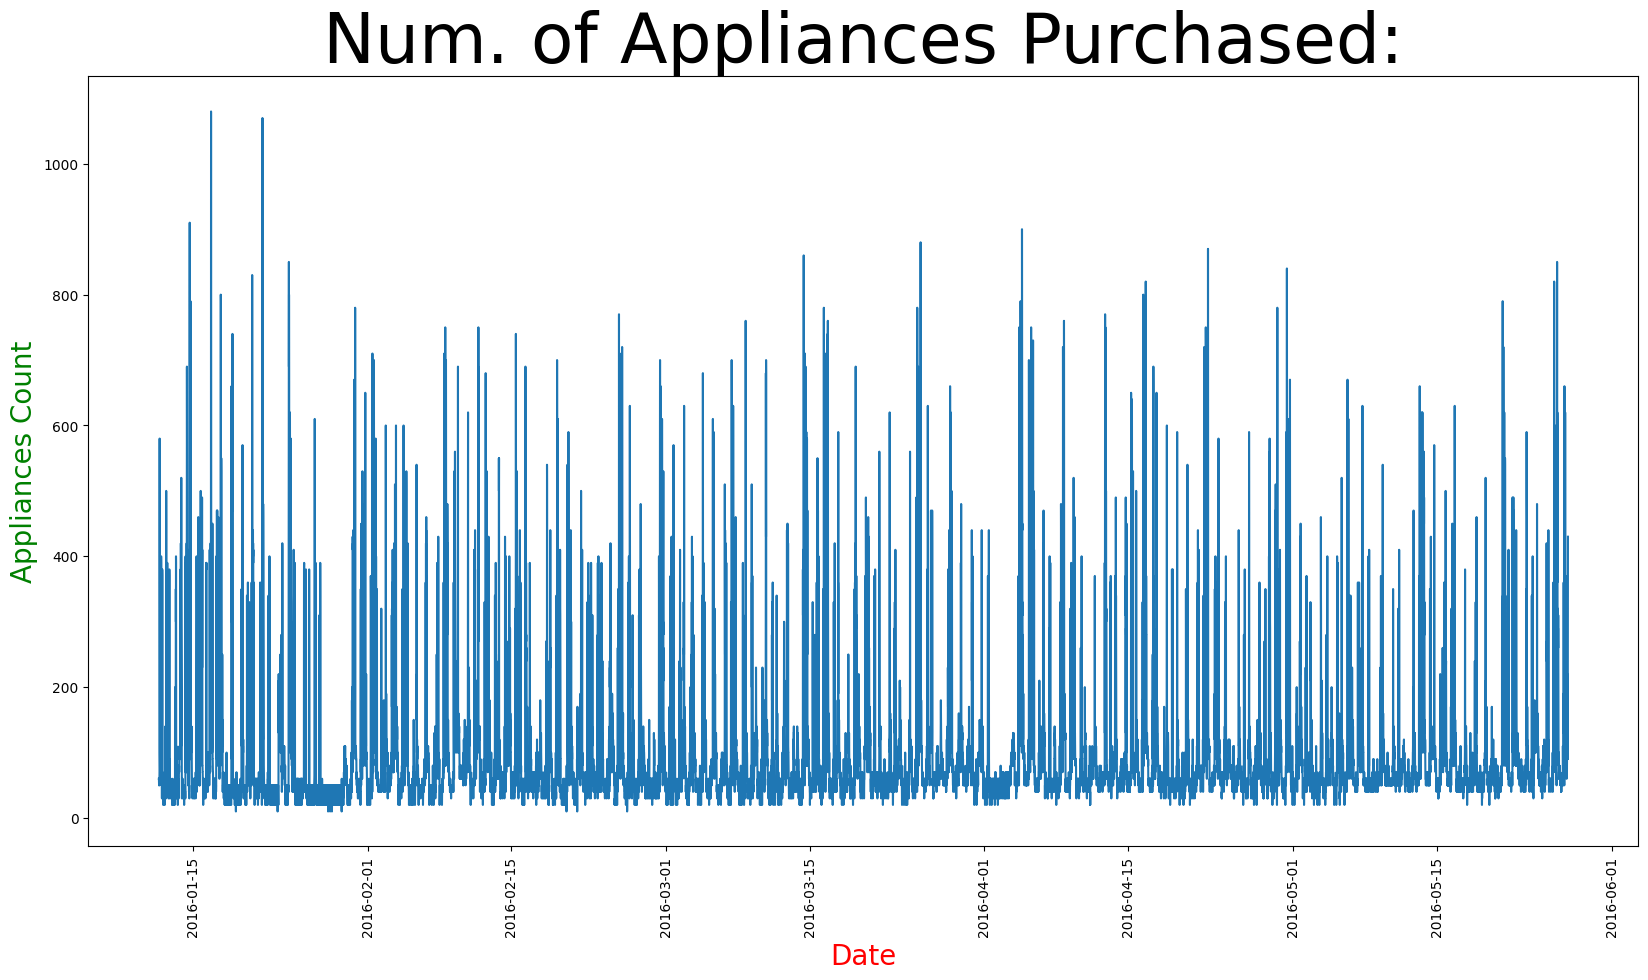

In [ ]:

plt.figure(figsize=(20,10))
plt.plot(Appliances.date, Appliances.Appliances)
plt.xticks(rotation=90)
plt.xlabel('Date', size=20, color='red')
plt.ylabel('Appliances Count', size=20, color='green')
plt.title('Num. of Appliances Purchased:', size=50)
plt.show()

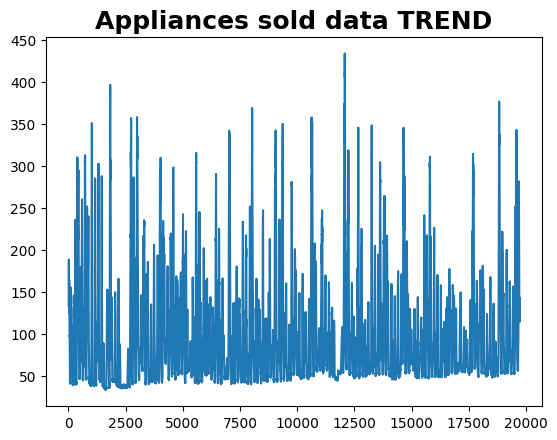

In [ ]:
import matplotlib.pyplot as plt

# Visualizing residuals of house sales data
plt.plot(seasonal_decompose(Appliances.Appliances, period=24).trend)
plt.title('Appliances sold data TREND', weight='bold', fontsize=18)
plt.show()

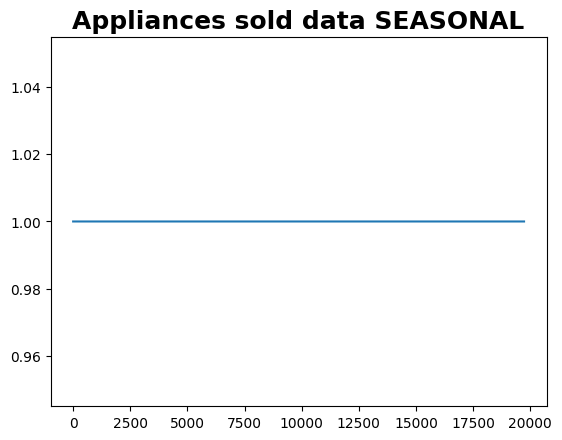

In [ ]:
plt.plot(seasonal_decompose(Appliances.Appliances, model='multiplicative', period=1).seasonal)
plt.title('Appliances sold data SEASONAL', weight='bold', fontsize=18)
plt.show()

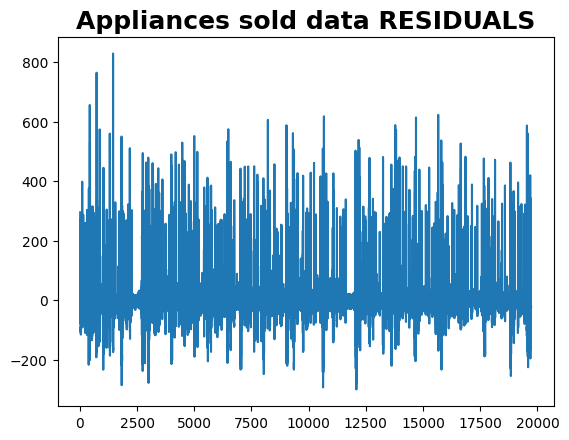

In [ ]:
plt.plot(seasonal_decompose(Appliances.Appliances, period=24).resid)
plt.title('Appliances sold data RESIDUALS', weight='bold', fontsize=18)
plt.show()

####
We can improve the accuracy of our predictions by breaking down the effect that the factors have on the data.

 The four factors, trends, seasonal, cyclic, and random can be extracted with the help of the decomposition models.

 The decomposition models are used to find these four factors in time series data. The model helps us identify patterns in the data and make accurate predictions.

There are basically two decomposition models.

Additive model is used when seasonal variations are relatively constant over time

Multiplicative model is used when seasonal variations increase or decrease over time

###
Additive Model:

The time series data may be decomposed as follows:

 Time Series Data =

(Seasonal) + (Trends) + (Random)

In [ ]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load fresh data
dateparse = lambda dates: datetime.strptime(dates, '%m/%d/%Y')
AirPassenger = pd.read_csv('/content/sample_data/AirPassengers.csv', index_col='Travel date', date_parser=dateparse)

# Loading statsmodel method to perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Getting data corresponding to each month
cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

AP_reshaped = pd.DataFrame(AirPassenger.values.reshape(-1, 12),
                         columns=cols,                        # Month
                         index=range(1949, 1961))             # Year
AP_reshaped

/tmp/ipython-input-23-2191642989.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  AirPassenger = pd.read_csv('/content/sample_data/AirPassengers.csv', index_col='Travel date', date_parser=dateparse)


Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1949  112  118  132  129  121  135  148  148  136  119  104  118
1950  115  126  141  135  125  149  170  170  158  133  114  140
1951  145  150  178  163  172  178  199  199  184  162  146  166
1952  171  180  193  181  183  218  230  242  209  191  172  194
1953  196  196  236  235  229  243  264  272  237  211  180  201
1954  204  188  235  227  234  264  302  293  259  229  203  229
1955  242  233  267  269  270  315  364  347  312  274  237  278
1956  284  277  317  313  318  374  413  405  355  306  271  306
1957  315  301  356  348  355  422  465  467  404  347  305  336
1958  340  318  362  348  363  435  491  505  404  359  310  337
1959  360  342  406  396  420  472  548  559  463  407  362  405
1960  417  391  419  461  472  535  622  606  508  461  390  432

####
The seasonal_decompose command helps to compute the trend, seasonal, and random values of AirPassengers data. The below python script shows the decomposition of AirPassengers data on yearly basis by using additive model.

In [ ]:

# Importing libraries
import numpy as np
import pandas as pd

# Extracting the seasonal values
seasonal_data = np.round(seasonal_decompose(AirPassenger, model='additive').seasonal, 2)

# Getting output corresponding to each month
AP_season = pd.DataFrame(seasonal_data.values.reshape(-1, 12),
                         columns=cols,                        # Month
                         index=range(1949, 1961))             # Year
AP_season

Jan    Feb   Mar   Apr   May   Jun    Jul    Aug    Sep    Oct    Nov  \
1949 -24.75 -36.19 -2.24 -8.04 -4.51  35.4  63.83  62.82  16.52 -20.64 -53.59   
1950 -24.75 -36.19 -2.24 -8.04 -4.51  35.4  63.83  62.82  16.52 -20.64 -53.59   
1951 -24.75 -36.19 -2.24 -8.04 -4.51  35.4  63.83  62.82  16.52 -20.64 -53.59   
1952 -24.75 -36.19 -2.24 -8.04 -4.51  35.4  63.83  62.82  16.52 -20.64 -53.59   
1953 -24.75 -36.19 -2.24 -8.04 -4.51  35.4  63.83  62.82  16.52 -20.64 -53.59   
1954 -24.75 -36.19 -2.24 -8.04 -4.51  35.4  63.83  62.82  16.52 -20.64 -53.59   
1955 -24.75 -36.19 -2.24 -8.04 -4.51  35.4  63.83  62.82  16.52 -20.64 -53.59   
1956 -24.75 -36.19 -2.24 -8.04 -4.51  35.4  63.83  62.82  16.52 -20.64 -53.59   
1957 -24.75 -36.19 -2.24 -8.04 -4.51  35.4  63.83  62.82  16.52 -20.64 -53.59   
1958 -24.75 -36.19 -2.24 -8.04 -4.51  35.4  63.83  62.82  16.52 -20.64 -53.59   
1959 -24.75 -36.19 -2.24 -8.04 -4.51  35.4  63.83  62.82  16.52 -20.64 -53.59   
1960 -24.75 -36.19 -2.24 -8.04 -4.51  35.4  63.83  62.82  16.52 -20.64 -53.59   

        Dec  
1949 -28.62  
1950 -28.62  
1951 -28.62  
1952 -28.62  
1953 -28.62  
1954 -28.62  
1955 -28.62  
1956 -28.62  
1957 -28.62  
1958 -28.62  
1959 -28.62  
1960 -28.62

####

Figures below show the decomposition of data taken on an annual basis (Frequency='A') and a quarterly basis (Frequency='Q').

/tmp/ipython-input-25-3266175473.py:5: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_end = AirPassenger.resample('A').mean() # Here, DateOffset 'A' represents Year end


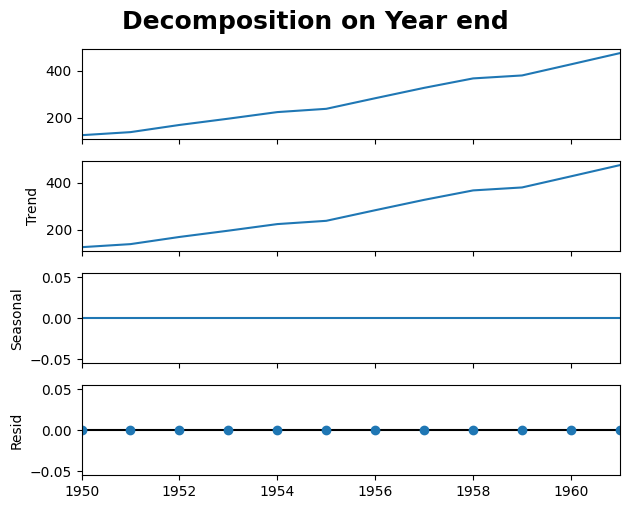

In [ ]:

# Importing libraries
import matplotlib.pyplot as plt

# Decomposition of Airpassengers data on year end taking mean of monthly values
year_end = AirPassenger.resample('A').mean() # Here, DateOffset 'A' represents Year end
seasonal_decompose(year_end, model='additive').plot()
plt.suptitle('Decomposition on Year end', weight='bold', fontsize=18, y=1.05)
plt.show()

/tmp/ipython-input-26-4065435099.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_end = AirPassenger.resample('Q').mean() # Here, DateOffset 'Q' represents Quarter end


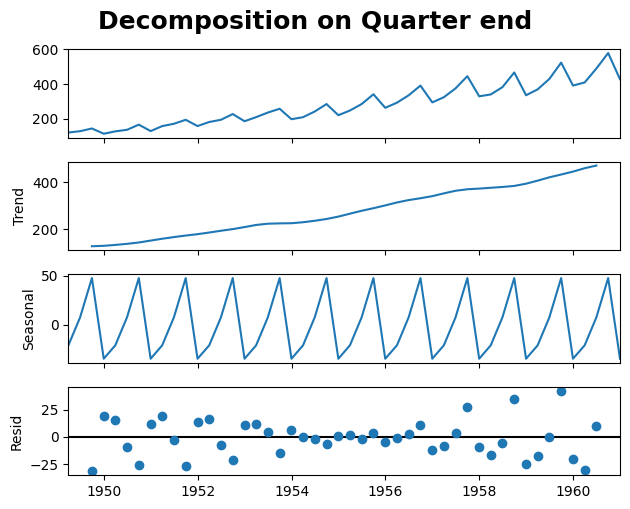

In [ ]:

# Importing libraries
import matplotlib.pyplot as plt

# Decomposition of Airpassengers data on quarter end taking mean of monthly values
quarter_end = AirPassenger.resample('Q').mean() # Here, DateOffset 'Q' represents Quarter end
seasonal_decompose(quarter_end, model='additive').plot()
plt.suptitle('Decomposition on Quarter end', weight='bold', fontsize=18, y=1.05)
plt.show()

####
The seasonality factor makes it difficult for us to identify whether the data is depicting an upward trend or a downward trend.

Therefore, we need to remove the seasonality factor from our data. The process of removing the seasonality factor from the data is known as
de-seasonalization and the resultant  values are known as seasonally adjusted values.

Let's calculate the seasonally adjusted values in the AirPassengers data using the below formula:

  Seasonally adjusted values = Time Series Data - (Seasonal) = (Trends) + (Random)

In [ ]:

# Deseasonalized data
AP_deseasonalized = AP_reshaped - AP_season
AP_deseasonalized

Jan     Feb     Mar     Apr     May    Jun     Jul     Aug     Sep  \
1949  136.75  154.19  134.24  137.04  125.51   99.6   84.17   85.18  119.48   
1950  139.75  162.19  143.24  143.04  129.51  113.6  106.17  107.18  141.48   
1951  169.75  186.19  180.24  171.04  176.51  142.6  135.17  136.18  167.48   
1952  195.75  216.19  195.24  189.04  187.51  182.6  166.17  179.18  192.48   
1953  220.75  232.19  238.24  243.04  233.51  207.6  200.17  209.18  220.48   
1954  228.75  224.19  237.24  235.04  238.51  228.6  238.17  230.18  242.48   
1955  266.75  269.19  269.24  277.04  274.51  279.6  300.17  284.18  295.48   
1956  308.75  313.19  319.24  321.04  322.51  338.6  349.17  342.18  338.48   
1957  339.75  337.19  358.24  356.04  359.51  386.6  401.17  404.18  387.48   
1958  364.75  354.19  364.24  356.04  367.51  399.6  427.17  442.18  387.48   
1959  384.75  378.19  408.24  404.04  424.51  436.6  484.17  496.18  446.48   
1960  441.75  427.19  421.24  469.04  476.51  499.6  558.17  543.18  491.48   

         Oct     Nov     Dec  
1949  139.64  157.59  146.62  
1950  153.64  167.59  168.62  
1951  182.64  199.59  194.62  
1952  211.64  225.59  222.62  
1953  231.64  233.59  229.62  
1954  249.64  256.59  257.62  
1955  294.64  290.59  306.62  
1956  326.64  324.59  334.62  
1957  367.64  358.59  364.62  
1958  379.64  363.59  365.62  
1959  427.64  415.59  433.62  
1960  481.64  443.59  460.62

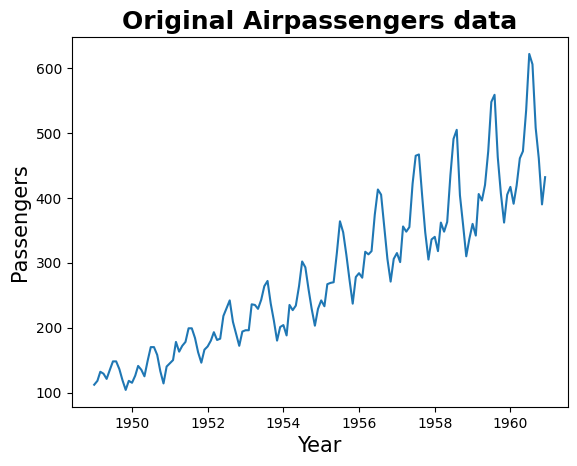

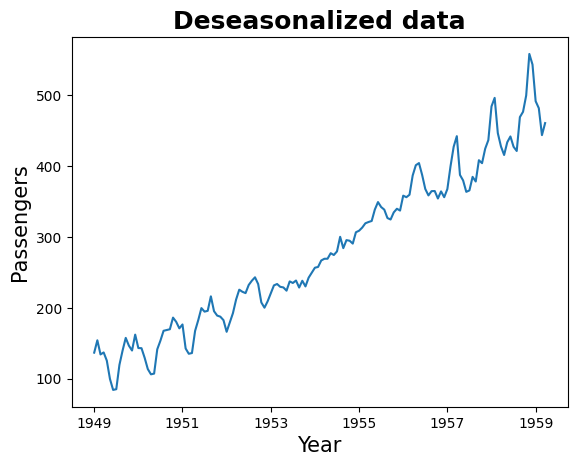

In [ ]:

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Melting the data by forming a 1D data to proceed with visualization
plt.plot(AirPassenger)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Original Airpassengers data', weight='bold', fontsize=18)
plt.show()

# Melting the data by forming it to a 1D data to proceed with visualization
plt.plot(pd.melt(AP_deseasonalized.T).value)
plt.xticks(np.linspace(0, 140, 6), np.unique(pd.melt(AP_deseasonalized.T).variable)[::2])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Deseasonalized data', weight='bold', fontsize=18)
plt.show()

###
Multiplicative Model

It is useful when the seasonal variations change over a period of time.


Time Series Data = (Seasonal) * (Trends) * (Random)

In [ ]:

# Importing libraries
import numpy as np
import pandas as pd

# Extracting the seasonal values
seasonal_data_mult = np.round(seasonal_decompose(AirPassenger, model='multiplicative').seasonal, 2)

# Getting output corresponding to each month
AP_season_mult = pd.DataFrame(seasonal_data_mult.values.reshape(-1, 12),
                         columns=cols,                        # Month
                         index=range(1949, 1961))             # Year
AP_season_mult

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  Nov  Dec
1949  0.91  0.88  1.01  0.98  0.98  1.11  1.23  1.22  1.06  0.92  0.8  0.9
1950  0.91  0.88  1.01  0.98  0.98  1.11  1.23  1.22  1.06  0.92  0.8  0.9
1951  0.91  0.88  1.01  0.98  0.98  1.11  1.23  1.22  1.06  0.92  0.8  0.9
1952  0.91  0.88  1.01  0.98  0.98  1.11  1.23  1.22  1.06  0.92  0.8  0.9
1953  0.91  0.88  1.01  0.98  0.98  1.11  1.23  1.22  1.06  0.92  0.8  0.9
1954  0.91  0.88  1.01  0.98  0.98  1.11  1.23  1.22  1.06  0.92  0.8  0.9
1955  0.91  0.88  1.01  0.98  0.98  1.11  1.23  1.22  1.06  0.92  0.8  0.9
1956  0.91  0.88  1.01  0.98  0.98  1.11  1.23  1.22  1.06  0.92  0.8  0.9
1957  0.91  0.88  1.01  0.98  0.98  1.11  1.23  1.22  1.06  0.92  0.8  0.9
1958  0.91  0.88  1.01  0.98  0.98  1.11  1.23  1.22  1.06  0.92  0.8  0.9
1959  0.91  0.88  1.01  0.98  0.98  1.11  1.23  1.22  1.06  0.92  0.8  0.9
1960  0.91  0.88  1.01  0.98  0.98  1.11  1.23  1.22  1.06  0.92  0.8  0.9

/tmp/ipython-input-30-2855228729.py:5: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_end = AirPassenger.resample('A').mean() # Here, DateOffset 'A' represents Year end


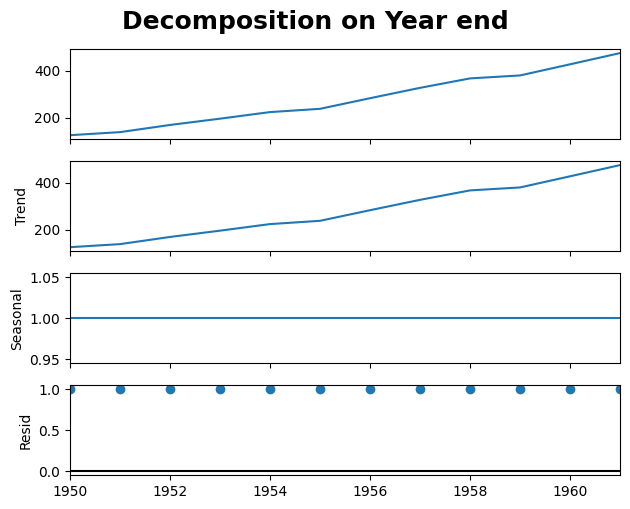

In [ ]:

# Importing libraries
import matplotlib.pyplot as plt

# Decomposition of Airpassengers data on year end taking mean of monthly values
year_end = AirPassenger.resample('A').mean() # Here, DateOffset 'A' represents Year end
seasonal_decompose(year_end, model='multiplicative').plot()
plt.suptitle('Decomposition on Year end', weight='bold', fontsize=18, y=1.05)
plt.show()

/tmp/ipython-input-31-472992520.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_end = AirPassenger.resample('Q').mean() # Here, DateOffset 'Q' represents Quarter end


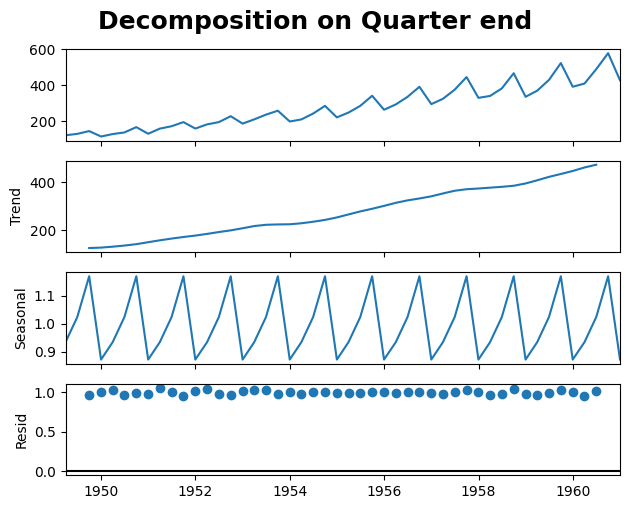

In [ ]:

# Importing libraries
import matplotlib.pyplot as plt

# Decomposition of Airpassengers data on quarter end taking mean of monthly values
quarter_end = AirPassenger.resample('Q').mean() # Here, DateOffset 'Q' represents Quarter end

seasonal_decompose(quarter_end, model='multiplicative').plot()
plt.suptitle('Decomposition on Quarter end', weight='bold', fontsize=18, y=1.05)
plt.show()

###

So, the seasonally adjusted value is calculated by:


Time Series Data = (Seasonal) * (Trends) * (Random)

Time Series Data/(Seasonal) = (Trends) * (Random)

So, the seasonally adjusted value is (405/0.9), i.e. 450.5886.

In [ ]:

# Importing libraries
import numpy as np

# Multiplicative Deseasonalized data
AP_deseasonalized_mult = np.round(AP_reshaped / AP_season_mult, 2)
AP_deseasonalized_mult

Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep  \
1949  123.08  134.09  130.69  131.63  123.47  121.62  120.33  121.31  128.30   
1950  126.37  143.18  139.60  137.76  127.55  134.23  138.21  139.34  149.06   
1951  159.34  170.45  176.24  166.33  175.51  160.36  161.79  163.11  173.58   
1952  187.91  204.55  191.09  184.69  186.73  196.40  186.99  198.36  197.17   
1953  215.38  222.73  233.66  239.80  233.67  218.92  214.63  222.95  223.58   
1954  224.18  213.64  232.67  231.63  238.78  237.84  245.53  240.16  244.34   
1955  265.93  264.77  264.36  274.49  275.51  283.78  295.93  284.43  294.34   
1956  312.09  314.77  313.86  319.39  324.49  336.94  335.77  331.97  334.91   
1957  346.15  342.05  352.48  355.10  362.24  380.18  378.05  382.79  381.13   
1958  373.63  361.36  358.42  355.10  370.41  391.89  399.19  413.93  381.13   
1959  395.60  388.64  401.98  404.08  428.57  425.23  445.53  458.20  436.79   
1960  458.24  444.32  414.85  470.41  481.63  481.98  505.69  496.72  479.25   

         Oct     Nov     Dec  
1949  129.35  130.00  131.11  
1950  144.57  142.50  155.56  
1951  176.09  182.50  184.44  
1952  207.61  215.00  215.56  
1953  229.35  225.00  223.33  
1954  248.91  253.75  254.44  
1955  297.83  296.25  308.89  
1956  332.61  338.75  340.00  
1957  377.17  381.25  373.33  
1958  390.22  387.50  374.44  
1959  442.39  452.50  450.00  
1960  501.09  487.50  480.00

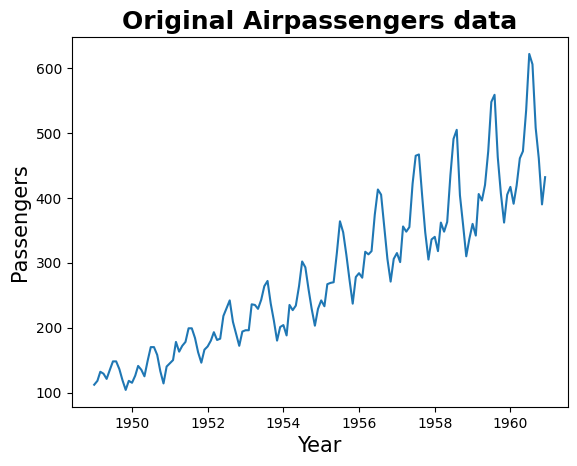

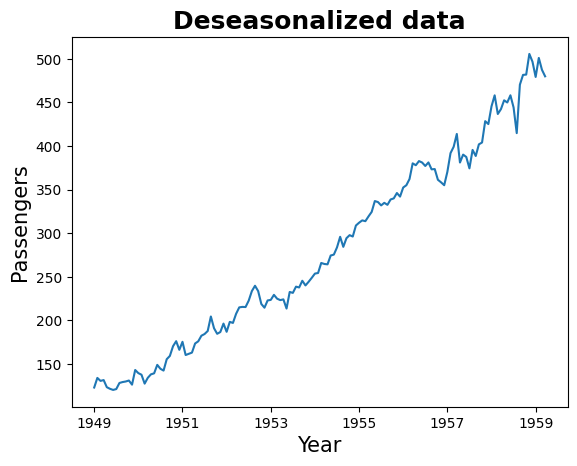

In [ ]:

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Melting the data by forming a 1D data to proceed with visualization
plt.plot(AirPassenger)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Original Airpassengers data', weight='bold', fontsize=18)
plt.show()

# Melting the data by forming a 1D data to proceed with visualization
plt.plot(pd.melt(AP_deseasonalized_mult.T).value)
plt.xticks(np.linspace(0, 140, 6), np.unique(pd.melt(AP_deseasonalized.T).variable)[::2])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Deseasonalized data', weight='bold', fontsize=18)
plt.show()

###Conclusion


We observe that there are more variations in the trend of the additive model as compared to the multiplicative model. By looking at these observations we may conclude that deseasonalized AirPassengers data might give us a clearer trend using the multiplicative model.


These deseasonalized values obtained using multiplicative model will be used for forecasting,

####Problem Statement:

Plot the deseasonalized values of AirPassengers data by assigning its frequency to the beginning of the business year. Using both the models (additive as well as multiplicative). The DateOffset to be used is 'BAS'.

###Smoothing Time Series

###

We have data from Jan 1949 to December 1960. We want to find out how many people will take the flight in January 1961, this type of forecasting is known as short term forecasting. Here, we want to forecast a value that immediately follows the given data.

###

However, we can observe that the seasonally adjusted values (assuming it to be a multiplicative model) have too many variations, due to which we may not be able to get a clear trend to forecast accurately. Hence, we need to remove these variations in the data to obtain a clear trend pattern for forecasting.

###

This process is known as smoothing. In the short term forecasting,

###

Commonly used smoothing techniques are:

- Simple moving average

- Exponential smoothing

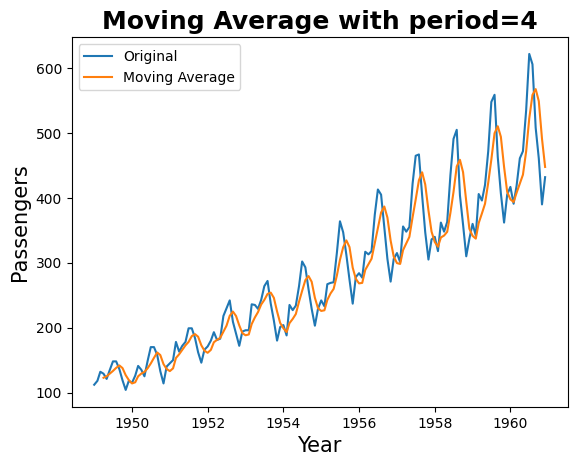

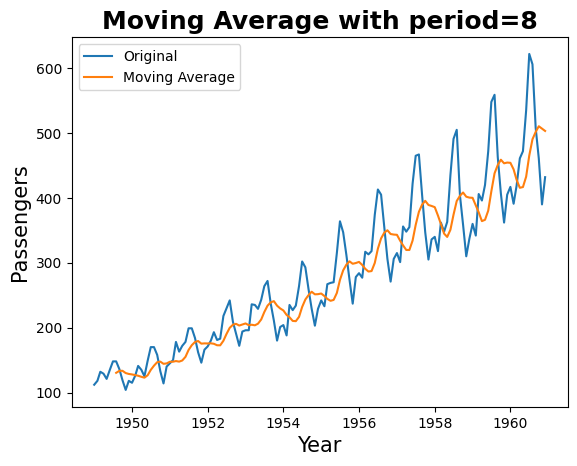

In [ ]:

# Importing libraries
import matplotlib.pyplot as plt

# 4 period moving average
plt.plot(AirPassenger, label='Original')
plt.plot(AirPassenger.rolling(4, center=False).mean(), label='Moving Average')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Moving Average with period=4', weight='bold', fontsize=18)
plt.show()

# 8 period moving average
plt.plot(AirPassenger, label='Original')
plt.plot(AirPassenger.rolling(8, center=False).mean(), label='Moving Average')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Moving Average with period=8', weight='bold', fontsize=18)
plt.show()

####

Among the above plots, the first one showcases that there is a sudden fall (abrupt shift) in the series. If there is an abrupt shift (sudden rise and fall) in the series then 'n' is set to a lower value, this is known as under smoothing. In under smoothing, there will be a lot of variations that will disguise the trend. For example, in the 4 period moving average figure, the trend is slightly disguised, due to the variations.

We can observe from another given figure, that there is a gradual increase in the series with fluctuations. If there are fluctuations (irregular rise and fall) in the series then 'n' is set to a large value, this is known as over smoothing. In over smoothing, some of the interesting patterns might be lost. For example, in the 8 period moving average figure, we may not be able to observe some interesting patterns, present in this dataset. Over smoothing might suppress these variations.

The value of 'n' should be set in a manner where both under smoothing and over smoothing can be avoided

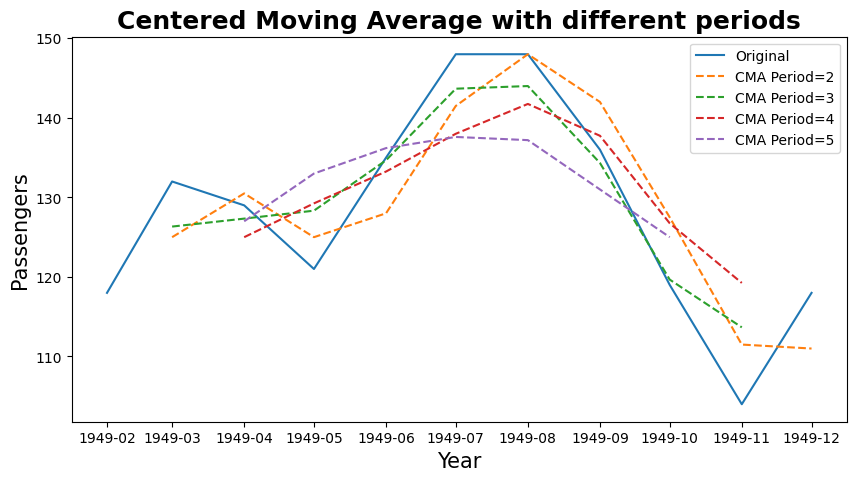

In [ ]:

# Importing libraries
import matplotlib.pyplot as plt

# Centered Moving Averages
plt.figure(figsize=(10, 5))
plt.plot(AirPassenger.iloc[1:12], label='Original')
plt.plot(AirPassenger.iloc[1:12].rolling(2, center=True).mean(), '--', label='CMA Period=2')
plt.plot(AirPassenger.iloc[1:12].rolling(3, center=True).mean(), '--', label='CMA Period=3')
plt.plot(AirPassenger.iloc[1:12].rolling(4, center=True).mean(), '--', label='CMA Period=4')
plt.plot(AirPassenger.iloc[1:12].rolling(5, center=True).mean(), '--', label='CMA Period=5')
plt.legend()

plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Centered Moving Average with different periods', weight='bold', fontsize=18)
plt.show()

###Exponential Smoothing

In [ ]:

# Importing libraries
import numpy as np

# Exponential smoothing is calculated and rounded off to 2 decimal values
np.round(AirPassenger.ewm(alpha=0.2,adjust=False).mean().head(),2)

Passengers
Travel date            
1949-01-01       112.00
1949-02-01       113.20
1949-03-01       116.96
1949-04-01       119.37
1949-05-01       119.69

In [ ]:

# Importing libraries
import pandas as pd

# Setting frequency
#AirPassenger = pd.read_csv('AirPassengers.csv', index_col='Travel date', date_parser=dateparse)
AirPassenger = AirPassenger.resample('M').mean()
AirPassenger.head()

/tmp/ipython-input-37-3970725642.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  AirPassenger = AirPassenger.resample('M').mean()


Passengers
Travel date            
1949-01-31        112.0
1949-02-28        118.0
1949-03-31        132.0
1949-04-30        129.0
1949-05-31        121.0

In [ ]:

# Importing libraries
import numpy as np

# Simple exponential smoothing
# Finding alpha value for the forecasted value and mean squared error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error


for i in range(1, 11):
    model = SimpleExpSmoothing(AirPassenger.iloc[:131]).fit(smoothing_level=i/10, optimized=False)
    forecasted_val = np.round(model.forecast(1)[0], 2)
    print('alpha = ', i/10, '| Forecasted value: ', forecasted_val,
          '| MSE: ', np.round(mean_squared_error(np.array(AirPassenger.iloc[131]), np.array([forecasted_val])), 2))

alpha =  0.1 | Forecasted value:  416.61 | MSE:  134.79
alpha =  0.2 | Forecasted value:  431.22 | MSE:  687.49
alpha =  0.3 | Forecasted value:  428.98 | MSE:  575.04
alpha =  0.4 | Forecasted value:  419.08 | MSE:  198.25
alpha =  0.5 | Forecasted value:  406.36 | MSE:  1.85
alpha =  0.6 | Forecasted value:  393.78 | MSE:  125.89
alpha =  0.7 | Forecasted value:  382.81 | MSE:  492.4
alpha =  0.8 | Forecasted value:  373.96 | MSE:  963.48
alpha =  0.9 | Forecasted value:  367.15 | MSE:  1432.62
alpha =  1.0 | Forecasted value:  362.0 | MSE:  1849.0


/tmp/ipython-input-38-3792951978.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_val = np.round(model.forecast(1)[0], 2)
/tmp/ipython-input-38-3792951978.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_val = np.round(model.forecast(1)[0], 2)
/tmp/ipython-input-38-3792951978.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_val = np.round(model.forecast(1)[0], 2)
/tmp/ipython-input-38-379

In [ ]:

# Importing libraries
import numpy as np
import scipy as sp

# Function to find optimum value of alpha
def optimum_alpha(x):
    model = SimpleExpSmoothing(AirPassenger.iloc[:131]).fit(smoothing_level=x, optimized = False)
    forecasted_val = np.round(model.forecast(1)[0], 2)
    mse = np.round(mean_squared_error(np.array(AirPassenger.iloc[131]), np.array([forecasted_val])), 2)
    print('alpha: ', np.round(x[0], 5), 'MSE: ', mse)
    return mse
optimum_alpha_result = sp.optimize.fmin(optimum_alpha, x0=1)
if optimum_alpha_result < 0:
    optimum_alpha_result = 0.001 # Least value, you can perform further optimization to improve it
optimum_alpha_result

alpha:  1.0 MSE:  1849.0
alpha:  1.05 MSE:  2035.81
alpha:  0.95 MSE:  1648.36
alpha:  0.9 MSE:  1432.62
alpha:  0.8 MSE:  963.48
alpha:  0.7 MSE:  492.4
alpha:  0.5 MSE:  1.85
alpha:  0.3 MSE:  575.04
alpha:  0.3 MSE:  575.04
alpha:  0.6 MSE:  125.89
alpha:  0.4 MSE:  198.25
alpha:  0.55 MSE:  25.7
alpha:  0.45 MSE:  61.62
alpha:  0.525 MSE:  3.5
alpha:  0.475 MSE:  21.25
alpha:  0.5125 MSE:  0.07
alpha:  0.525 MSE:  3.5
alpha:  0.50625 MSE:  0.3
alpha:  0.51875 MSE:  1.14
alpha:  0.50937 MSE:  0.02
alpha:  0.50625 MSE:  0.3
alpha:  0.51094 MSE:  0.0
alpha:  0.5125 MSE:  0.07
alpha:  0.51016 MSE:  0.0
alpha:  0.51172 MSE:  0.03
alpha:  0.51055 MSE:  0.0
alpha:  0.51055 MSE:  0.0
alpha:  0.51133 MSE:  0.01
alpha:  0.51074 MSE:  0.0
alpha:  0.51074 MSE:  0.0
alpha:  0.51113 MSE:  0.01
alpha:  0.51084 MSE:  0.0
alpha:  0.51084 MSE:  0.0
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 33


/tmp/ipython-input-39-3437550276.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_val = np.round(model.forecast(1)[0], 2)
/tmp/ipython-input-39-3437550276.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_val = np.round(model.forecast(1)[0], 2)
/tmp/ipython-input-39-3437550276.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_val = np.round(model.forecast(1)[0], 2)
/tmp/ipython-input-39-343755

array([0.5109375])

In [ ]:

# Importing libraries
import numpy as np

# Creating model using optimum alpha value
model = SimpleExpSmoothing(AirPassenger.iloc[:131]).fit(smoothing_level=optimum_alpha_result, optimized = False)
forecasted_val = np.round(model.forecast(1)[0], 2)
mse = np.round(mean_squared_error(np.array(AirPassenger.iloc[131]), np.array([forecasted_val])), 2)
print('Alpha: ', optimum_alpha_result[0],
      '\nActual value: ', AirPassenger.iloc[131][0],
      '\nForecasted value: ', np.round(forecasted_val).astype(int),
      '\nMean Squared Error: ', mse)

Alpha:  0.5109374999999995 
Actual value:  405.0 
Forecasted value:  405 
Mean Squared Error:  0.0


/tmp/ipython-input-40-3744855670.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_val = np.round(model.forecast(1)[0], 2)
/tmp/ipython-input-40-3744855670.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  '\nActual value: ', AirPassenger.iloc[131][0],


In [ ]:

# Importing libraries
import numpy as np

# Forecasting values for next year
forecasted_data=np.round(model.forecast(13)).astype(int)
forecasted_data

1959-12-31    405
1960-01-31    405
1960-02-29    405
1960-03-31    405
1960-04-30    405
1960-05-31    405
1960-06-30    405
1960-07-31    405
1960-08-31    405
1960-09-30    405
1960-10-31    405
1960-11-30    405
1960-12-31    405
Freq: ME, dtype: int64

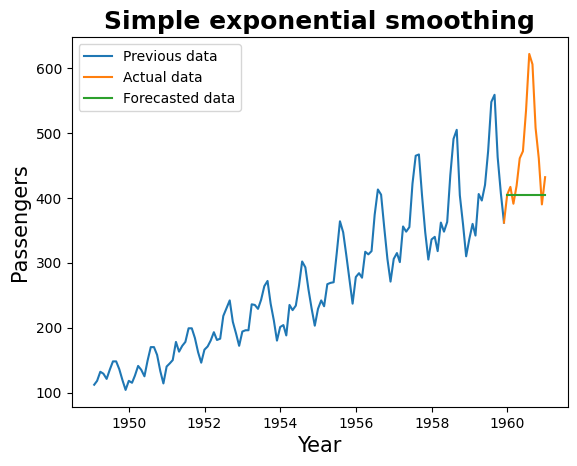

In [ ]:

# Importing libraries
import matplotlib.pyplot as plt

# Visualizing the forecasted value
plt.plot(AirPassenger.iloc[:131], label='Previous data')
plt.plot(AirPassenger.iloc[130:], label='Actual data')
plt.plot(forecasted_data, label='Forecasted data')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Simple exponential smoothing', weight='bold', fontsize=18)
plt.legend()
plt.show()

##Problem Statement:
For the following time series, you are given the moving average forecast. Compute the mean squared error.

In [ ]:
df_mse=pd.DataFrame({'TimePeriod':[1,2,3,4,5,6,7],
                     'TimeSeriesValue':[23,17,17,26,11,23,17],
                     'MovingAverage':[np.nan,np.nan,np.nan,19,20,18,20]},
                     )
df_mse#.reset_index(drop=True)

TimePeriod  TimeSeriesValue  MovingAverage
0           1               23            NaN
1           2               17            NaN
2           3               17            NaN
3           4               26           19.0
4           5               11           20.0
5           6               23           18.0
6           7               17           20.0

In [ ]:
#mse_value=((26-19)**2+(11-20)**2+(23-18)**2+(17-20)**2)/4
mse_value=(49+81+25+9)/4
mse_value

41.0

##MODELS FOR FORCASTING

Using short term forecasting, we were able to forecast only next month's data. Now, let us try to forecast more than one value.
Commonly used models for forecasting are as follows:

- Seasonal Indexing

- Autoregressive

- Moving Average

- Autoregressive Moving Average

- Autoregressive Integrated Moving Average

Let's look at these models in detail.

####Seasonal Indexing

Seasonal indexing model can be used when we have to predict values based on seasonal data. Seasonality is the pattern that occurs within a year. We can recall that AirPassengers data had a seasonality component associated with it

In [ ]:

# Excluding year 1960
AP = AP_reshaped.iloc[:11, :].copy()

# Finding average yearly
AP_yearly_mean = AP.mean(axis=1)
AP_yearly_mean

1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
dtype: float64

In [ ]:

# Dividing with mean values
AP_month_avg = AP.div(AP_yearly_mean.values, axis=0)
AP_month_avg

Jan       Feb       Mar       Apr       May       Jun       Jul  \
1949  0.884211  0.931579  1.042105  1.018421  0.955263  1.065789  1.168421   
1950  0.823389  0.902148  1.009547  0.966587  0.894988  1.066826  1.217184   
1951  0.852106  0.881489  1.046033  0.957884  1.010774  1.046033  1.169442   
1952  0.868020  0.913706  0.979695  0.918782  0.928934  1.106599  1.167513   
1953  0.871111  0.871111  1.048889  1.044444  1.017778  1.080000  1.173333   
1954  0.853854  0.786885  0.983607  0.950122  0.979421  1.104988  1.264039   
1955  0.852113  0.820423  0.940141  0.947183  0.950704  1.109155  1.281690   
1956  0.865194  0.843869  0.965727  0.953542  0.968774  1.139375  1.258187   
1957  0.855010  0.817010  0.966297  0.944583  0.963583  1.145442  1.262158   
1958  0.892388  0.834646  0.950131  0.913386  0.952756  1.141732  1.288714   
1959  0.840467  0.798444  0.947860  0.924514  0.980545  1.101946  1.279377   

           Aug       Sep       Oct       Nov       Dec  
1949  1.168421  1.073684  0.939474  0.821053  0.931579  
1950  1.217184  1.131265  0.952267  0.816229  1.002387  
1951  1.169442  1.081293  0.952008  0.857982  0.975514  
1952  1.228426  1.060914  0.969543  0.873096  0.984772  
1953  1.208889  1.053333  0.937778  0.800000  0.893333  
1954  1.226369  1.084060  0.958493  0.849669  0.958493  
1955  1.221831  1.098592  0.964789  0.834507  0.978873  
1956  1.233816  1.081493  0.932216  0.825590  0.932216  
1957  1.267587  1.096584  0.941868  0.827867  0.912011  
1958  1.325459  1.060367  0.942257  0.813648  0.884514  
1959  1.305058  1.080934  0.950195  0.845136  0.945525

In [ ]:

# Finding monthly average
AP_SI = AP_month_avg.mean(axis=0)
AP_SI

Jan    0.859806
Feb    0.854664
Mar    0.989094
Apr    0.958132
May    0.963956
Jun    1.100717
Jul    1.230005
Aug    1.233862
Sep    1.082047
Oct    0.949172
Nov    0.833162
Dec    0.945383
dtype: float64

In [ ]:

# Dividing by seasonal index, assuming multiplicative model
AP_deseasonalized = AP.div(AP_SI)
AP_deseasonalized

Jan         Feb         Mar         Apr         May         Jun  \
1949  130.261979  138.065893  133.455483  134.637038  125.524362  122.647342   
1950  133.751139  147.426293  142.554721  140.899226  129.673928  135.366325   
1951  168.642740  175.507491  179.962697  170.122769  178.431324  161.712791   
1952  198.882128  210.608989  195.128093  188.909332  189.842630  198.052744   
1953  227.958463  229.329788  238.602228  245.269022  237.562636  220.765215   
1954  237.262890  219.969389  237.591201  236.919439  242.749593  239.843690   
1955  281.458918  272.621636  269.944046  280.754753  280.095684  286.177130   
1956  330.307160  324.103834  320.495365  326.677464  329.890472  339.778561   
1957  366.361815  352.185032  359.925394  363.206893  368.273955  383.386505   
1958  395.438150  372.075881  365.991552  363.206893  376.573086  395.196990   
1959  418.699217  400.157080  410.476713  413.304395  435.704397  428.811446   

             Jul         Aug         Sep         Oct         Nov         Dec  
1949  120.324684  119.948587  125.687679  125.372477  124.825719  124.817077  
1950  138.210786  137.778782  146.019509  140.122180  136.828192  148.088058  
1951  161.787920  161.282221  170.048036  170.675136  175.236105  175.590126  
1952  186.991063  196.132148  193.152389  201.228093  206.442535  205.207737  
1953  214.633221  220.446051  219.029264  222.299097  216.044513  212.612140  
1954  245.527396  237.465783  239.361094  241.263001  243.650201  242.229752  
1955  295.933683  281.230808  288.342322  288.672761  284.458609  294.060572  
1956  335.770909  328.237686  328.081809  322.386369  325.267017  323.678184  
1957  378.047150  378.486418  373.366340  365.581928  366.075426  355.411339  
1958  399.185270  409.284028  373.366340  378.224530  372.076662  356.469111  
1959  445.526534  453.049053  427.892613  428.794941  434.489522  428.397596

In [ ]:

# Importing libraries
import numpy as np
import pandas as pd

# Reading data
AP_1D = pd.DataFrame(AP_deseasonalized.values.reshape(-1, 1), columns=['value'])

# Building Linear Regression model and predicting trend values
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.arange(1, 133).reshape(-1, 1), AP_1D.value.values.reshape(-1, 1) )
pred = pd.DataFrame(model.predict(np.arange(133, 145).reshape(-1, 1)), columns=['Trend values'], index=cols)
pred['Regression equations'] = pred['Trend values'].apply(lambda x: str(np.round(model.coef_[0][0], 2)) + ' * '+ str(np.round(x, 2)) + ' + ' + str(np.round(model.intercept_[0], 2)))
pred

Trend values   Regression equations
Jan    430.727157  2.53 * 430.73 + 93.84
Feb    433.260150  2.53 * 433.26 + 93.84
Mar    435.793142  2.53 * 435.79 + 93.84
Apr    438.326135  2.53 * 438.33 + 93.84
May    440.859127  2.53 * 440.86 + 93.84
Jun    443.392120  2.53 * 443.39 + 93.84
Jul    445.925113  2.53 * 445.93 + 93.84
Aug    448.458105  2.53 * 448.46 + 93.84
Sep    450.991098  2.53 * 450.99 + 93.84
Oct    453.524090  2.53 * 453.52 + 93.84
Nov    456.057083  2.53 * 456.06 + 93.84
Dec    458.590076  2.53 * 458.59 + 93.84

In [ ]:

# Importing libraries
import numpy as np
import pandas as pd

# Creating dataframe with seasonal index, trend values, monthly occupancy, and error in order to compare
out = pd.DataFrame(AP_SI, columns=['Seasonal Index'])
out.index.name = 1960

out['Trend values'] = pred['Trend values']
out['Monthly occupancy'] = np.round(AP_SI * pred['Trend values']).astype(int)
out['Error'] = AP_reshaped.loc[1960] - AP_SI * pred['Trend values']
out

Seasonal Index  Trend values  Monthly occupancy      Error
1960                                                            
Jan         0.859806    430.727157                370  46.658308
Feb         0.854664    433.260150                370  20.707986
Mar         0.989094    435.793142                431 -12.040324
Apr         0.958132    438.326135                420  41.025880
May         0.963956    440.859127                425  47.031065
Jun         1.100717    443.392120                488  46.950806
Jul         1.230005    445.925113                548  73.509746
Aug         1.233862    448.458105                553  52.664596
Sep         1.082047    450.991098                488  20.006349
Oct         0.949172    453.524090                430  30.527793
Nov         0.833162    456.057083                380  10.030735
Dec         0.945383    458.590076                434  -1.543470

In [ ]:
%%writefile list2arrayindice.py

import numpy as np
List_ex=[1,2,3,4,5,6,7,8]

lst_ex=np.array(List_ex).reshape(-2,2,2)[:,1:,:2]
print(lst_ex)

#Output
#array([[[3, 4]],
      #[[7, 8]]])
print('*'*20)
lst_ex=np.array(List_ex).reshape(-2,2,2)[:,1:,:1]
print(lst_ex)

#Output
#array([[[3]],
      #[[7]]])

Overwriting list2arrayindice.py


In [ ]:
%%writefile StatisticsforDataScience
import matplotlib.pyplot as plt

# Create a figure with two subplots, where the first is twice as wide as the second
fig, axes = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.8, 1)})
axes=axes.flatten()
# Add some content to the subplots
axes[0].plot([0, 1], [0, 1])
axes[0].set_title('Wider Subplot')
axes[1].plot([0, 1], [1, 0])
axes[1].set_title('Narrower Subplot')

plt.tight_layout()
plt.show()

Overwriting StatisticsforDataScience


In [ ]:

%%writefile webappFlaskDjangoStreamlit.py

"""Ensure your Python web application
(e.g., Flask, Django, Streamlit)
is running locally on a
specific port
(e.g.,
5000 for Flask,
8000 for Django,
8501 for Streamlit)"""

        from flask import Flask
        app = Flask(__name__)

        @app.route("/")
        def hello_world():
            return "Hello from Flask!"

        if __name__ == "__main__":
            app.run(port=5000)


 #   !pip install Flask flask-ngrok

Writing webappFlaskDjangoStreamlit.py


In [ ]:
%%writefile index.html

    <!DOCTYPE html>
    <html>
    <head>
        <title>My Ngrok Page</title>
    </head>
    <body>
        <h1>Hello from Colab via Ngrok!</h1>
        <p>This is a simple HTML page rendered using Flask.</p>
    </body>
    </html>

Writing index.html


In [ ]:
!pip install Flask flask-ngrok pyngrok

In [ ]:

        !mkdir -p /root/.ngrok2/
        !echo "authtoken: YOUR_AUTH_TOKEN" > /root/.ngrok2/ngrok.yml

In [ ]:
!ngrok authtoken 2yIOvcZEaVwrAIECmtUofV0csZg_7XwsyKaB9TRqCGTQDfYvf

/bin/bash: line 1: ngrok: command not found


In [ ]:
%%writefile webappflaskngrok.py

from flask import Flask, render_template
from pyngrok import ngrok, conf
from flask_ngrok import run_with_ngrok

app = Flask(__name__)

ngrok_auth_token = "2yIOvcZEaVwrAIECmtUofV0csZg_7XwsyKaB9TRqCGTQDfYvf"
conf.get_default().auth_token = ngrok_auth_token

#run_with_ngrok(app) # Starts ngrok when the app runs

@app.route("/")
def main():
    #def home():
    return render_template("index.html")

if __name__ == "__main__":
    #public_url = ngrok.connect(addr=5000)
    public_url = "ngrok http --url=colt-warm-trivially.ngrok-free.app 80"
    print(f"ngrok tunnel is active at: {public_url}")
    app.run(port=5000)
    #app.run()
    #run_with_ngrok(app)


"""
Usage of ngrok requires a verified account and authtoken.

Sign up for an account: https://dashboard.ngrok.com/signup
Install your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken

ERR_NGROK_4018

    !mkdir -p /root/.ngrok2/
    !echo "authtoken: YOUR_AUTH_TOKEN" > /root/.ngrok2/ngrok.yml

    !pip install flask_ngrok pyngrok
    !ngrok authtoken YOUR_NGROK_AUTHTOKEN_HERE

ngrok

static Domain
ngrok http --url=colt-warm-trivially.ngrok-free.app 80

ephemeral domain
ngrok http http://localhost:8080

ngrok tunnel is active at: ngrok http --url=colt-warm-trivially.ngrok-free.app 80
"""

Overwriting webappflaskngrok.py


In [ ]:
!python3 webappflaskngrok.py

ngrok tunnel is active at: ngrok http --url=colt-warm-trivially.ngrok-free.app 80
 * Serving Flask app 'webappflaskngrok'
 * Debug mode: off
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [ ]:
!pip install ngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.8 MB/s eta 0:00:00


In [ ]:

import flask, logging, ngrok

logging.basicConfig(level=logging.INFO)
listener = ngrok.werkzeug_develop()

app = flask.Flask(__name__)


@app.route("/")
def hello():
    return "Hello, World!"


app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


## Web-App Example

In [ ]:
%%writefile webappexample1port5000.py

from flask import Flask, request, render_template
#!pip install pyngrok Flask
from pyngrok import ngrok, conf
import os

app = Flask(__name__)

@app.route('/')
def home():
    return "Hello, world! 🙂This is running on Google Colab."

@app.route('/greet', methods=['POST'])
def greet():
    name = request.form['name']
    return f"Hello, {name}!"


 # Replace with your ngrok auth token
conf.get_default().auth_token = "2yIOvcZEaVwrAIECmtUofV0csZg_7XwsyKaB9TRqCGTQDfYvf"

import threading
def run_flask():
    app.run(port=5000)##5111 is ok, 5000

flask_thread = threading.Thread(target=run_flask)
flask_thread.start()

# Open a tunnel to your Flask app using ngrok
public_url = ngrok.connect(5000).public_url
print(f" * ngrok tunnel is running on : {public_url}")


if __name__ == '__main__':
   app.run(port=5000)

"""
Serving Flask app 'webappexample1'
 * Debug mode: off
WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * ngrok tunnel: https://efde410b1c8d.ngrok-free.app
 * Serving Flask app 'webappexample1'
 * Debug mode: off
Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.
Exception ignored in: <module 'threading' from '/usr/lib/python3.11/threading.py'>
Exception ignored in sys.unraisablehook: <built-in function unraisablehook>
KeyboardInterrupt

ERR_NGROK_8012
===============
This error occurs when the
ngrok agent successfully
receives traffic but fails to
establish a connection with your
local service (the "upstream" service).
While the tunnel is created successfully,
ngrok cannot forward the traffic
to your application.

5111---->
https://5ce8a46d92a9.ngrok-free.app

8080---->
https://2f380e69afce.ngrok-free.app/

5000---->
https://07d1cb930827.ngrok-free.app/
You are about to visit:
07d1cb930827.ngrok-free.app
Website IP: 34.10.0.224


[[[[http://127.0.0.1:5000/
https://07d1cb930827.ngrok-free.app
output displayed in the browser

OUTPUT---->
Hello, world! This is running on Google Colab.]]]]


Serving Flask app 'webappexample1'
 * Debug mode: off
WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * ngrok tunnel is running on : https://07d1cb930827.ngrok-free.app
 * Serving Flask app 'webappexample1'
 * Debug mode:
Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.
127.0.0.1 - - [11/Jul/2025 20:06:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Jul/2025 20:06:13] "GET /favicon.ico HTTP/1.1" 404


https://84e3bc004522.ngrok-free.app/
You are about to visit:
84e3bc004522.ngrok-free.app
Website IP: 34.10.0.224
"""

Overwriting webappexample1port5000.py


In [ ]:
#!python webappexample1.py
!python webappexample1port5000.py

 * Serving Flask app 'webappexample1port5000'
 * Debug mode: off
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * ngrok tunnel is running on : https://fc9ac96133b8.ngrok-free.app
 * Serving Flask app 'webappexample1port5000'
 * Debug mode: off
Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.
127.0.0.1 - - [17/Jul/2025 03:48:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2025 03:48:35] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
%%writefile webappexample2.py

   #!pip install pyngrok Flask
   from pyngrok import ngrok, conf
   import os

   # Replace with your ngrok auth token
   conf.get_default().auth_token = "YOUR_NGROK_AUTH_TOKEN"
   # Optionally, specify the ngrok path
   # conf.get_default().ngrok_path = "/path/to/ngrok"

Overwriting webappexample2.py


In [ ]:
%%writefile webappexample3.py

   # Start the Flask app in a separate thread (optional but recommended)
   import threading
   def run_flask():
       app.run(port=5000)

   flask_thread = threading.Thread(target=run_flask)
   flask_thread.start()

   # Open a tunnel to your Flask app using ngrok
   public_url = ngrok.connect(5000).public_url
   print(f" * ngrok tunnel: {public_url}")

Writing webappexample3.py


##Logging-File

In [ ]:

%%writefile loging.txt

import logging

# Configure logging
logging.basicConfig(
    filename='/content/log.txt ',          # Log file name
    filemode='w',                # 'w' to overwrite each time, 'a' to append
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO           # Set minimum log level
)

# Write some logs
logging.info('This is an info message.')
logging.warning('This is a warning message.')
logging.error('This is an error message.')

with open('log.txt', 'r') as f:
    print(f.read())

Writing loging.txt


In [ ]:
!python loging.txt


import logging

# Configure logging
logging.basicConfig(
    filename='/content/log.txt ',          # Log file name
    filemode='w',                # 'w' to overwrite each time, 'a' to append
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO           # Set minimum log level
)

# Write some logs
logging.info('This is an info message.')
logging.warning('This is a warning message.')
logging.error('This is an error message.')

with open('log.txt', 'r') as f:
    print(f.read())



In [ ]:
from google.colab import files
files.download('loging.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Email Submission</title>
</head>
<body>
  <h2>Subscribe with your Email</h2>
  <form action="/submit-email" method="POST">
    <label for="email">Email:</label>
    <input type="text" id="email" name="email" maxlength="50" required>
    <button type="submit">Submit</button>
  </form>
</body>
</html>

Writing htmlexampl1.html


In [ ]:
%%capture cap

!pip list

In [ ]:
with open('piplistGC.txt', 'w') as f:
        f.write(cap.stdout)

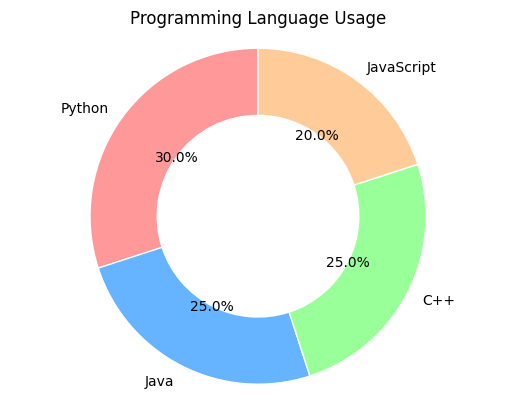

In [ ]:

import matplotlib.pyplot as plt

# Sample data
labels = ['Python', 'Java', 'C++', 'JavaScript']
sizes = [30, 25, 25, 20]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create a pie chart with a hole in the center (donut chart)
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, startangle=90,
       wedgeprops={'width': 0.4, 'edgecolor': 'white'}, autopct='%1.1f%%')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Optional: Add a title
plt.title('Programming Language Usage')

# Show the chart
plt.show()

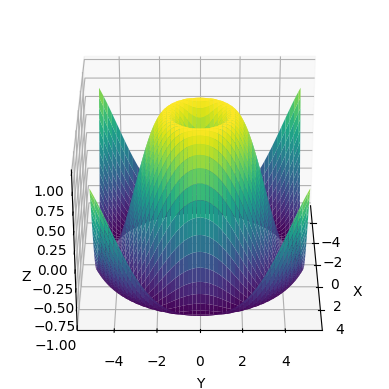

In [ ]:

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import time

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Animate rotation
for angle in range(0, 360):
    ax.view_init(elev=30, azim=angle)
    #plt.draw()
    plt.pause(0.01)
    plt.show()